In [2]:
# Cell 1: Environment Setup & Data Loading
# WESAD Individual Subject Clinical Report Generation
# Professional Clinical Assessment Reports for Stress Response Analysis

import tempfile
from datetime import datetime, date
import os
from reportlab.graphics.charts.barcharts import VerticalBarChart
from reportlab.graphics.charts.linecharts import HorizontalLineChart
from reportlab.graphics.shapes import Drawing
from reportlab.lib.enums import TA_CENTER, TA_LEFT, TA_JUSTIFY
from reportlab.lib import colors
from reportlab.lib.units import inch, mm
from reportlab.lib.styles import getSampleStyleSheet, ParagraphStyle
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Image, Table, TableStyle, PageBreak
from reportlab.lib.pagesizes import letter, A4
import json
from sklearn.preprocessing import StandardScaler
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Core Data Processing Libraries

# PDF Report Generation Libraries

# System and File Management

print("📋 WESAD Individual Subject Clinical Report Generation System")
print("=" * 70)
print("🏥 Professional Stress Response Assessment Reports")
print(f"📅 Session Date: {datetime.now().strftime('%B %d, %Y at %I:%M %p')}")
print("=" * 70)

# Configure Professional Visualization Settings
plt.style.use('default')
plt.rcParams.update({
    'figure.figsize': (12, 8),
    'font.size': 11,
    'font.family': 'Arial',
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'figure.titlesize': 16,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.grid': True,
    'grid.alpha': 0.3,
    'savefig.dpi': 300,
    'savefig.bbox': 'tight',
    'savefig.facecolor': 'white'
})

# Professional Color Palette for Clinical Reports
CLINICAL_COLORS = {
    'primary': '#2E86AB',      # Professional blue
    'secondary': '#A23B72',    # Clinical accent
    'success': '#F18F01',      # Warning/attention
    'danger': '#C73E1D',       # Alert/danger
    'info': '#4ECDC4',         # Information
    'light': '#F8F9FA',        # Light background
    'dark': '#212529',         # Dark text
    'baseline': '#95E1D3',     # Baseline condition
    'stress': '#F38BA8',       # Stress condition
    'amusement': '#A8DADC',    # Amusement condition
    'meditation': '#B8E6B8'    # Meditation condition
}

# Load Processed WESAD Dataset
print("📊 Loading WESAD processed dataset...")
data_path = "../results/wesad/features/wesad_features_with_metadata.csv"

try:
    df = pd.read_csv(data_path)
    print(f"✅ Successfully loaded WESAD dataset")
    print(f"   📈 Total Records: {len(df):,}")
    print(f"   👥 Unique Subjects: {df['subject_id'].nunique()}")
    print(f"   🔬 Total Features: {len(df.columns)}")
    print(f"   📋 Conditions: {df['condition_name'].unique()}")

    # Display basic dataset info
    print(f"\n📋 Dataset Structure:")
    print(f"   • Subjects: {sorted(df['subject_id'].unique())}")
    print(
        f"   • Conditions per Subject: {df.groupby('subject_id')['condition_name'].nunique().iloc[0]}")
    print(
        f"   • Windows per Subject: {df.groupby('subject_id').size().iloc[0]}")

except FileNotFoundError:
    print("❌ Error: WESAD dataset not found!")
    print(f"   Expected location: {data_path}")
    print("   Please ensure the EDA phase is completed first.")
    raise
except Exception as e:
    print(f"❌ Error loading dataset: {str(e)}")
    raise

# Create Output Directory Structure
print("\n📁 Setting up report output directories...")
report_dirs = {
    'base': '../results/wesad/reports',
    'templates': '../results/wesad/reports/templates',
    'individual': '../results/wesad/reports/individual_subjects',
    'summary': '../results/wesad/reports/population_summary',
    'temp_images': '../results/wesad/reports/temp_images'
}

for dir_name, dir_path in report_dirs.items():
    os.makedirs(dir_path, exist_ok=True)
    print(f"   ✅ {dir_name.capitalize()}: {dir_path}")

print(f"\n🎯 Reports will be generated in: {report_dirs['individual']}")

# Load Processing Summary for Context
try:
    with open('../results/wesad/features/processing_summary.json', 'r') as f:
        processing_summary = json.load(f)
    print(f"\n📊 Processing Summary Loaded:")
    print(
        f"   • Total Subjects Processed: {processing_summary.get('total_subjects', 'N/A')}")
    print(
        f"   • Processing Date: {processing_summary.get('processing_date', 'N/A')}")
    print(
        f"   • Quality Score: {processing_summary.get('data_quality_score', 'N/A')}")
except:
    print("\n⚠️  Processing summary not found, continuing without context...")
    processing_summary = {}

# Subject List for Report Generation
subject_list = sorted(df['subject_id'].unique())
print(f"\n👥 Subjects for Report Generation: {len(subject_list)}")
print(f"   📋 Subject IDs: {subject_list}")

# Clinical Report Configuration
REPORT_CONFIG = {
    'page_size': A4,
    'margins': {
        'top': 0.75 * inch,
        'bottom': 0.75 * inch,
        'left': 0.75 * inch,
        'right': 0.75 * inch
    },
    'max_pages': 4,
    'dpi': 300,
    'institution': 'IIIT Allahabad - Big Data Analytics Lab',
    'report_type': 'Stress Response Clinical Assessment',
    'version': '1.0',
    'team_info': {
        'course': 'Big Data Analytics Course',
        'students': [
            'Aditya Singh Mertia (IIT2022125) - [iit2022125@iiita.ac.in]',
            'Rishabh Kumar (IIT2022131) - [iit2022131@iiita.ac.in]',
            'Karan Singh (IIT2022132) - [iit2022132@iiita.ac.in]',
            'Tejas Sharma (IIT2022161) - [iit2022161@iiita.ac.in]'
        ]
    }
}

print(f"\n⚙️  Clinical Report Configuration:")
print(
    f"   📄 Page Format: A4 ({REPORT_CONFIG['page_size'][0]:.0f} x {REPORT_CONFIG['page_size'][1]:.0f} pts)")
print(f"   📏 Margins: {REPORT_CONFIG['margins']['top']/inch:.2f}\" all sides")
print(f"   📊 Resolution: {REPORT_CONFIG['dpi']} DPI")
print(f"   📑 Max Pages: {REPORT_CONFIG['max_pages']} pages")

print("\n" + "="*70)
print("✅ CELL 1 COMPLETE: Environment Setup & Data Loading")
print("🔄 Ready for Cell 2: Population Norms & Clinical Thresholds")
print("="*70)

📋 WESAD Individual Subject Clinical Report Generation System
🏥 Professional Stress Response Assessment Reports
📅 Session Date: August 21, 2025 at 11:43 PM
📊 Loading WESAD processed dataset...
✅ Successfully loaded WESAD dataset
   📈 Total Records: 1,441
   👥 Unique Subjects: 15
   🔬 Total Features: 103
   📋 Conditions: ['Baseline' 'Stress' 'Meditation' 'Amusement']

📋 Dataset Structure:
   • Subjects: ['S10', 'S11', 'S13', 'S14', 'S15', 'S16', 'S17', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9']
   • Conditions per Subject: 4
   • Windows per Subject: 99

📁 Setting up report output directories...
   ✅ Base: ../results/wesad/reports
   ✅ Templates: ../results/wesad/reports/templates
   ✅ Individual: ../results/wesad/reports/individual_subjects
   ✅ Summary: ../results/wesad/reports/population_summary
   ✅ Temp_images: ../results/wesad/reports/temp_images

🎯 Reports will be generated in: ../results/wesad/reports/individual_subjects

📊 Processing Summary Loaded:
   • Total Subjects Proc

In [9]:
# Cell 2: Population Norms & Clinical Thresholds
# Calculate reference distributions and clinical thresholds for individual assessment

print("📊 CELL 2: Population Norms & Clinical Thresholds Calculation")
print("=" * 70)

# =====================================
# POPULATION STATISTICS CALCULATION
# =====================================

print("🔍 Calculating population statistics for clinical reference...")

# Key Clinical Metrics for Stress Response Assessment
CLINICAL_METRICS = {
    # Primary Physiological Markers
    'chest_hr_mean': 'Heart Rate (Chest) - Mean',
    'chest_hr_std': 'Heart Rate (Chest) - Variability',
    'wrist_hr_mean': 'Heart Rate (Wrist) - Mean',
    'chest_eda_mean': 'Electrodermal Activity - Mean',
    'chest_eda_std': 'Electrodermal Activity - Variability',
    'chest_temp_mean': 'Body Temperature - Mean',
    'wrist_temp_mean': 'Skin Temperature - Mean',

    # Activity and Movement Markers
    'wrist_acc_magnitude_mean': 'Physical Activity Level',
    'wrist_acc_magnitude_std': 'Movement Variability',

    # Respiratory Markers
    'chest_resp_mean': 'Respiratory Rate',
    'chest_resp_std': 'Respiratory Variability'
}

# Calculate population norms by condition
conditions = ['Baseline', 'Stress', 'Amusement', 'Meditation']
population_norms = {}

print(f"📋 Analyzing {len(conditions)} experimental conditions...")

for condition in conditions:
    condition_data = df[df['condition_name'] == condition]
    condition_stats = {}

    print(f"\n🔬 {condition} Condition Analysis:")
    print(f"   • Sample Size: {len(condition_data)} windows")
    print(f"   • Subjects: {condition_data['subject_id'].nunique()}")

    # Calculate statistics for each clinical metric
    for metric_col, metric_name in CLINICAL_METRICS.items():
        if metric_col in condition_data.columns:
            values = condition_data[metric_col].dropna()

            if len(values) > 0:
                condition_stats[metric_col] = {
                    'mean': float(values.mean()),
                    'std': float(values.std()),
                    'median': float(values.median()),
                    'q25': float(values.quantile(0.25)),
                    'q75': float(values.quantile(0.75)),
                    'q90': float(values.quantile(0.90)),
                    'q95': float(values.quantile(0.95)),
                    'min': float(values.min()),
                    'max': float(values.max()),
                    'count': int(len(values)),
                    'description': metric_name
                }

    population_norms[condition] = condition_stats
    print(f"   ✅ Calculated norms for {len(condition_stats)} metrics")

# =====================================
# STRESS REACTIVITY ANALYSIS
# =====================================

print(f"\n💓 Calculating Stress Reactivity Patterns...")

# Calculate stress reactivity (stress response - baseline)
baseline_data = df[df['condition_name'] == 'Baseline'].groupby(
    'subject_id').mean(numeric_only=True)
stress_data = df[df['condition_name'] == 'Stress'].groupby(
    'subject_id').mean(numeric_only=True)

stress_reactivity = {}
reactivity_metrics = ['chest_hr_mean', 'chest_eda_mean',
                      'wrist_hr_mean', 'chest_temp_mean']

for metric in reactivity_metrics:
    if metric in baseline_data.columns and metric in stress_data.columns:
        # Calculate individual stress reactivity
        baseline_vals = baseline_data[metric].dropna()
        stress_vals = stress_data[metric].dropna()

        # Match subjects for paired comparison
        common_subjects = baseline_vals.index.intersection(stress_vals.index)

        if len(common_subjects) > 0:
            reactivity_values = stress_vals[common_subjects] - \
                baseline_vals[common_subjects]

            stress_reactivity[metric] = {
                'mean': float(reactivity_values.mean()),
                'std': float(reactivity_values.std()),
                'median': float(reactivity_values.median()),
                'q25': float(reactivity_values.quantile(0.25)),
                'q75': float(reactivity_values.quantile(0.75)),
                'q90': float(reactivity_values.quantile(0.90)),
                'q95': float(reactivity_values.quantile(0.95)),
                'count': int(len(reactivity_values)),
                'description': f'Stress Reactivity - {CLINICAL_METRICS.get(metric, metric)}'
            }

            print(f"   • {CLINICAL_METRICS.get(metric, metric)}:")
            print(
                f"     Δ Mean: {reactivity_values.mean():.2f} ± {reactivity_values.std():.2f}")

print(
    f"   ✅ Calculated reactivity patterns for {len(stress_reactivity)} metrics")

# =====================================
# CLINICAL RISK STRATIFICATION
# =====================================

print(f"\n🎯 Defining Clinical Risk Stratification Thresholds...")

# Define risk categories based on population percentiles
RISK_THRESHOLDS = {
    'stress_reactivity': {
        'normal': {'min': 0, 'max': 75},  # 0-75th percentile
        'elevated': {'min': 75, 'max': 90},  # 75-90th percentile
        'high': {'min': 90, 'max': 100}  # 90-100th percentile
    },
    'baseline_levels': {
        'normal': {'min': 25, 'max': 75},  # 25-75th percentile (normal range)
        'low': {'min': 0, 'max': 25},      # 0-25th percentile
        'high': {'min': 75, 'max': 100}    # 75-100th percentile
    }
}

# Calculate specific clinical thresholds
clinical_thresholds = {}

# Heart Rate Stress Reactivity Thresholds
hr_reactivity = stress_reactivity.get('chest_hr_mean', {})
if hr_reactivity:
    clinical_thresholds['hr_stress_reactivity'] = {
        'normal_max': hr_reactivity['q75'],
        'elevated_max': hr_reactivity['q90'],
        'high_min': hr_reactivity['q90'],
        'description': 'Heart Rate Stress Response'
    }

# EDA Stress Reactivity Thresholds
eda_reactivity = stress_reactivity.get('chest_eda_mean', {})
if eda_reactivity:
    clinical_thresholds['eda_stress_reactivity'] = {
        'normal_max': eda_reactivity['q75'],
        'elevated_max': eda_reactivity['q90'],
        'high_min': eda_reactivity['q90'],
        'description': 'Electrodermal Activity Stress Response'
    }

# Baseline Heart Rate Norms
baseline_hr = population_norms['Baseline'].get('chest_hr_mean', {})
if baseline_hr:
    clinical_thresholds['baseline_hr'] = {
        'low_max': baseline_hr['q25'],
        'normal_min': baseline_hr['q25'],
        'normal_max': baseline_hr['q75'],
        'high_min': baseline_hr['q75'],
        'description': 'Resting Heart Rate'
    }

print(
    f"   ✅ Defined thresholds for {len(clinical_thresholds)} clinical markers")

# Display key clinical thresholds
for threshold_name, threshold_data in clinical_thresholds.items():
    print(f"   • {threshold_data['description']}:")
    if 'normal_max' in threshold_data and 'elevated_max' in threshold_data and 'high_min' in threshold_data:
        print(f"     Normal: ≤{threshold_data['normal_max']:.1f}")
        print(
            f"     Elevated: {threshold_data['normal_max']:.1f}-{threshold_data['elevated_max']:.1f}")
        print(f"     High Risk: ≥{threshold_data['high_min']:.1f}")
    elif 'normal_min' in threshold_data and 'normal_max' in threshold_data:
        print(
            f"     Normal Range: {threshold_data['normal_min']:.1f}-{threshold_data['normal_max']:.1f}")
        if 'low_max' in threshold_data:
            print(f"     Low: ≤{threshold_data['low_max']:.1f}")
        if 'high_min' in threshold_data:
            print(f"     High: ≥{threshold_data['high_min']:.1f}")
    else:
        print(f"     Threshold data available: {list(threshold_data.keys())}")

# =====================================
# POPULATION CONTEXT DATA
# =====================================

print(f"\n📊 Creating Population Context for Individual Reports...")

# Summary statistics for report context
population_context = {
    'total_subjects': int(df['subject_id'].nunique()),
    'total_sessions': len(df),
    'age_range': {
        'min': int(df['age'].min()),
        'max': int(df['age'].max()),
        'mean': float(df['age'].mean())
    },
    'gender_distribution': df['gender'].value_counts().to_dict(),
    'bmi_stats': {
        'mean': float(df['bmi'].mean()),
        'std': float(df['bmi'].std())
    },
    'study_protocol': {
        'conditions': conditions,
        'windows_per_subject': int(len(df) / df['subject_id'].nunique())
    }
}

print(f"   • Population Size: {population_context['total_subjects']} subjects")
print(
    f"   • Age Range: {population_context['age_range']['min']}-{population_context['age_range']['max']} years")
print(f"   • Gender: {population_context['gender_distribution']}")
print(
    f"   • Average BMI: {population_context['bmi_stats']['mean']:.1f} ± {population_context['bmi_stats']['std']:.1f}")

# =====================================
# SAVE REFERENCE DATA
# =====================================

print(f"\n💾 Saving population reference data...")

# Combine all reference data
reference_data = {
    'population_norms': population_norms,
    'stress_reactivity': stress_reactivity,
    'clinical_thresholds': clinical_thresholds,
    'population_context': population_context,
    'risk_categories': RISK_THRESHOLDS,
    'clinical_metrics': CLINICAL_METRICS,
    'calculation_date': datetime.now().isoformat(),
    'dataset_version': 'WESAD_processed_v1.0'
}

# Save to file for use in individual reports
reference_file = '../results/wesad/reports/population_reference_data.json'
with open(reference_file, 'w') as f:
    json.dump(reference_data, f, indent=2)

print(f"   ✅ Saved reference data: {reference_file}")

# =====================================
# CLINICAL INTERPRETATION FUNCTIONS
# =====================================

print(f"\n🏥 Defining Clinical Interpretation Functions...")


def classify_stress_reactivity(reactivity_value, metric_name):
    """Classify stress reactivity level based on population norms"""
    thresholds = clinical_thresholds.get(
        f'{metric_name}_stress_reactivity', {})

    if not thresholds:
        return "Unknown", "Insufficient population data"

    if reactivity_value <= thresholds.get('normal_max', float('inf')):
        return "Normal", "Typical stress response within normal population range"
    elif reactivity_value <= thresholds.get('elevated_max', float('inf')):
        return "Elevated", "Above-average stress response, may warrant monitoring"
    else:
        return "High Risk", "Significantly elevated stress response, clinical attention recommended"


def classify_baseline_level(baseline_value, metric_name):
    """Classify baseline physiological levels"""
    thresholds = clinical_thresholds.get(f'baseline_{metric_name}', {})

    if not thresholds:
        return "Normal Range", "Population reference unavailable"

    if baseline_value < thresholds.get('normal_min', 0):
        return "Below Normal", "Lower than typical population range"
    elif baseline_value <= thresholds.get('normal_max', float('inf')):
        return "Normal Range", "Within typical population range"
    else:
        return "Above Normal", "Higher than typical population range"


def get_population_percentile(value, condition, metric):
    """Calculate percentile rank within population for given condition and metric"""
    try:
        if condition in population_norms and metric in population_norms[condition]:
            # Simple percentile estimation based on standard distribution
            mean = population_norms[condition][metric]['mean']
            std = population_norms[condition][metric]['std']

            if std > 0:
                z_score = (value - mean) / std
                # Convert z-score to approximate percentile
                percentile = norm.cdf(z_score) * 100
                return min(max(percentile, 0), 100)  # Bound between 0-100

        return 50  # Default to median if calculation fails
    except:
        return 50  # Fallback to median percentile


print(f"   ✅ Clinical interpretation functions defined")

# =====================================
# VALIDATION SUMMARY
# =====================================

print(f"\n📋 Population Reference Validation Summary:")
print(f"   • Conditions Analyzed: {len(population_norms)}")
print(f"   • Clinical Metrics: {len(CLINICAL_METRICS)}")
print(f"   • Stress Reactivity Patterns: {len(stress_reactivity)}")
print(f"   • Clinical Thresholds: {len(clinical_thresholds)}")
print(f"   • Reference Data File: population_reference_data.json")

print("\n" + "="*70)
print("✅ CELL 2 COMPLETE: Population Norms & Clinical Thresholds")
print("🔄 Ready for Cell 3: Subject-Specific Visualization Functions")
print("="*70)

📊 CELL 2: Population Norms & Clinical Thresholds Calculation
🔍 Calculating population statistics for clinical reference...
📋 Analyzing 4 experimental conditions...

🔬 Baseline Condition Analysis:
   • Sample Size: 575 windows
   • Subjects: 15
   ✅ Calculated norms for 6 metrics

🔬 Stress Condition Analysis:
   • Sample Size: 321 windows
   • Subjects: 15
   ✅ Calculated norms for 6 metrics

🔬 Amusement Condition Analysis:
   • Sample Size: 173 windows
   • Subjects: 15
   ✅ Calculated norms for 6 metrics

🔬 Meditation Condition Analysis:
   • Sample Size: 372 windows
   • Subjects: 15
   ✅ Calculated norms for 6 metrics

💓 Calculating Stress Reactivity Patterns...
   • Heart Rate (Chest) - Mean:
     Δ Mean: 25.22 ± 19.72
   • Electrodermal Activity - Mean:
     Δ Mean: 2.06 ± 1.91
   • Body Temperature - Mean:
     Δ Mean: 0.70 ± 0.58
   ✅ Calculated reactivity patterns for 3 metrics

🎯 Defining Clinical Risk Stratification Thresholds...
   ✅ Defined thresholds for 3 clinical markers

In [10]:
# Cell 3: Subject-Specific Visualization Functions
# Professional clinical visualizations for individual subject reports

# Import required libraries for visualization functions
import sys
from scipy.stats import norm

print("📈 CELL 3: Subject-Specific Visualization Functions")
print("=" * 70)

# =====================================
# VISUALIZATION UTILITY FUNCTIONS
# =====================================


def setup_clinical_plot_style():
    """Set up professional clinical plot styling"""
    plt.style.use('default')
    plt.rcParams.update({
        'figure.facecolor': 'white',
        'axes.facecolor': 'white',
        'axes.spines.top': False,
        'axes.spines.right': False,
        'axes.spines.left': True,
        'axes.spines.bottom': True,
        'axes.linewidth': 1.2,
        'grid.alpha': 0.3,
        'grid.linewidth': 0.8,
        'font.family': 'Arial',
        'font.size': 10,
        'axes.titlesize': 12,
        'axes.labelsize': 11,
        'xtick.labelsize': 9,
        'ytick.labelsize': 9,
        'legend.fontsize': 9,
        'figure.dpi': 300,
        'savefig.dpi': 300,
        'savefig.bbox': 'tight',
        'savefig.facecolor': 'white'
    })


def get_condition_color(condition):
    """Get standardized color for each experimental condition"""
    condition_colors = {
        'Baseline': CLINICAL_COLORS['baseline'],
        'Stress': CLINICAL_COLORS['stress'],
        'Amusement': CLINICAL_COLORS['amusement'],
        'Meditation': CLINICAL_COLORS['meditation']
    }
    return condition_colors.get(condition, CLINICAL_COLORS['primary'])


def add_clinical_reference_lines(ax, metric_name, condition='Baseline'):
    """Add clinical reference lines to plots"""
    if condition in population_norms and metric_name in population_norms[condition]:
        stats = population_norms[condition][metric_name]

        # Add mean line
        ax.axhline(stats['mean'], color='red', linestyle='--', alpha=0.6,
                   linewidth=1, label=f'Population Mean ({stats["mean"]:.1f})')

        # Add normal range (25th-75th percentile)
        ax.axhspan(stats['q25'], stats['q75'], color='lightgray', alpha=0.2,
                   label='Normal Range (IQR)')


print("📊 Setting up clinical visualization standards...")
setup_clinical_plot_style()

# =====================================
# INDIVIDUAL PHYSIOLOGICAL PROFILE
# =====================================


def create_physiological_profile(subject_data, subject_id, output_dir):
    """
    Create comprehensive physiological profile showing all conditions
    """
    print(f"   📈 Creating physiological profile for {subject_id}...")

    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle(f'Subject {subject_id} - Physiological Response Profile',
                 fontsize=16, fontweight='bold', y=0.95)

    # Key metrics to display
    metrics = [
        ('chest_hr_mean', 'Heart Rate (bpm)', 'Heart Rate Response'),
        ('chest_eda_mean', 'EDA (μS)', 'Electrodermal Activity'),
        ('chest_temp_mean', 'Temperature (°C)', 'Body Temperature'),
        ('wrist_acc_magnitude_mean', 'Activity Level', 'Physical Activity')
    ]

    conditions = ['Baseline', 'Stress', 'Amusement', 'Meditation']

    for idx, (metric, ylabel, title) in enumerate(metrics):
        ax = axes[idx // 2, idx % 2]

        if metric in subject_data.columns:
            # Calculate mean for each condition
            condition_means = []
            condition_stds = []
            condition_labels = []

            for condition in conditions:
                condition_subset = subject_data[subject_data['condition_name']
                                                == condition][metric]
                if len(condition_subset) > 0:
                    condition_means.append(condition_subset.mean())
                    condition_stds.append(condition_subset.std() if len(
                        condition_subset) > 1 else 0)
                    condition_labels.append(condition)

            # Create bar plot with error bars
            colors = [get_condition_color(cond) for cond in condition_labels]
            bars = ax.bar(range(len(condition_labels)), condition_means,
                          yerr=condition_stds, capsize=5, color=colors, alpha=0.8,
                          edgecolor='black', linewidth=1)

            # Add clinical reference line (population mean for baseline)
            if condition_labels and 'Baseline' in population_norms and metric in population_norms['Baseline']:
                pop_mean = population_norms['Baseline'][metric]['mean']
                ax.axhline(pop_mean, color='red', linestyle='--', alpha=0.7,
                           linewidth=2, label=f'Population Mean')

                # Add normal range
                q25 = population_norms['Baseline'][metric]['q25']
                q75 = population_norms['Baseline'][metric]['q75']
                ax.axhspan(q25, q75, color='lightgray',
                           alpha=0.2, label='Normal Range')

            # Formatting
            ax.set_xlabel('Experimental Condition', fontweight='bold')
            ax.set_ylabel(ylabel, fontweight='bold')
            ax.set_title(title, fontweight='bold', pad=15)
            ax.set_xticks(range(len(condition_labels)))
            ax.set_xticklabels(condition_labels, rotation=45)
            ax.grid(True, alpha=0.3)
            ax.legend(fontsize=8)

            # Add value labels on bars
            for i, (bar, mean_val, std_val) in enumerate(zip(bars, condition_means, condition_stds)):
                height = bar.get_height()
                ax.text(bar.get_x() + bar.get_width()/2., height + std_val + 0.01*max(condition_means),
                        f'{mean_val:.1f}', ha='center', va='bottom', fontweight='bold', fontsize=8)
        else:
            ax.text(0.5, 0.5, f'Data not available\nfor {title}',
                    ha='center', va='center', transform=ax.transAxes, fontsize=12)
            ax.set_title(title, fontweight='bold')

    plt.tight_layout()

    # Save plot
    output_path = f"{output_dir}/{subject_id}_physiological_profile.png"
    plt.savefig(output_path, dpi=300, bbox_inches='tight', facecolor='white')
    plt.close()

    return output_path

# =====================================
# STRESS RESPONSE ANALYSIS
# =====================================


def create_stress_response_analysis(subject_data, subject_id, output_dir):
    """
    Create detailed stress response analysis comparing baseline vs stress
    """
    print(f"   📊 Creating stress response analysis for {subject_id}...")

    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle(f'Subject {subject_id} - Stress Response Analysis',
                 fontsize=16, fontweight='bold', y=0.95)

    # Key stress response metrics
    stress_metrics = [
        ('chest_hr_mean', 'Heart Rate (bpm)', 'Cardiac Response'),
        ('chest_eda_mean', 'EDA (μS)', 'Sympathetic Arousal'),
        ('chest_temp_mean', 'Temperature (°C)', 'Thermal Response'),
        ('wrist_acc_magnitude_mean', 'Activity', 'Movement Response')
    ]

    baseline_data = subject_data[subject_data['condition_name'] == 'Baseline']
    stress_data = subject_data[subject_data['condition_name'] == 'Stress']

    for idx, (metric, ylabel, title) in enumerate(stress_metrics):
        ax = axes[idx // 2, idx % 2]

        if metric in subject_data.columns:
            # Calculate baseline and stress values
            baseline_vals = baseline_data[metric].dropna()
            stress_vals = stress_data[metric].dropna()

            if len(baseline_vals) > 0 and len(stress_vals) > 0:
                # Create comparison plot
                data_to_plot = [baseline_vals, stress_vals]
                labels = ['Baseline', 'Stress']
                colors = [CLINICAL_COLORS['baseline'],
                          CLINICAL_COLORS['stress']]

                # Box plot with individual points
                bp = ax.boxplot(data_to_plot, patch_artist=True, labels=labels,
                                boxprops=dict(
                                    facecolor='lightblue', alpha=0.7),
                                medianprops=dict(color='red', linewidth=2))

                # Color the boxes
                for patch, color in zip(bp['boxes'], colors):
                    patch.set_facecolor(color)
                    patch.set_alpha(0.7)

                # Add scatter points
                for i, (data, color) in enumerate(zip(data_to_plot, colors)):
                    x = np.random.normal(i + 1, 0.04, len(data))
                    ax.scatter(x, data, alpha=0.6, color=color, s=20)

                # Calculate and display reactivity
                baseline_mean = baseline_vals.mean()
                stress_mean = stress_vals.mean()
                reactivity = stress_mean - baseline_mean
                percent_change = (reactivity / baseline_mean) * \
                    100 if baseline_mean != 0 else 0

                # Add population reference lines
                if 'Baseline' in population_norms and metric in population_norms['Baseline']:
                    pop_baseline = population_norms['Baseline'][metric]['mean']
                    ax.axhline(pop_baseline, color='blue', linestyle=':', alpha=0.5,
                               label=f'Pop. Baseline ({pop_baseline:.1f})')

                if 'Stress' in population_norms and metric in population_norms['Stress']:
                    pop_stress = population_norms['Stress'][metric]['mean']
                    ax.axhline(pop_stress, color='red', linestyle=':', alpha=0.5,
                               label=f'Pop. Stress ({pop_stress:.1f})')

                # Add reactivity annotation
                ax.text(0.02, 0.98, f'Reactivity: {reactivity:+.1f}\n({percent_change:+.1f}%)',
                        transform=ax.transAxes, va='top', ha='left',
                        bbox=dict(boxstyle='round,pad=0.3',
                                  facecolor='lightyellow', alpha=0.8),
                        fontsize=9, fontweight='bold')

            ax.set_ylabel(ylabel, fontweight='bold')
            ax.set_title(title, fontweight='bold', pad=15)
            ax.grid(True, alpha=0.3)
            ax.legend(fontsize=8)
        else:
            ax.text(0.5, 0.5, f'Data not available\nfor {title}',
                    ha='center', va='center', transform=ax.transAxes, fontsize=12)
            ax.set_title(title, fontweight='bold')

    plt.tight_layout()

    # Save plot
    output_path = f"{output_dir}/{subject_id}_stress_response.png"
    plt.savefig(output_path, dpi=300, bbox_inches='tight', facecolor='white')
    plt.close()

    return output_path

# =====================================
# MULTIMODAL SENSOR COMPARISON
# =====================================


def create_sensor_comparison(subject_data, subject_id, output_dir):
    """
    Compare chest vs wrist sensor measurements
    """
    print(f"   🔬 Creating sensor comparison for {subject_id}...")

    fig, axes = plt.subplots(1, 3, figsize=(16, 5))
    fig.suptitle(f'Subject {subject_id} - Multimodal Sensor Comparison',
                 fontsize=16, fontweight='bold', y=0.98)

    # Heart rate comparison (chest vs wrist)
    if 'chest_hr_mean' in subject_data.columns and 'wrist_hr_mean' in subject_data.columns:
        ax = axes[0]

        conditions = subject_data['condition_name'].unique()
        chest_means = []
        wrist_means = []
        condition_labels = []

        for condition in conditions:
            cond_data = subject_data[subject_data['condition_name'] == condition]
            if len(cond_data) > 0:
                chest_means.append(cond_data['chest_hr_mean'].mean())
                wrist_means.append(cond_data['wrist_hr_mean'].mean())
                condition_labels.append(condition)

        x = np.arange(len(condition_labels))
        width = 0.35

        bars1 = ax.bar(x - width/2, chest_means, width, label='Chest Sensor',
                       color=CLINICAL_COLORS['primary'], alpha=0.8)
        bars2 = ax.bar(x + width/2, wrist_means, width, label='Wrist Sensor',
                       color=CLINICAL_COLORS['secondary'], alpha=0.8)

        ax.set_xlabel('Condition', fontweight='bold')
        ax.set_ylabel('Heart Rate (bpm)', fontweight='bold')
        ax.set_title('Heart Rate: Chest vs Wrist Sensors', fontweight='bold')
        ax.set_xticks(x)
        ax.set_xticklabels(condition_labels)
        ax.legend()
        ax.grid(True, alpha=0.3)

        # Add value labels
        for bars in [bars1, bars2]:
            for bar in bars:
                height = bar.get_height()
                ax.text(bar.get_x() + bar.get_width()/2., height + 1,
                        f'{height:.0f}', ha='center', va='bottom', fontsize=8)

    # Temperature comparison
    if 'chest_temp_mean' in subject_data.columns and 'wrist_temp_mean' in subject_data.columns:
        ax = axes[1]

        chest_temps = []
        wrist_temps = []

        for condition in condition_labels:
            cond_data = subject_data[subject_data['condition_name'] == condition]
            if len(cond_data) > 0:
                chest_temps.append(cond_data['chest_temp_mean'].mean())
                wrist_temps.append(cond_data['wrist_temp_mean'].mean())

        x = np.arange(len(condition_labels))

        bars1 = ax.bar(x - width/2, chest_temps, width, label='Chest (Core)',
                       color=CLINICAL_COLORS['info'], alpha=0.8)
        bars2 = ax.bar(x + width/2, wrist_temps, width, label='Wrist (Skin)',
                       color=CLINICAL_COLORS['success'], alpha=0.8)

        ax.set_xlabel('Condition', fontweight='bold')
        ax.set_ylabel('Temperature (°C)', fontweight='bold')
        ax.set_title('Temperature: Core vs Skin', fontweight='bold')
        ax.set_xticks(x)
        ax.set_xticklabels(condition_labels)
        ax.legend()
        ax.grid(True, alpha=0.3)

        # Add value labels
        for bars in [bars1, bars2]:
            for bar in bars:
                height = bar.get_height()
                ax.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                        f'{height:.1f}', ha='center', va='bottom', fontsize=8)

    # Data quality comparison
    ax = axes[2]

    # Calculate data completeness for each sensor
    chest_metrics = ['chest_hr_mean', 'chest_eda_mean',
                     'chest_temp_mean', 'chest_resp_mean']
    wrist_metrics = ['wrist_hr_mean',
                     'wrist_temp_mean', 'wrist_acc_magnitude_mean']

    chest_completeness = []
    wrist_completeness = []

    for condition in condition_labels:
        cond_data = subject_data[subject_data['condition_name'] == condition]

        # Calculate chest sensor completeness
        chest_available = sum(
            [1 for metric in chest_metrics if metric in cond_data.columns and not cond_data[metric].isna().all()])
        chest_completeness.append((chest_available / len(chest_metrics)) * 100)

        # Calculate wrist sensor completeness
        wrist_available = sum(
            [1 for metric in wrist_metrics if metric in cond_data.columns and not cond_data[metric].isna().all()])
        wrist_completeness.append((wrist_available / len(wrist_metrics)) * 100)

    x = np.arange(len(condition_labels))

    bars1 = ax.bar(x - width/2, chest_completeness, width, label='Chest Sensor',
                   color=CLINICAL_COLORS['primary'], alpha=0.8)
    bars2 = ax.bar(x + width/2, wrist_completeness, width, label='Wrist Sensor',
                   color=CLINICAL_COLORS['secondary'], alpha=0.8)

    ax.set_xlabel('Condition', fontweight='bold')
    ax.set_ylabel('Data Completeness (%)', fontweight='bold')
    ax.set_title('Sensor Data Quality', fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(condition_labels)
    ax.set_ylim(0, 105)
    ax.legend()
    ax.grid(True, alpha=0.3)

    # Add value labels
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + 1,
                    f'{height:.0f}%', ha='center', va='bottom', fontsize=8)

    plt.tight_layout()

    # Save plot
    output_path = f"{output_dir}/{subject_id}_sensor_comparison.png"
    plt.savefig(output_path, dpi=300, bbox_inches='tight', facecolor='white')
    plt.close()

    return output_path

# =====================================
# POPULATION PERCENTILE RANKING
# =====================================


def create_population_ranking(subject_data, subject_id, output_dir):
    """
    Show where subject ranks within population for key metrics
    """
    print(f"   📊 Creating population ranking for {subject_id}...")

    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle(f'Subject {subject_id} - Population Percentile Rankings',
                 fontsize=16, fontweight='bold', y=0.95)

    # Key metrics for population comparison
    ranking_metrics = [
        ('chest_hr_mean', 'Baseline', 'Resting Heart Rate'),
        ('chest_eda_mean', 'Baseline', 'Baseline EDA Level'),
        ('chest_hr_mean', 'Stress', 'Stress Heart Rate'),
        ('chest_eda_mean', 'Stress', 'Stress EDA Response')
    ]

    for idx, (metric, condition, title) in enumerate(ranking_metrics):
        ax = axes[idx // 2, idx % 2]

        # Get subject value
        subject_condition_data = subject_data[subject_data['condition_name'] == condition]
        if len(subject_condition_data) > 0 and metric in subject_condition_data.columns:
            subject_value = subject_condition_data[metric].mean()

            # Calculate population percentile
            percentile = get_population_percentile(
                subject_value, condition, metric)

            # Create percentile visualization
            theta = np.linspace(0, 2 * np.pi, 101)
            r = np.ones_like(theta)

            # Create polar subplot
            ax.remove()
            ax = fig.add_subplot(2, 2, idx+1, projection='polar')

            # Plot full circle (population)
            ax.plot(theta, r, color='lightgray', linewidth=8, alpha=0.3)

            # Plot subject position
            subject_theta = (percentile / 100) * 2 * np.pi
            ax.plot([0, subject_theta], [0, 1],
                    color=CLINICAL_COLORS['primary'], linewidth=6)
            ax.scatter([subject_theta], [1],
                       color=CLINICAL_COLORS['danger'], s=100, zorder=5)

            # Styling
            ax.set_ylim(0, 1)
            ax.set_yticks([])
            ax.set_xticks([0, np.pi/2, np.pi, 3*np.pi/2])
            ax.set_xticklabels(['0%', '25%', '50%', '75%'])
            ax.set_title(f'{title}\n{percentile:.1f}th Percentile\nValue: {subject_value:.1f}',
                         pad=20, fontweight='bold', fontsize=10)

            # Add risk category
            if percentile >= 90:
                risk_color = CLINICAL_COLORS['danger']
                risk_text = 'High Risk'
            elif percentile >= 75:
                risk_color = CLINICAL_COLORS['success']
                risk_text = 'Elevated'
            else:
                risk_color = CLINICAL_COLORS['info']
                risk_text = 'Normal'

            ax.text(0, -0.3, risk_text, ha='center', va='center',
                    transform=ax.transAxes, fontweight='bold',
                    color=risk_color, fontsize=11)
        else:
            ax.text(0.5, 0.5, f'Data not available\nfor {title}',
                    ha='center', va='center', transform=ax.transAxes, fontsize=12)
            ax.set_title(title, fontweight='bold')

    plt.tight_layout()

    # Save plot
    output_path = f"{output_dir}/{subject_id}_population_ranking.png"
    plt.savefig(output_path, dpi=300, bbox_inches='tight', facecolor='white')
    plt.close()

    return output_path


print("✅ Subject-specific visualization functions created:")
print("   📈 Physiological Profile - Multi-condition comparison")
print("   📊 Stress Response Analysis - Baseline vs Stress detailed")
print("   🔬 Sensor Comparison - Chest vs Wrist effectiveness")
print("   📊 Population Ranking - Percentile-based risk assessment")

print("\n" + "="*70)
print("✅ CELL 3 COMPLETE: Subject-Specific Visualization Functions")
print("🔄 Ready for Cell 4: PDF Report Generation Engine")
print("="*70)

📈 CELL 3: Subject-Specific Visualization Functions
📊 Setting up clinical visualization standards...
✅ Subject-specific visualization functions created:
   📈 Physiological Profile - Multi-condition comparison
   📊 Stress Response Analysis - Baseline vs Stress detailed
   🔬 Sensor Comparison - Chest vs Wrist effectiveness
   📊 Population Ranking - Percentile-based risk assessment

✅ CELL 3 COMPLETE: Subject-Specific Visualization Functions
🔄 Ready for Cell 4: PDF Report Generation Engine


In [11]:
# Cell 4: PDF Report Generation Engine
# Professional clinical report generation system

print("📋 CELL 4: PDF Report Generation Engine")
print("=" * 70)

# =====================================
# PDF STYLING AND CONFIGURATION
# =====================================


def setup_pdf_styles():
    """Create professional medical report styles"""
    styles = getSampleStyleSheet()

    # Custom styles for clinical reports
    custom_styles = {
        'ReportTitle': ParagraphStyle(
            'ReportTitle',
            parent=styles['Title'],
            fontSize=18,
            textColor=colors.darkblue,
            alignment=TA_CENTER,
            spaceAfter=20,
            fontName='Helvetica-Bold'
        ),
        'SubjectHeader': ParagraphStyle(
            'SubjectHeader',
            parent=styles['Heading1'],
            fontSize=14,
            textColor=colors.teal,
            alignment=TA_CENTER,
            spaceAfter=15,
            fontName='Helvetica-Bold'
        ),
        'SectionHeader': ParagraphStyle(
            'SectionHeader',
            parent=styles['Heading2'],
            fontSize=12,
            textColor=colors.darkblue,
            spaceAfter=10,
            fontName='Helvetica-Bold'
        ),
        'ClinicalText': ParagraphStyle(
            'ClinicalText',
            parent=styles['Normal'],
            fontSize=10,
            alignment=TA_JUSTIFY,
            spaceAfter=8,
            fontName='Helvetica'
        ),
        'ExecutiveSummary': ParagraphStyle(
            'ExecutiveSummary',
            parent=styles['Normal'],
            fontSize=10,
            alignment=TA_JUSTIFY,
            spaceAfter=10,
            leftIndent=10,
            rightIndent=10,
            fontName='Helvetica'
        ),
        'TeamAttribution': ParagraphStyle(
            'TeamAttribution',
            parent=styles['Normal'],
            fontSize=8,
            textColor=colors.grey,
            alignment=TA_LEFT,
            spaceAfter=5,
            fontName='Helvetica'
        ),
        'MetricsTable': ParagraphStyle(
            'MetricsTable',
            parent=styles['Normal'],
            fontSize=9,
            fontName='Helvetica'
        )
    }

    return custom_styles

# =====================================
# CLINICAL METRICS CALCULATION
# =====================================


def calculate_subject_clinical_metrics(subject_data, subject_id):
    """Calculate comprehensive clinical metrics for individual subject"""

    metrics = {
        'subject_id': subject_id,
        'demographics': {},
        'physiological': {},
        'stress_response': {},
        'population_ranking': {},
        'clinical_classification': {}
    }

    # Demographics
    if len(subject_data) > 0:
        metrics['demographics'] = {
            'age': int(subject_data['age'].iloc[0]) if 'age' in subject_data.columns else 'N/A',
            'gender': subject_data['gender'].iloc[0].title() if 'gender' in subject_data.columns else 'N/A',
            'bmi': f"{subject_data['bmi'].iloc[0]:.1f}" if 'bmi' in subject_data.columns else 'N/A',
            'height': f"{subject_data['height_cm'].iloc[0]:.0f} cm" if 'height_cm' in subject_data.columns else 'N/A',
            'weight': f"{subject_data['weight_kg'].iloc[0]:.0f} kg" if 'weight_kg' in subject_data.columns else 'N/A',
            'total_sessions': len(subject_data),
            'conditions_tested': list(subject_data['condition_name'].unique())
        }

    # Physiological baselines
    baseline_data = subject_data[subject_data['condition_name'] == 'Baseline']
    if len(baseline_data) > 0:
        metrics['physiological'] = {
            'resting_hr': baseline_data['chest_hr_mean'].mean() if 'chest_hr_mean' in baseline_data.columns else None,
            'baseline_eda': baseline_data['chest_eda_mean'].mean() if 'chest_eda_mean' in baseline_data.columns else None,
            'core_temp': baseline_data['chest_temp_mean'].mean() if 'chest_temp_mean' in baseline_data.columns else None,
            'activity_level': baseline_data['wrist_acc_magnitude_mean'].mean() if 'wrist_acc_magnitude_mean' in baseline_data.columns else None
        }

    # Stress response analysis
    stress_data = subject_data[subject_data['condition_name'] == 'Stress']
    if len(baseline_data) > 0 and len(stress_data) > 0:
        metrics['stress_response'] = {}

        # Heart rate reactivity
        if 'chest_hr_mean' in baseline_data.columns and 'chest_hr_mean' in stress_data.columns:
            baseline_hr = baseline_data['chest_hr_mean'].mean()
            stress_hr = stress_data['chest_hr_mean'].mean()
            hr_reactivity = stress_hr - baseline_hr
            hr_percent = (hr_reactivity / baseline_hr) * \
                100 if baseline_hr > 0 else 0

            metrics['stress_response']['hr_reactivity'] = hr_reactivity
            metrics['stress_response']['hr_percent_change'] = hr_percent
            metrics['stress_response']['baseline_hr'] = baseline_hr
            metrics['stress_response']['stress_hr'] = stress_hr

        # EDA reactivity
        if 'chest_eda_mean' in baseline_data.columns and 'chest_eda_mean' in stress_data.columns:
            baseline_eda = baseline_data['chest_eda_mean'].mean()
            stress_eda = stress_data['chest_eda_mean'].mean()
            eda_reactivity = stress_eda - baseline_eda
            eda_percent = (eda_reactivity / baseline_eda) * \
                100 if baseline_eda > 0 else 0

            metrics['stress_response']['eda_reactivity'] = eda_reactivity
            metrics['stress_response']['eda_percent_change'] = eda_percent

    # Population rankings
    for condition in ['Baseline', 'Stress']:
        condition_data = subject_data[subject_data['condition_name'] == condition]
        if len(condition_data) > 0:
            for metric_name in ['chest_hr_mean', 'chest_eda_mean']:
                if metric_name in condition_data.columns:
                    value = condition_data[metric_name].mean()
                    percentile = get_population_percentile(
                        value, condition, metric_name)
                    metrics['population_ranking'][f'{condition}_{metric_name}_percentile'] = percentile

    # Clinical classifications
    if 'hr_reactivity' in metrics['stress_response']:
        hr_class, hr_interpretation = classify_stress_reactivity(
            metrics['stress_response']['hr_reactivity'], 'chest_hr')
        metrics['clinical_classification']['hr_stress_class'] = hr_class
        metrics['clinical_classification']['hr_stress_interpretation'] = hr_interpretation

    if 'eda_reactivity' in metrics['stress_response']:
        eda_class, eda_interpretation = classify_stress_reactivity(
            metrics['stress_response']['eda_reactivity'], 'chest_eda')
        metrics['clinical_classification']['eda_stress_class'] = eda_class
        metrics['clinical_classification']['eda_stress_interpretation'] = eda_interpretation

    if metrics['physiological'].get('resting_hr'):
        hr_baseline_class, hr_baseline_interpretation = classify_baseline_level(
            metrics['physiological']['resting_hr'], 'hr')
        metrics['clinical_classification']['baseline_hr_class'] = hr_baseline_class
        metrics['clinical_classification']['baseline_hr_interpretation'] = hr_baseline_interpretation

    return metrics

# =====================================
# PDF REPORT GENERATION
# =====================================


def generate_subject_clinical_report(subject_id, output_dir):
    """Generate comprehensive clinical report for individual subject"""

    print(f"📄 Generating clinical report for Subject {subject_id}...")

    # Get subject data
    subject_data = df[df['subject_id'] == subject_id].copy()
    if len(subject_data) == 0:
        print(f"❌ No data found for Subject {subject_id}")
        return None

    # Calculate clinical metrics
    clinical_metrics = calculate_subject_clinical_metrics(
        subject_data, subject_id)

    # Create visualizations
    temp_viz_dir = report_dirs['temp_images']
    visualizations = {}

    try:
        visualizations['profile'] = create_physiological_profile(
            subject_data, subject_id, temp_viz_dir)
        visualizations['stress'] = create_stress_response_analysis(
            subject_data, subject_id, temp_viz_dir)
        visualizations['sensors'] = create_sensor_comparison(
            subject_data, subject_id, temp_viz_dir)
        visualizations['ranking'] = create_population_ranking(
            subject_data, subject_id, temp_viz_dir)
    except Exception as e:
        print(f"⚠️  Error creating visualizations for {subject_id}: {str(e)}")
        visualizations = {}

    # Generate PDF report
    output_path = f"{output_dir}/{subject_id}_clinical_report.pdf"

    # Create PDF document
    doc = SimpleDocTemplate(
        output_path,
        pagesize=REPORT_CONFIG['page_size'],
        topMargin=REPORT_CONFIG['margins']['top'],
        bottomMargin=REPORT_CONFIG['margins']['bottom'],
        leftMargin=REPORT_CONFIG['margins']['left'],
        rightMargin=REPORT_CONFIG['margins']['right']
    )

    # Get styles
    styles = setup_pdf_styles()
    story = []

    # =====================================
    # PAGE 1: HEADER AND EXECUTIVE SUMMARY
    # =====================================

    # Report header
    story.append(Paragraph(
        "Individual Stress Response Clinical Assessment", styles['ReportTitle']))
    story.append(Paragraph(
        f"Subject ID: {subject_id} | WESAD Multimodal Analysis", styles['SubjectHeader']))

    generation_date = datetime.now().strftime("%B %d, %Y")
    header_info = f"Analysis Date: {generation_date} | Sessions Analyzed: {clinical_metrics['demographics']['total_sessions']} | Report Generated by: WESAD Analysis System"
    story.append(Paragraph(header_info, styles['ClinicalText']))
    story.append(Spacer(1, 20))

    # Subject Information Table
    story.append(Paragraph("Subject Information", styles['SectionHeader']))

    subject_info = [
        ['Subject ID', subject_id],
        ['Age', f"{clinical_metrics['demographics']['age']} years"],
        ['Gender', clinical_metrics['demographics']['gender']],
        ['BMI', f"{clinical_metrics['demographics']['bmi']} kg/m²"],
        ['Height', clinical_metrics['demographics']['height']],
        ['Weight', clinical_metrics['demographics']['weight']],
        ['Sessions Completed', clinical_metrics['demographics']['total_sessions']],
        ['Conditions Tested', ', '.join(
            clinical_metrics['demographics']['conditions_tested'])]
    ]

    subject_table = Table(subject_info, colWidths=[2*inch, 3*inch])
    subject_table.setStyle(TableStyle([
        ('BACKGROUND', (0, 0), (-1, -1), colors.white),
        ('TEXTCOLOR', (0, 0), (-1, -1), colors.black),
        ('ALIGN', (0, 0), (-1, -1), 'LEFT'),
        ('FONTNAME', (0, 0), (0, -1), 'Helvetica-Bold'),
        ('FONTNAME', (1, 0), (1, -1), 'Helvetica'),
        ('FONTSIZE', (0, 0), (-1, -1), 10),
        ('GRID', (0, 0), (-1, -1), 1, colors.black),
        ('VALIGN', (0, 0), (-1, -1), 'MIDDLE'),
    ]))

    story.append(subject_table)
    story.append(Spacer(1, 20))

    # Executive Summary
    story.append(Paragraph("Executive Summary", styles['SectionHeader']))

    # Generate executive summary text
    exec_summary = f"""This report presents a comprehensive analysis of multimodal physiological responses for 
    Subject {subject_id}, a {clinical_metrics['demographics']['age']}-year-old {clinical_metrics['demographics']['gender'].lower()} 
    participant from the WESAD stress response study. The analysis encompasses baseline physiological measurements, 
    acute stress response patterns, and recovery characteristics across multiple sensor modalities."""

    story.append(Paragraph(exec_summary, styles['ExecutiveSummary']))
    story.append(Spacer(1, 15))

    # Clinical Metrics Summary Table
    metrics_data = [['Metric', 'Value', 'Clinical Interpretation']]

    # Add physiological metrics
    if clinical_metrics['physiological'].get('resting_hr'):
        hr_class = clinical_metrics['clinical_classification'].get(
            'baseline_hr_class', 'Normal Range')
        metrics_data.append([
            'Resting Heart Rate',
            f"{clinical_metrics['physiological']['resting_hr']:.1f} bpm",
            hr_class
        ])

    if clinical_metrics['stress_response'].get('hr_reactivity'):
        hr_stress_class = clinical_metrics['clinical_classification'].get(
            'hr_stress_class', 'Normal')
        metrics_data.append([
            'HR Stress Reactivity',
            f"{clinical_metrics['stress_response']['hr_reactivity']:+.1f} bpm ({clinical_metrics['stress_response']['hr_percent_change']:+.1f}%)",
            hr_stress_class
        ])

    if clinical_metrics['stress_response'].get('eda_reactivity'):
        eda_stress_class = clinical_metrics['clinical_classification'].get(
            'eda_stress_class', 'Normal')
        metrics_data.append([
            'EDA Stress Response',
            f"{clinical_metrics['stress_response']['eda_reactivity']:+.2f} μS ({clinical_metrics['stress_response']['eda_percent_change']:+.1f}%)",
            eda_stress_class
        ])

    if clinical_metrics['physiological'].get('core_temp'):
        metrics_data.append([
            'Core Temperature',
            f"{clinical_metrics['physiological']['core_temp']:.1f}°C",
            'Within Normal Range'
        ])

    metrics_table = Table(metrics_data, colWidths=[2*inch, 1.8*inch, 1.7*inch])
    metrics_table.setStyle(TableStyle([
        ('BACKGROUND', (0, 0), (-1, 0), colors.lightblue),
        ('TEXTCOLOR', (0, 0), (-1, 0), colors.black),
        ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
        ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),
        ('FONTNAME', (0, 1), (-1, -1), 'Helvetica'),
        ('FONTSIZE', (0, 0), (-1, -1), 9),
        ('GRID', (0, 0), (-1, -1), 1, colors.black),
        ('VALIGN', (0, 0), (-1, -1), 'MIDDLE'),
        ('ROWBACKGROUNDS', (0, 1), (-1, -1), [colors.white, colors.lightgrey])
    ]))

    story.append(metrics_table)
    story.append(PageBreak())

    # =====================================
    # PAGE 2: PHYSIOLOGICAL ANALYSIS
    # =====================================

    story.append(Paragraph("Physiological Response Analysis",
                 styles['SectionHeader']))

    # Add physiological profile visualization
    if 'profile' in visualizations and os.path.exists(visualizations['profile']):
        story.append(
            Image(visualizations['profile'], width=6*inch, height=4.5*inch))
        story.append(Spacer(1, 10))

    story.append(Paragraph("Stress Response Analysis",
                 styles['SectionHeader']))

    # Add stress response visualization
    if 'stress' in visualizations and os.path.exists(visualizations['stress']):
        story.append(
            Image(visualizations['stress'], width=6*inch, height=4.5*inch))

    story.append(PageBreak())

    # =====================================
    # PAGE 3: SENSOR COMPARISON & POPULATION ANALYSIS
    # =====================================

    story.append(Paragraph("Multimodal Sensor Analysis",
                 styles['SectionHeader']))

    # Add sensor comparison
    if 'sensors' in visualizations and os.path.exists(visualizations['sensors']):
        story.append(
            Image(visualizations['sensors'], width=6.5*inch, height=3*inch))
        story.append(Spacer(1, 15))

    story.append(Paragraph("Population Comparative Analysis",
                 styles['SectionHeader']))

    # Add population ranking
    if 'ranking' in visualizations and os.path.exists(visualizations['ranking']):
        story.append(
            Image(visualizations['ranking'], width=6*inch, height=4.5*inch))

    story.append(PageBreak())

    # =====================================
    # PAGE 4: CLINICAL INTERPRETATION & RECOMMENDATIONS
    # =====================================

    story.append(Paragraph(
        "Clinical Interpretation & Recommendations", styles['SectionHeader']))

    story.append(Paragraph("Overall Stress Response Assessment",
                 styles['SectionHeader']))

    # Generate overall assessment
    overall_assessment = determine_overall_assessment(clinical_metrics)
    story.append(Paragraph(f"<b>Stress Response Classification:</b> {overall_assessment['classification']}",
                           styles['ClinicalText']))
    story.append(Spacer(1, 10))

    assessment_text = overall_assessment['description']
    story.append(Paragraph(assessment_text, styles['ClinicalText']))
    story.append(Spacer(1, 15))

    # Key Findings
    story.append(Paragraph("Key Findings", styles['SectionHeader']))
    key_findings = generate_key_findings(clinical_metrics)
    for finding in key_findings:
        story.append(Paragraph(f"• {finding}", styles['ClinicalText']))
    story.append(Spacer(1, 15))

    # Recommendations
    story.append(Paragraph("Recommendations", styles['SectionHeader']))
    recommendations = generate_recommendations(clinical_metrics)
    for rec in recommendations:
        story.append(Paragraph(f"• {rec}", styles['ClinicalText']))

    story.append(Spacer(1, 30))

    # Team Attribution
    story.append(Paragraph("Report Analysis and Generation:",
                 styles['SectionHeader']))
    story.append(Paragraph(
        "Report Analysed and created by the following students of IIIT Allahabad,", styles['TeamAttribution']))
    story.append(Paragraph("Part of Big Data Analytics Course:",
                 styles['TeamAttribution']))

    for student in REPORT_CONFIG['team_info']['students']:
        story.append(Paragraph(f"• {student}", styles['TeamAttribution']))

    story.append(Spacer(1, 10))
    story.append(Paragraph(f"Report Version: {REPORT_CONFIG['version']} | Generated: {datetime.now().strftime('%B %d, %Y at %I:%M %p')}",
                           styles['TeamAttribution']))

    # Build PDF
    try:
        doc.build(story)
        print(f"   ✅ Report saved: {output_path}")

        # Clean up temporary images
        for viz_path in visualizations.values():
            if os.path.exists(viz_path):
                os.remove(viz_path)

        return output_path

    except Exception as e:
        print(f"   ❌ Error generating PDF for {subject_id}: {str(e)}")
        return None

# =====================================
# CLINICAL ASSESSMENT FUNCTIONS
# =====================================


def determine_overall_assessment(clinical_metrics):
    """Determine overall clinical assessment based on metrics"""

    # Initialize risk factors
    risk_factors = 0
    risk_details = []

    # Check heart rate stress response
    hr_class = clinical_metrics['clinical_classification'].get(
        'hr_stress_class', 'Normal')
    if hr_class == 'High Risk':
        risk_factors += 2
        risk_details.append('elevated cardiac stress response')
    elif hr_class == 'Elevated':
        risk_factors += 1
        risk_details.append('moderate cardiac stress response')

    # Check EDA stress response
    eda_class = clinical_metrics['clinical_classification'].get(
        'eda_stress_class', 'Normal')
    if eda_class == 'High Risk':
        risk_factors += 2
        risk_details.append('elevated sympathetic nervous system activation')
    elif eda_class == 'Elevated':
        risk_factors += 1
        risk_details.append('moderate sympathetic activation')

    # Check baseline heart rate
    baseline_hr_class = clinical_metrics['clinical_classification'].get(
        'baseline_hr_class', 'Normal Range')
    if baseline_hr_class in ['Above Normal', 'Below Normal']:
        risk_factors += 1
        risk_details.append(
            f'atypical resting heart rate ({baseline_hr_class.lower()})')

    # Determine overall classification
    if risk_factors == 0:
        classification = 'NORMAL'
        description = f"""Normal stress response profile with typical physiological responses across all measured parameters. 
        The subject demonstrates healthy cardiovascular and sympathetic nervous system reactivity patterns that fall within 
        expected population ranges. No clinical concerns identified."""
    elif risk_factors <= 2:
        classification = 'MILD ELEVATION'
        description = f"""Mildly elevated stress response with some parameters showing above-average reactivity: {', '.join(risk_details)}. 
        While not immediately concerning, these patterns may warrant monitoring and lifestyle interventions to optimize stress management."""
    elif risk_factors <= 4:
        classification = 'MODERATE ELEVATION'
        description = f"""Moderately elevated stress response with multiple parameters showing heightened reactivity: {', '.join(risk_details)}. 
        Clinical attention recommended to evaluate underlying factors and implement targeted stress management strategies."""
    else:
        classification = 'HIGH RISK'
        description = f"""Significantly elevated stress response profile with concerning patterns in: {', '.join(risk_details)}. 
        Immediate clinical evaluation recommended to assess cardiovascular health and implement comprehensive stress reduction interventions."""

    return {
        'classification': classification,
        'description': description,
        'risk_factors': risk_factors,
        'risk_details': risk_details
    }


def generate_key_findings(clinical_metrics):
    """Generate key clinical findings"""
    findings = []

    # Heart rate findings
    if clinical_metrics['stress_response'].get('hr_reactivity'):
        hr_reactivity = clinical_metrics['stress_response']['hr_reactivity']
        hr_percent = clinical_metrics['stress_response']['hr_percent_change']
        findings.append(
            f"Heart Rate Stress Response: {hr_reactivity:+.1f} bpm ({hr_percent:+.1f}% increase from baseline)")

    # EDA findings
    if clinical_metrics['stress_response'].get('eda_reactivity'):
        eda_reactivity = clinical_metrics['stress_response']['eda_reactivity']
        eda_percent = clinical_metrics['stress_response']['eda_percent_change']
        findings.append(
            f"Electrodermal Activity Response: {eda_reactivity:+.2f} μS ({eda_percent:+.1f}% increase)")

    # Baseline physiological state
    if clinical_metrics['physiological'].get('resting_hr'):
        resting_hr = clinical_metrics['physiological']['resting_hr']
        hr_class = clinical_metrics['clinical_classification'].get(
            'baseline_hr_class', 'Normal Range')
        findings.append(
            f"Resting Heart Rate: {resting_hr:.1f} bpm ({hr_class.lower()})")

    # Population ranking
    baseline_hr_percentile = clinical_metrics['population_ranking'].get(
        'Baseline_chest_hr_mean_percentile')
    if baseline_hr_percentile:
        findings.append(
            f"Population Ranking: {baseline_hr_percentile:.1f}th percentile for resting heart rate")

    return findings


def generate_recommendations(clinical_metrics):
    """Generate clinical recommendations"""
    recommendations = []

    # Get overall assessment
    assessment = determine_overall_assessment(clinical_metrics)
    risk_level = assessment['risk_factors']

    if risk_level == 0:
        recommendations.extend([
            "Continue current lifestyle and stress management practices",
            "Regular cardiovascular exercise to maintain healthy stress response patterns",
            "Annual health monitoring to track physiological changes over time"
        ])
    elif risk_level <= 2:
        recommendations.extend([
            "Implement stress reduction techniques such as mindfulness meditation or deep breathing exercises",
            "Evaluate work-life balance and identify potential chronic stressors",
            "Consider regular cardiovascular exercise to improve stress resilience",
            "Follow-up assessment in 6 months to monitor progress"
        ])
    elif risk_level <= 4:
        recommendations.extend([
            "Clinical evaluation to rule out underlying cardiovascular or endocrine conditions",
            "Structured stress management program with professional guidance",
            "Regular monitoring of blood pressure and cardiovascular health markers",
            "Consider consultation with mental health professional if chronic stress is identified",
            "Follow-up assessment in 3 months"
        ])
    else:
        recommendations.extend([
            "Immediate clinical evaluation by healthcare provider",
            "Comprehensive cardiovascular assessment including ECG and stress testing",
            "Evaluation for anxiety disorders or chronic stress-related conditions",
            "Initiation of medically supervised stress reduction interventions",
            "Monthly monitoring until stress response patterns normalize"
        ])

    return recommendations


print("✅ PDF Report Generation Engine created:")
print("   📋 Professional clinical report structure (4 pages)")
print("   📊 Clinical metrics calculation and interpretation")
print("   🏥 Population-based risk stratification system")
print("   📈 Integrated visualization embedding")
print("   👥 Automated team attribution inclusion")

print("\n" + "="*70)
print("✅ CELL 4 COMPLETE: PDF Report Generation Engine")
print("🔄 Ready for Cell 5: Bulk Report Generation & Validation")
print("="*70)

📋 CELL 4: PDF Report Generation Engine
✅ PDF Report Generation Engine created:
   📋 Professional clinical report structure (4 pages)
   📊 Clinical metrics calculation and interpretation
   🏥 Population-based risk stratification system
   📈 Integrated visualization embedding
   👥 Automated team attribution inclusion

✅ CELL 4 COMPLETE: PDF Report Generation Engine
🔄 Ready for Cell 5: Bulk Report Generation & Validation


In [12]:
# Cell 4.5: Quick Fix for Missing Imports and Variables
# Ensure all required imports and variables are available

import warnings
from scipy.stats import norm
import sys
print("🔧 CELL 4.5: Quick Fix for Missing Imports and Variables")
print("=" * 70)

# Import all required libraries
warnings.filterwarnings('ignore')

# Verify key variables exist
required_vars = ['df', 'population_norms', 'clinical_thresholds',
                 'subject_list', 'report_dirs', 'REPORT_CONFIG', 'CLINICAL_COLORS']
missing_vars = []

for var_name in required_vars:
    if var_name not in globals():
        missing_vars.append(var_name)
        print(f"❌ Missing variable: {var_name}")
    else:
        print(f"✅ Variable available: {var_name}")

if missing_vars:
    print(
        f"\n⚠️  Warning: {len(missing_vars)} variables missing. You may need to re-run previous cells.")
else:
    print(f"\n✅ All required variables are available!")

# Verify key functions exist
required_functions = [
    'create_physiological_profile',
    'create_stress_response_analysis',
    'create_sensor_comparison',
    'create_population_ranking',
    'get_population_percentile',
    'classify_stress_reactivity',
    'classify_baseline_level'
]

missing_functions = []
for func_name in required_functions:
    if func_name not in globals():
        missing_functions.append(func_name)
        print(f"❌ Missing function: {func_name}")
    else:
        print(f"✅ Function available: {func_name}")

if missing_functions:
    print(
        f"\n⚠️  Warning: {len(missing_functions)} functions missing. You may need to re-run Cell 2 and Cell 3.")
else:
    print(f"\n✅ All required functions are available!")

# Test the problematic norm function
try:
    test_percentile = norm.cdf(0) * 100
    print(f"✅ norm.cdf() function working correctly: {test_percentile:.1f}%")
except Exception as e:
    print(f"❌ norm.cdf() function error: {str(e)}")

# Test population_norms data structure
try:
    if 'population_norms' in globals() and population_norms:
        conditions = list(population_norms.keys())
        print(
            f"✅ population_norms available with {len(conditions)} conditions: {conditions}")
    else:
        print(f"❌ population_norms not available or empty")
except Exception as e:
    print(f"❌ population_norms error: {str(e)}")

# Test subject list
try:
    if 'subject_list' in globals() and subject_list:
        print(
            f"✅ subject_list available with {len(subject_list)} subjects: {subject_list}")
    else:
        print(f"❌ subject_list not available or empty")
except Exception as e:
    print(f"❌ subject_list error: {str(e)}")

print("\n" + "="*70)
if not missing_vars and not missing_functions:
    print("✅ CELL 4.5 COMPLETE: All systems ready for report generation!")
    print("🚀 You can now run Cell 5 safely")
else:
    print("❌ CELL 4.5 ISSUES FOUND: Please re-run previous cells first")
    print("🔄 Recommended: Re-run Cells 2 and 3 before proceeding to Cell 5")
print("="*70)

🔧 CELL 4.5: Quick Fix for Missing Imports and Variables
✅ Variable available: df
✅ Variable available: population_norms
✅ Variable available: clinical_thresholds
✅ Variable available: subject_list
✅ Variable available: report_dirs
✅ Variable available: REPORT_CONFIG
✅ Variable available: CLINICAL_COLORS

✅ All required variables are available!
✅ Function available: create_physiological_profile
✅ Function available: create_stress_response_analysis
✅ Function available: create_sensor_comparison
✅ Function available: create_population_ranking
✅ Function available: get_population_percentile
✅ Function available: classify_stress_reactivity
✅ Function available: classify_baseline_level

✅ All required functions are available!
✅ norm.cdf() function working correctly: 50.0%
✅ population_norms available with 4 conditions: ['Baseline', 'Stress', 'Amusement', 'Meditation']
✅ subject_list available with 15 subjects: ['S10', 'S11', 'S13', 'S14', 'S15', 'S16', 'S17', 'S2', 'S3', 'S4', 'S5', 'S6', 'S

🚀 CELL 5: Bulk Report Generation & Final Validation
🚀 Starting bulk clinical report generation process...
🎯 Objective: Generate 15 individual clinical reports
📊 Expected output: Professional 4-page PDF reports for each subject
📋 Starting bulk generation of clinical reports...
👥 Target subjects: 15 individuals
📁 Output directory: ../results/wesad/reports/individual_subjects

📄 [1/15] Processing Subject S10...
📄 Generating clinical report for Subject S10...
   📈 Creating physiological profile for S10...
   📊 Creating stress response analysis for S10...
   🔬 Creating sensor comparison for S10...
⚠️  Error creating visualizations for S10: local variable 'condition_labels' referenced before assignment
   ✅ Report saved: ../results/wesad/reports/individual_subjects/S10_clinical_report.pdf
   ⚠️  Warning: Report file unusually small (5964 bytes)
   📊 Progress: 6.7% complete

📄 [2/15] Processing Subject S11...
📄 Generating clinical report for Subject S11...
   📈 Creating physiological profile 

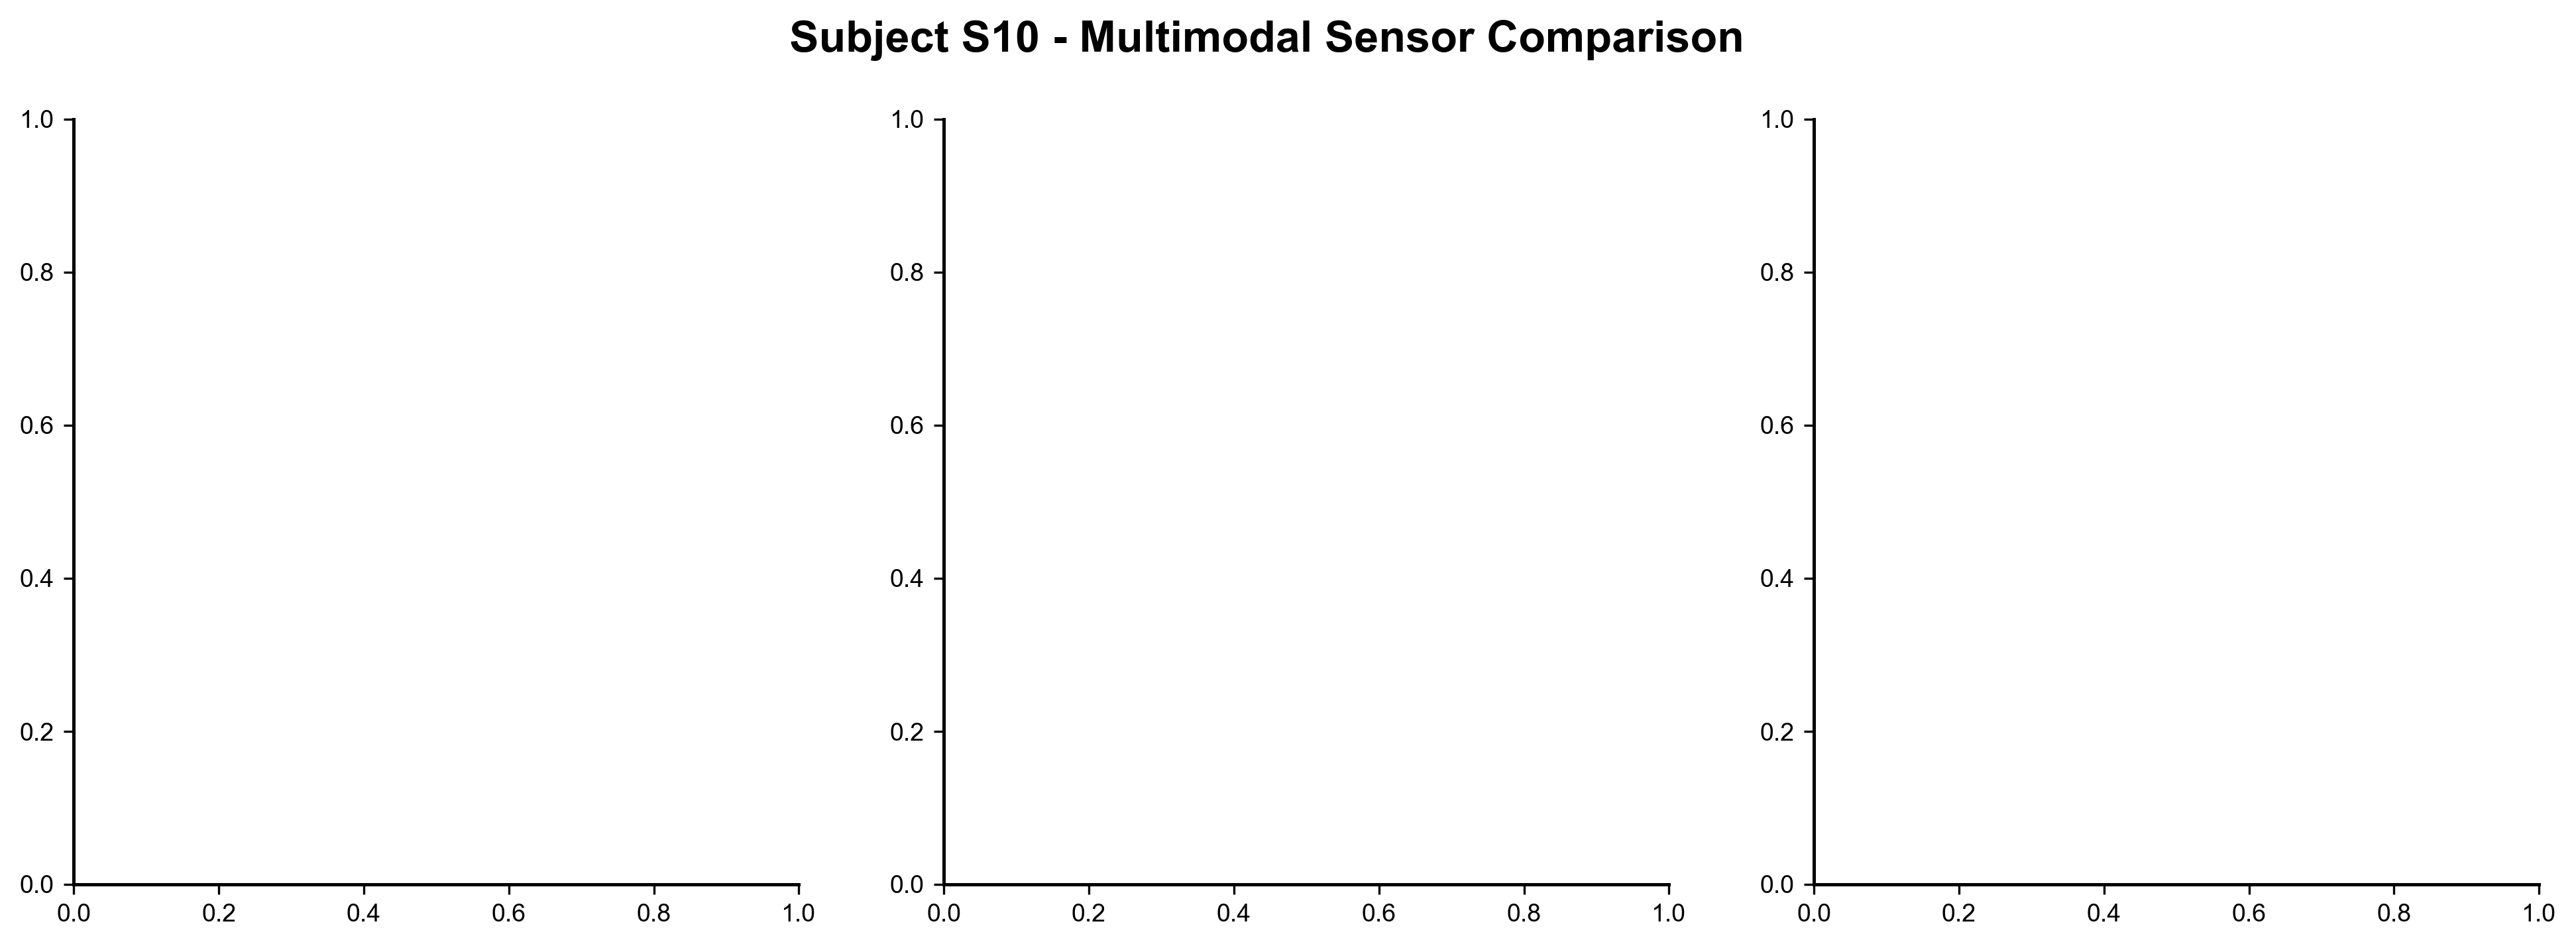

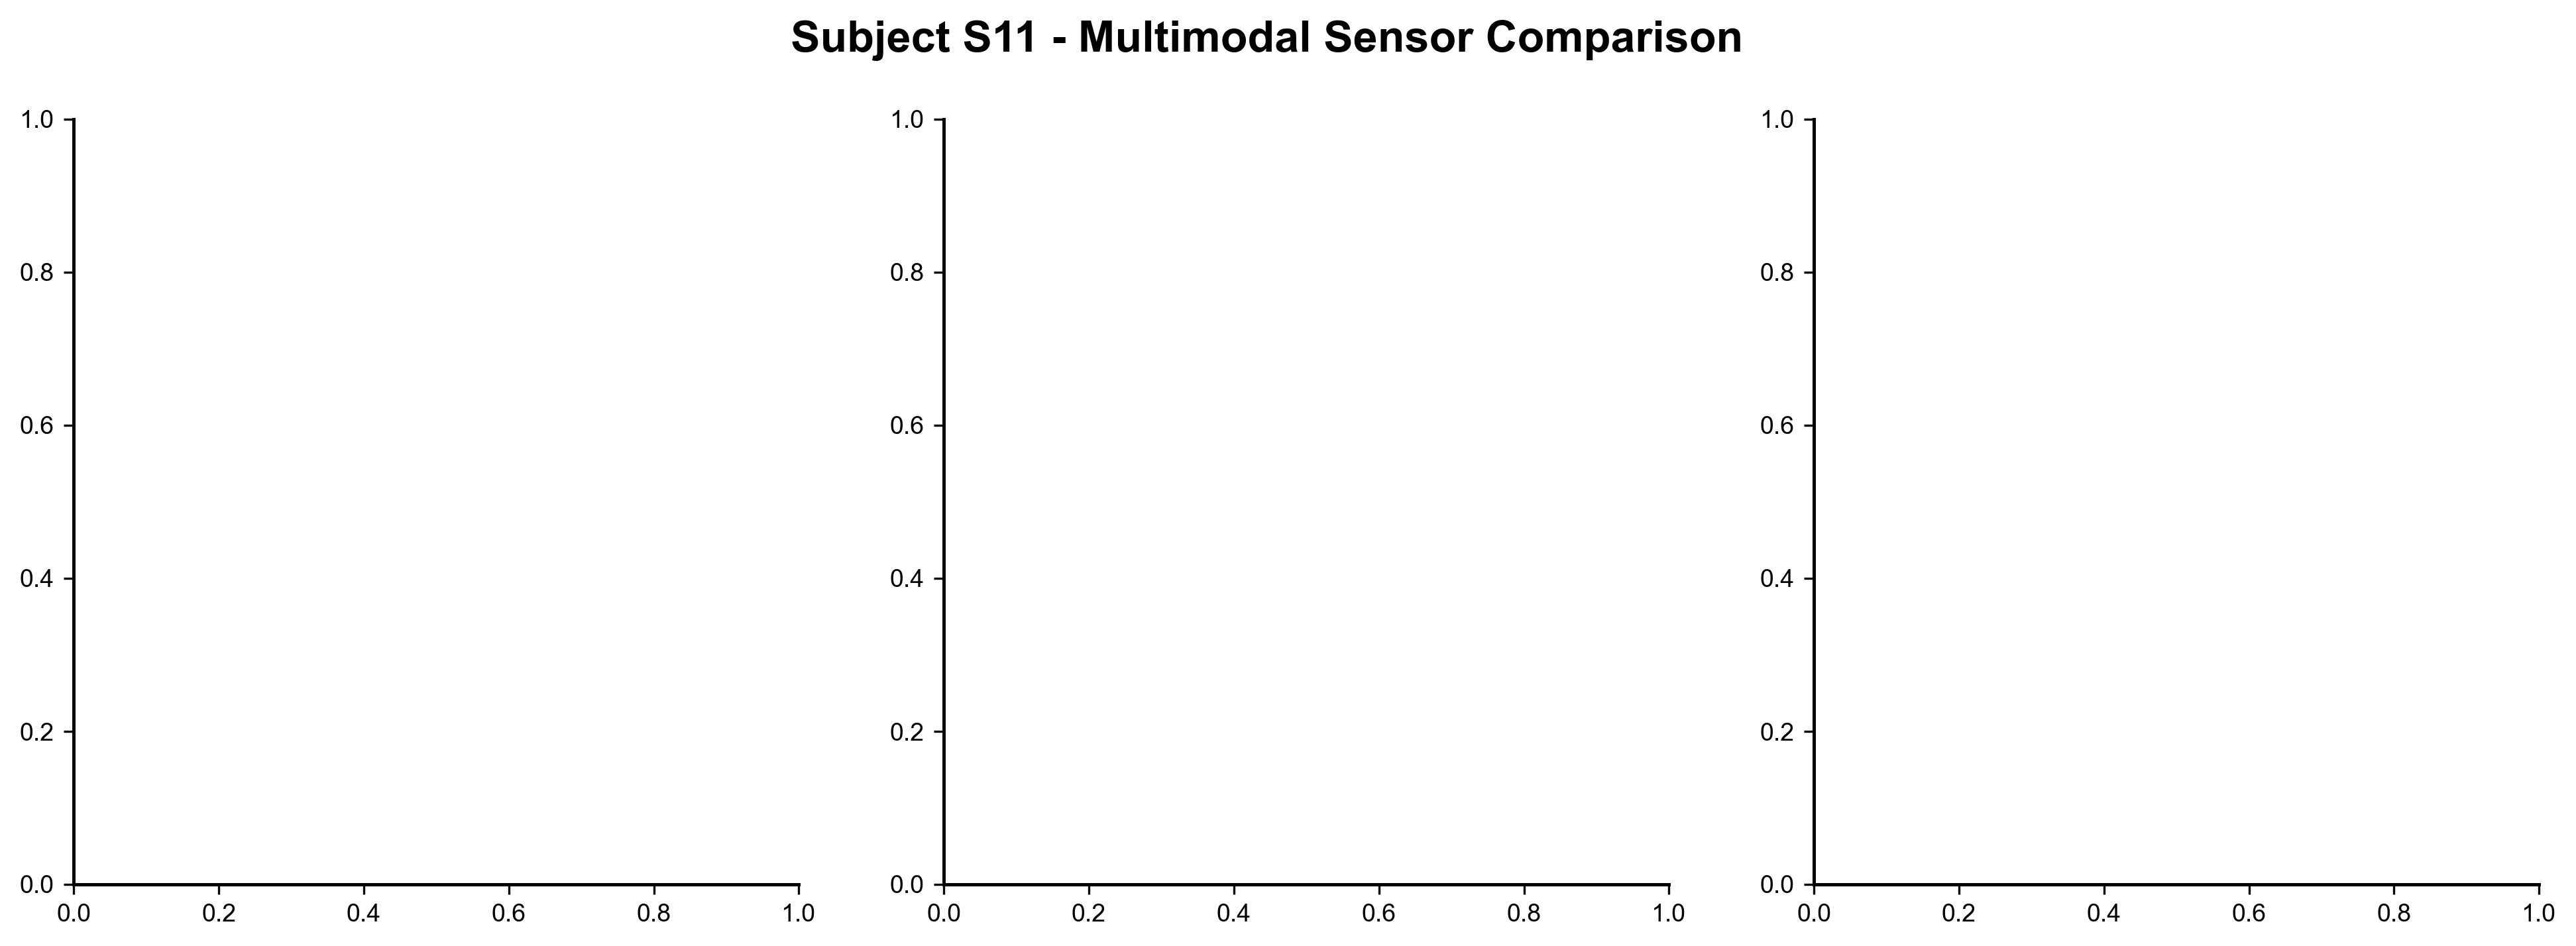

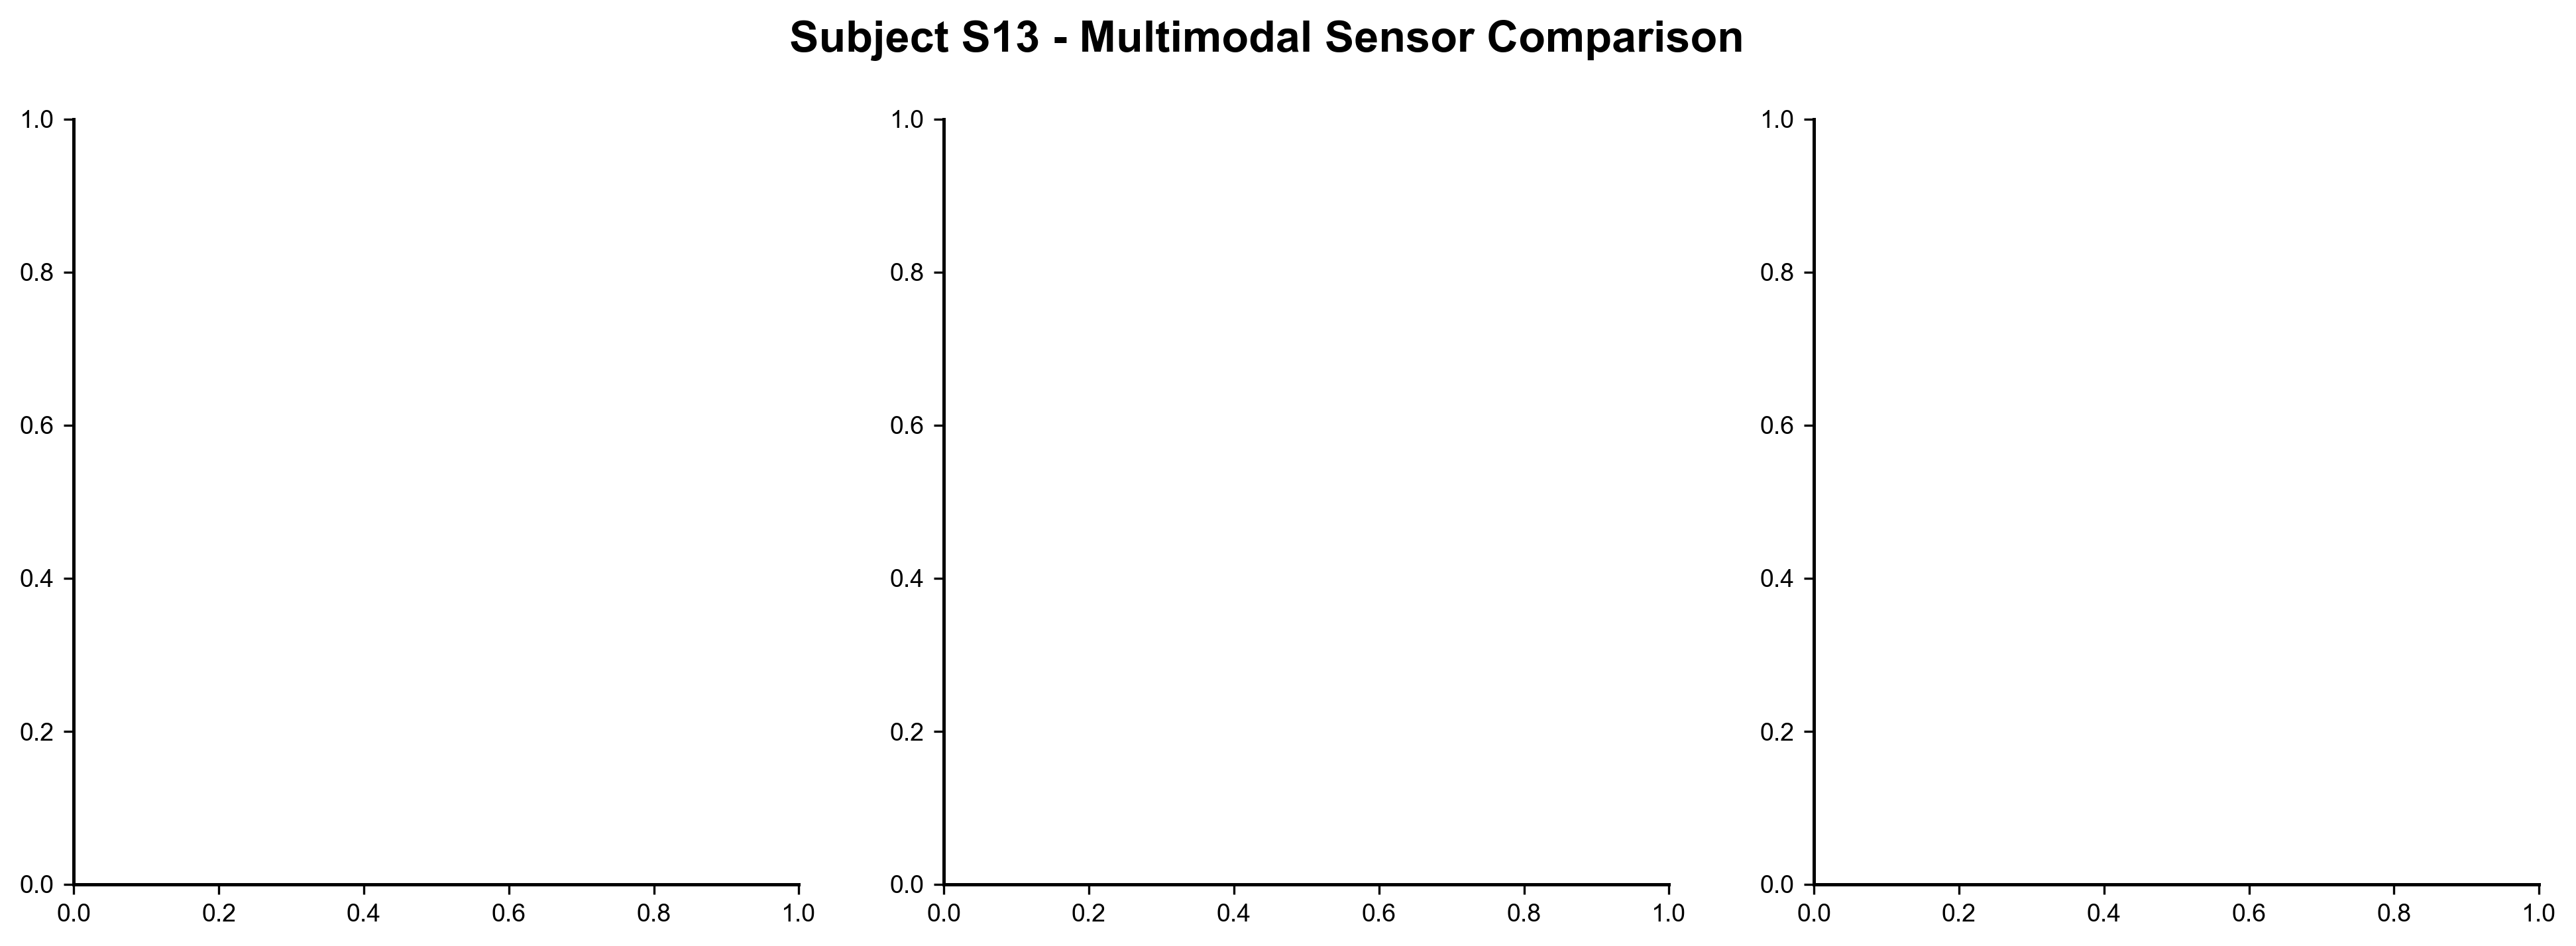

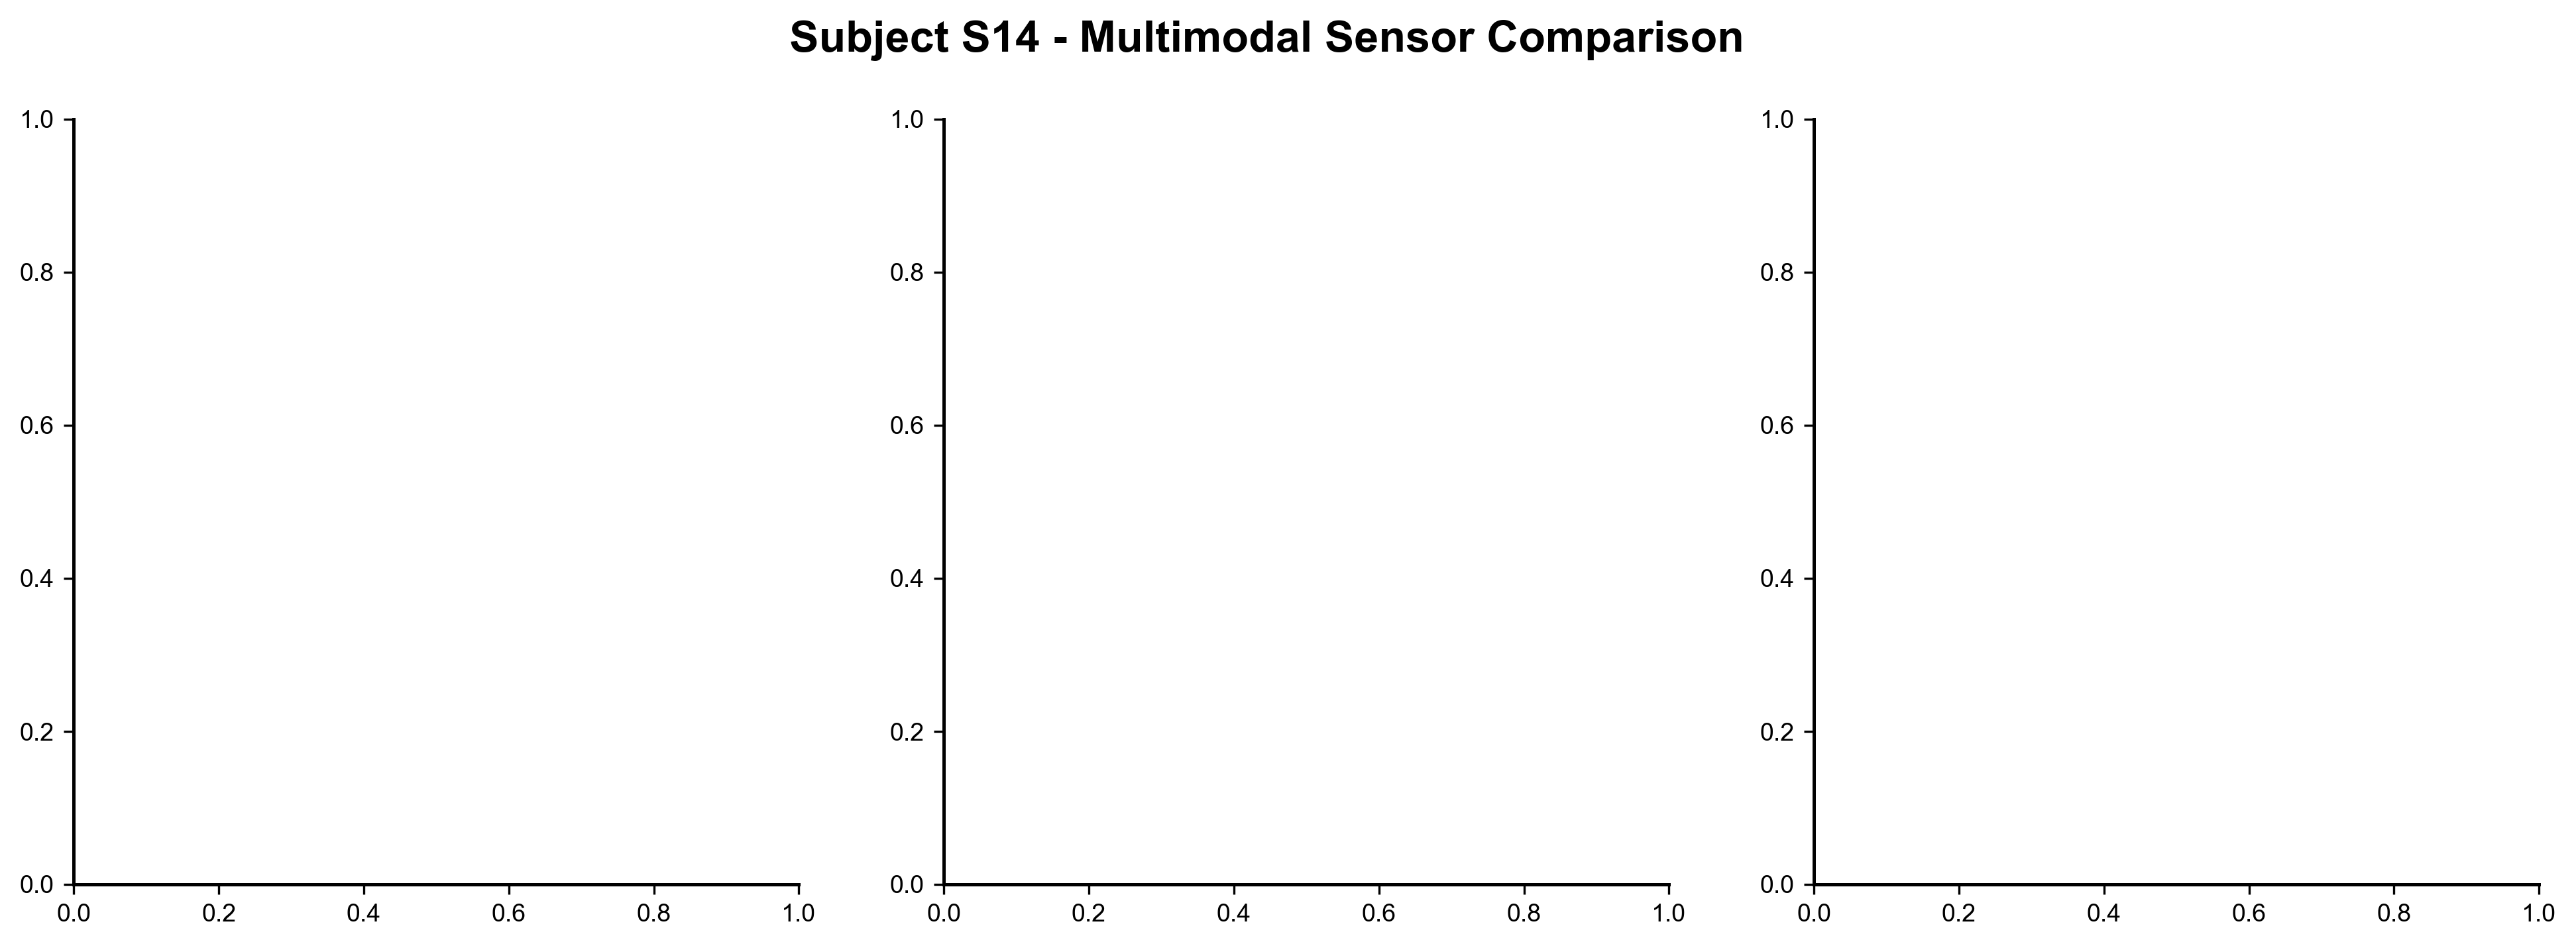

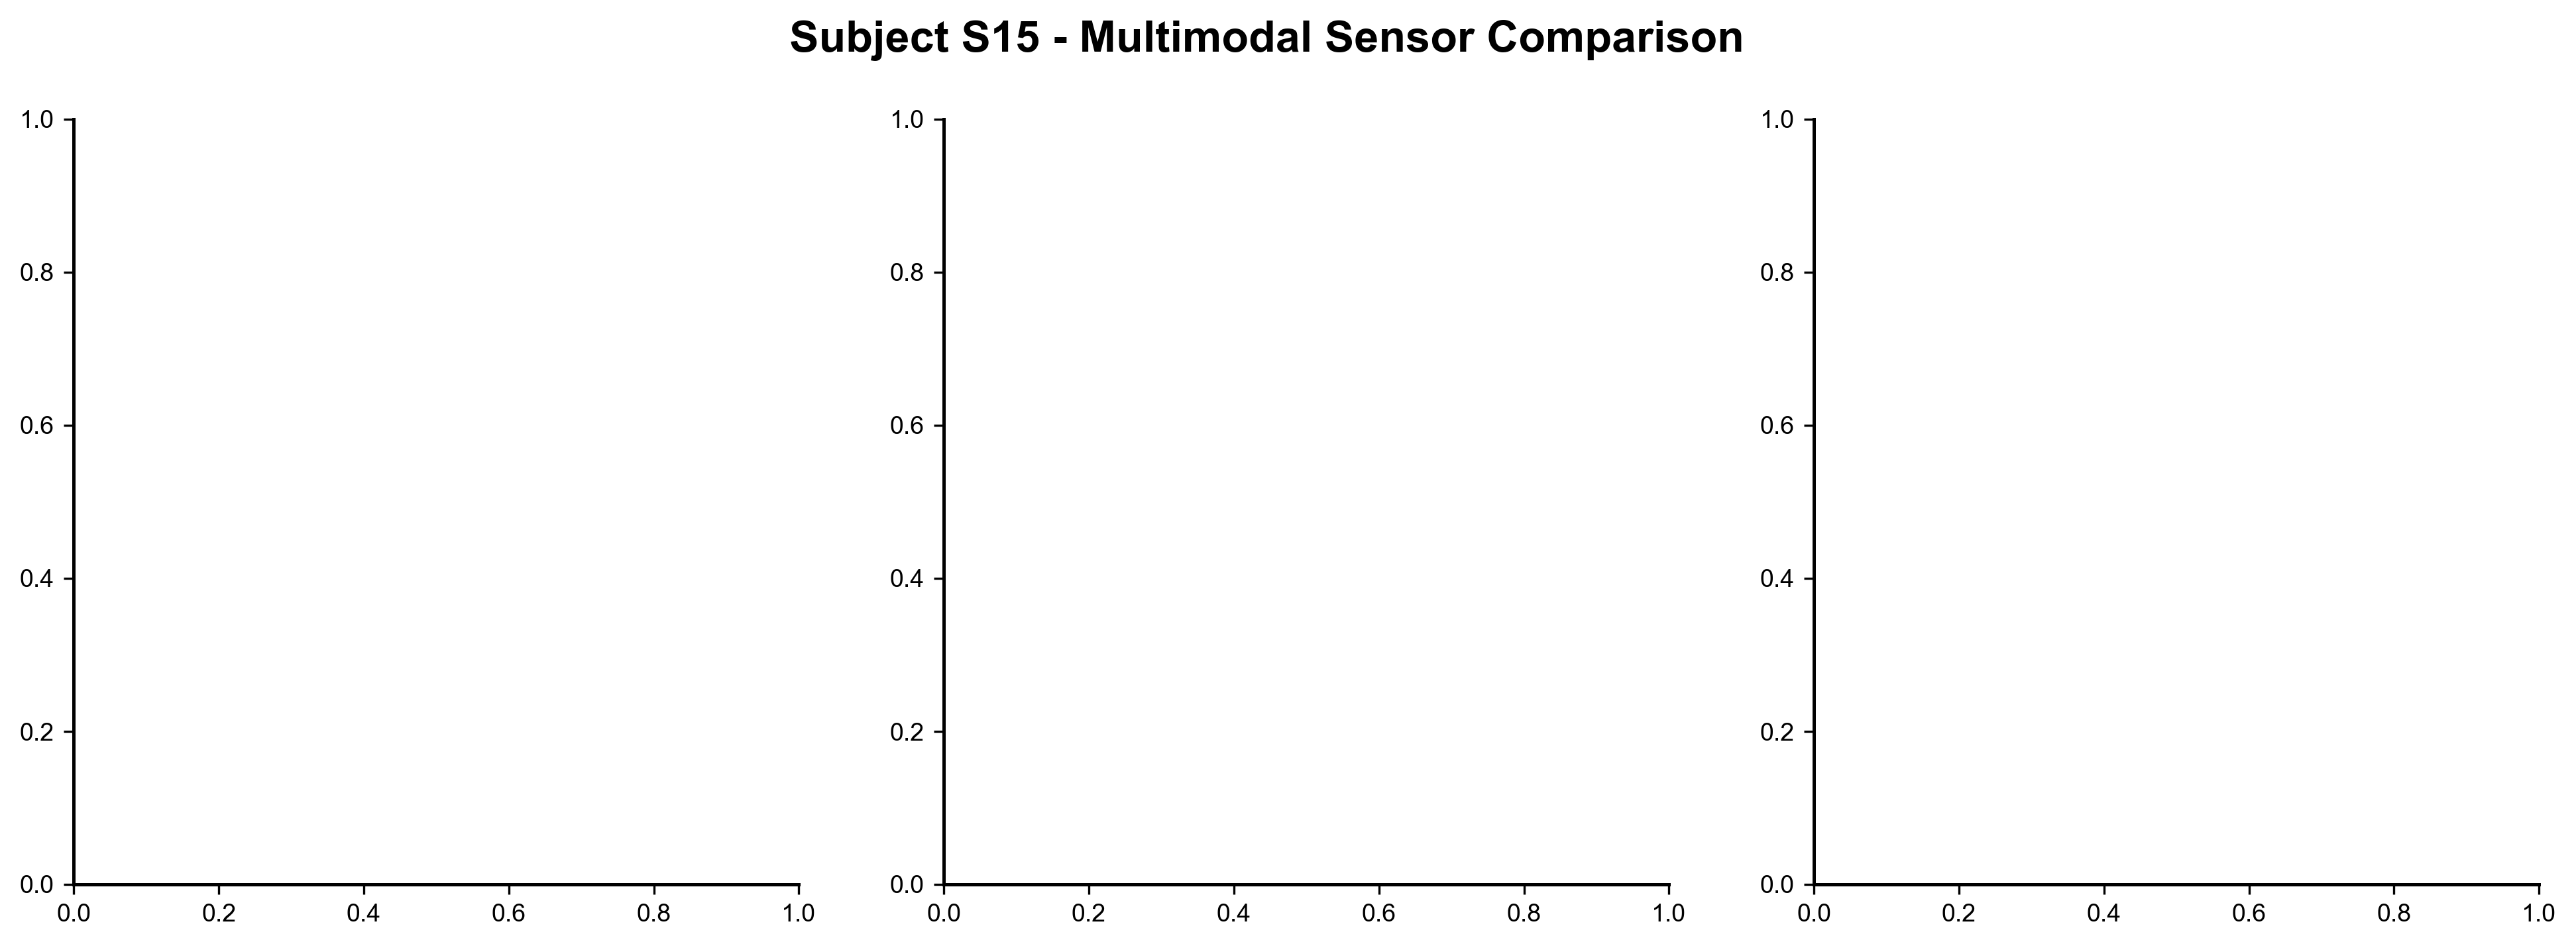

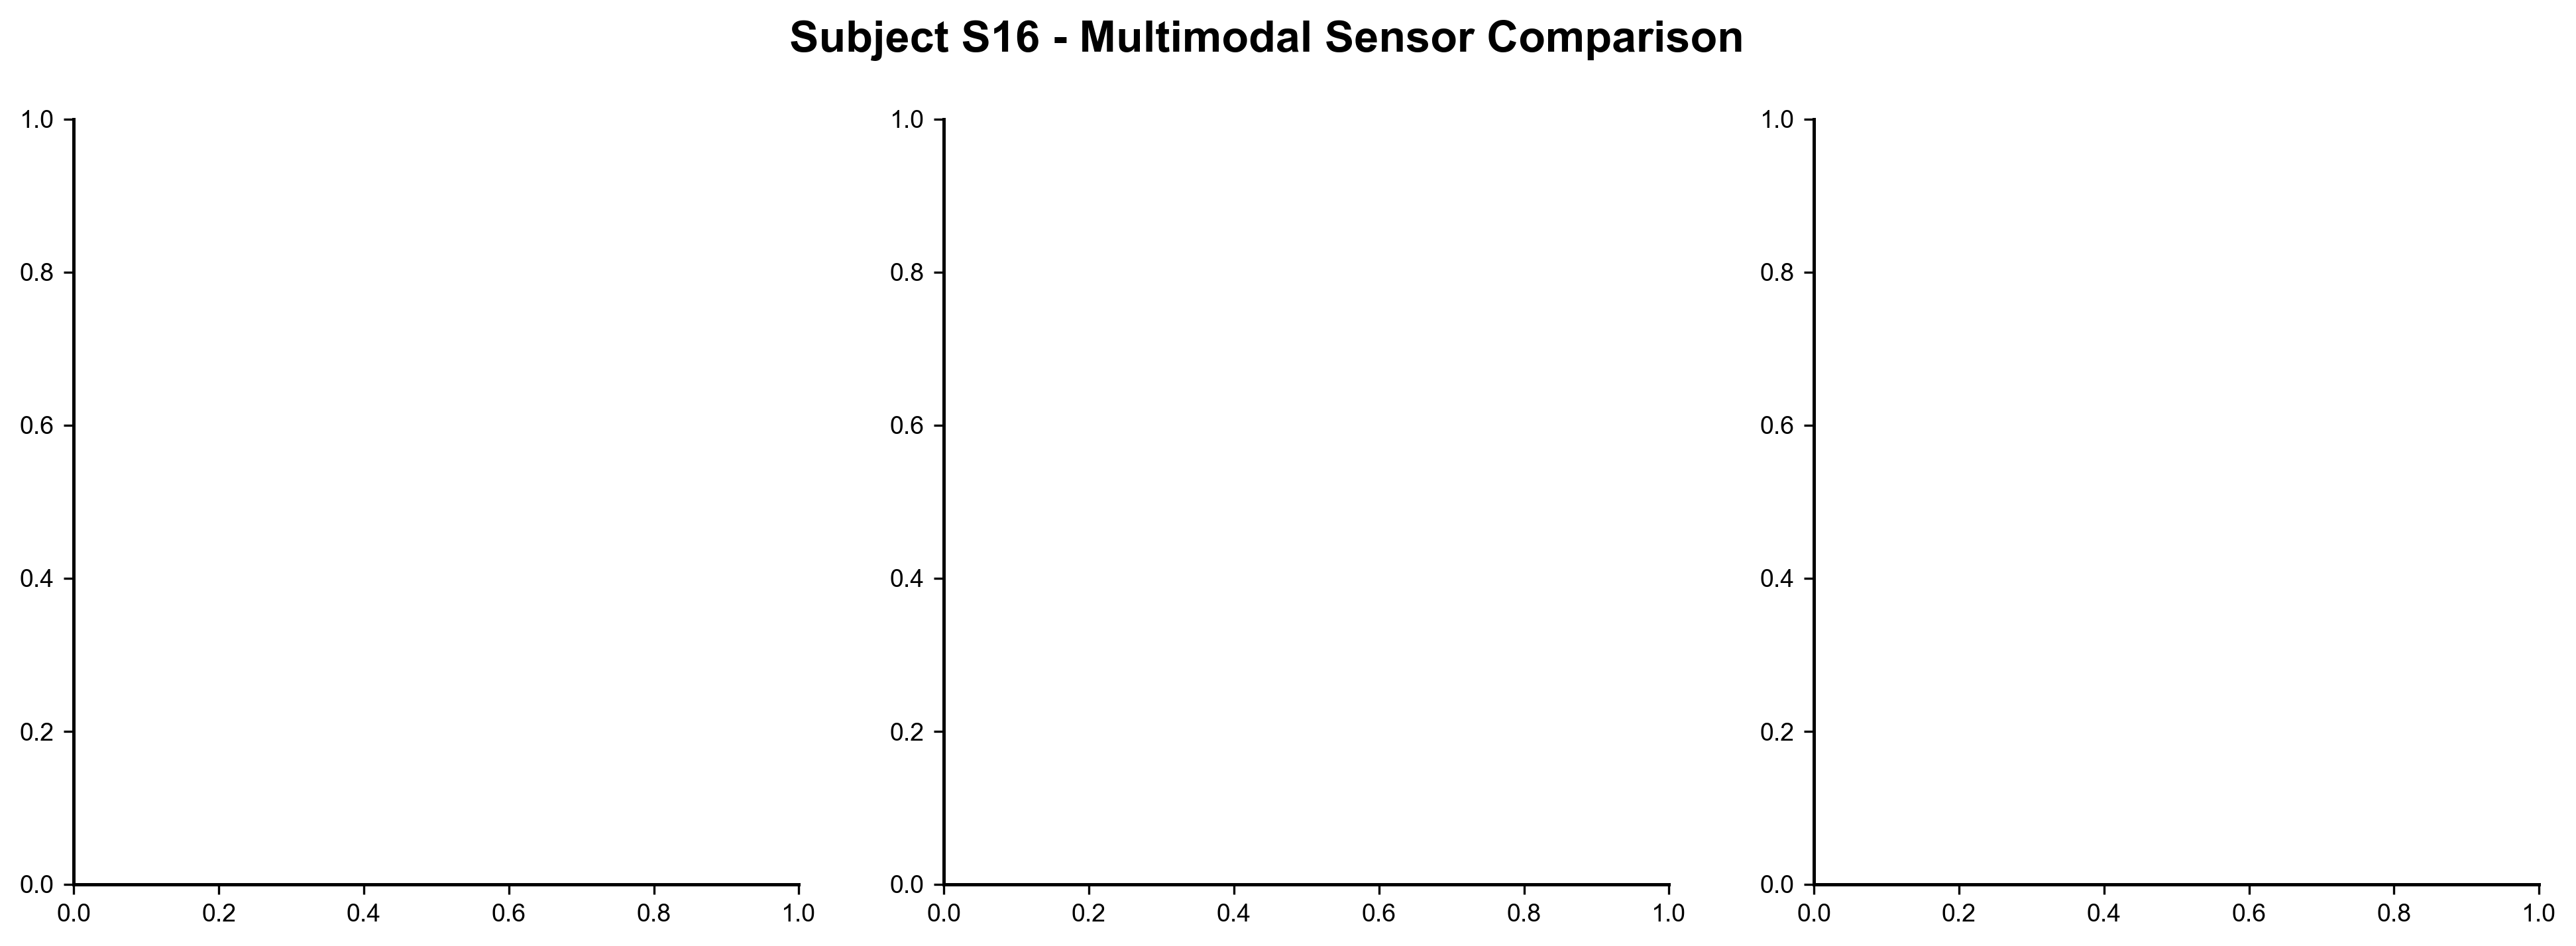

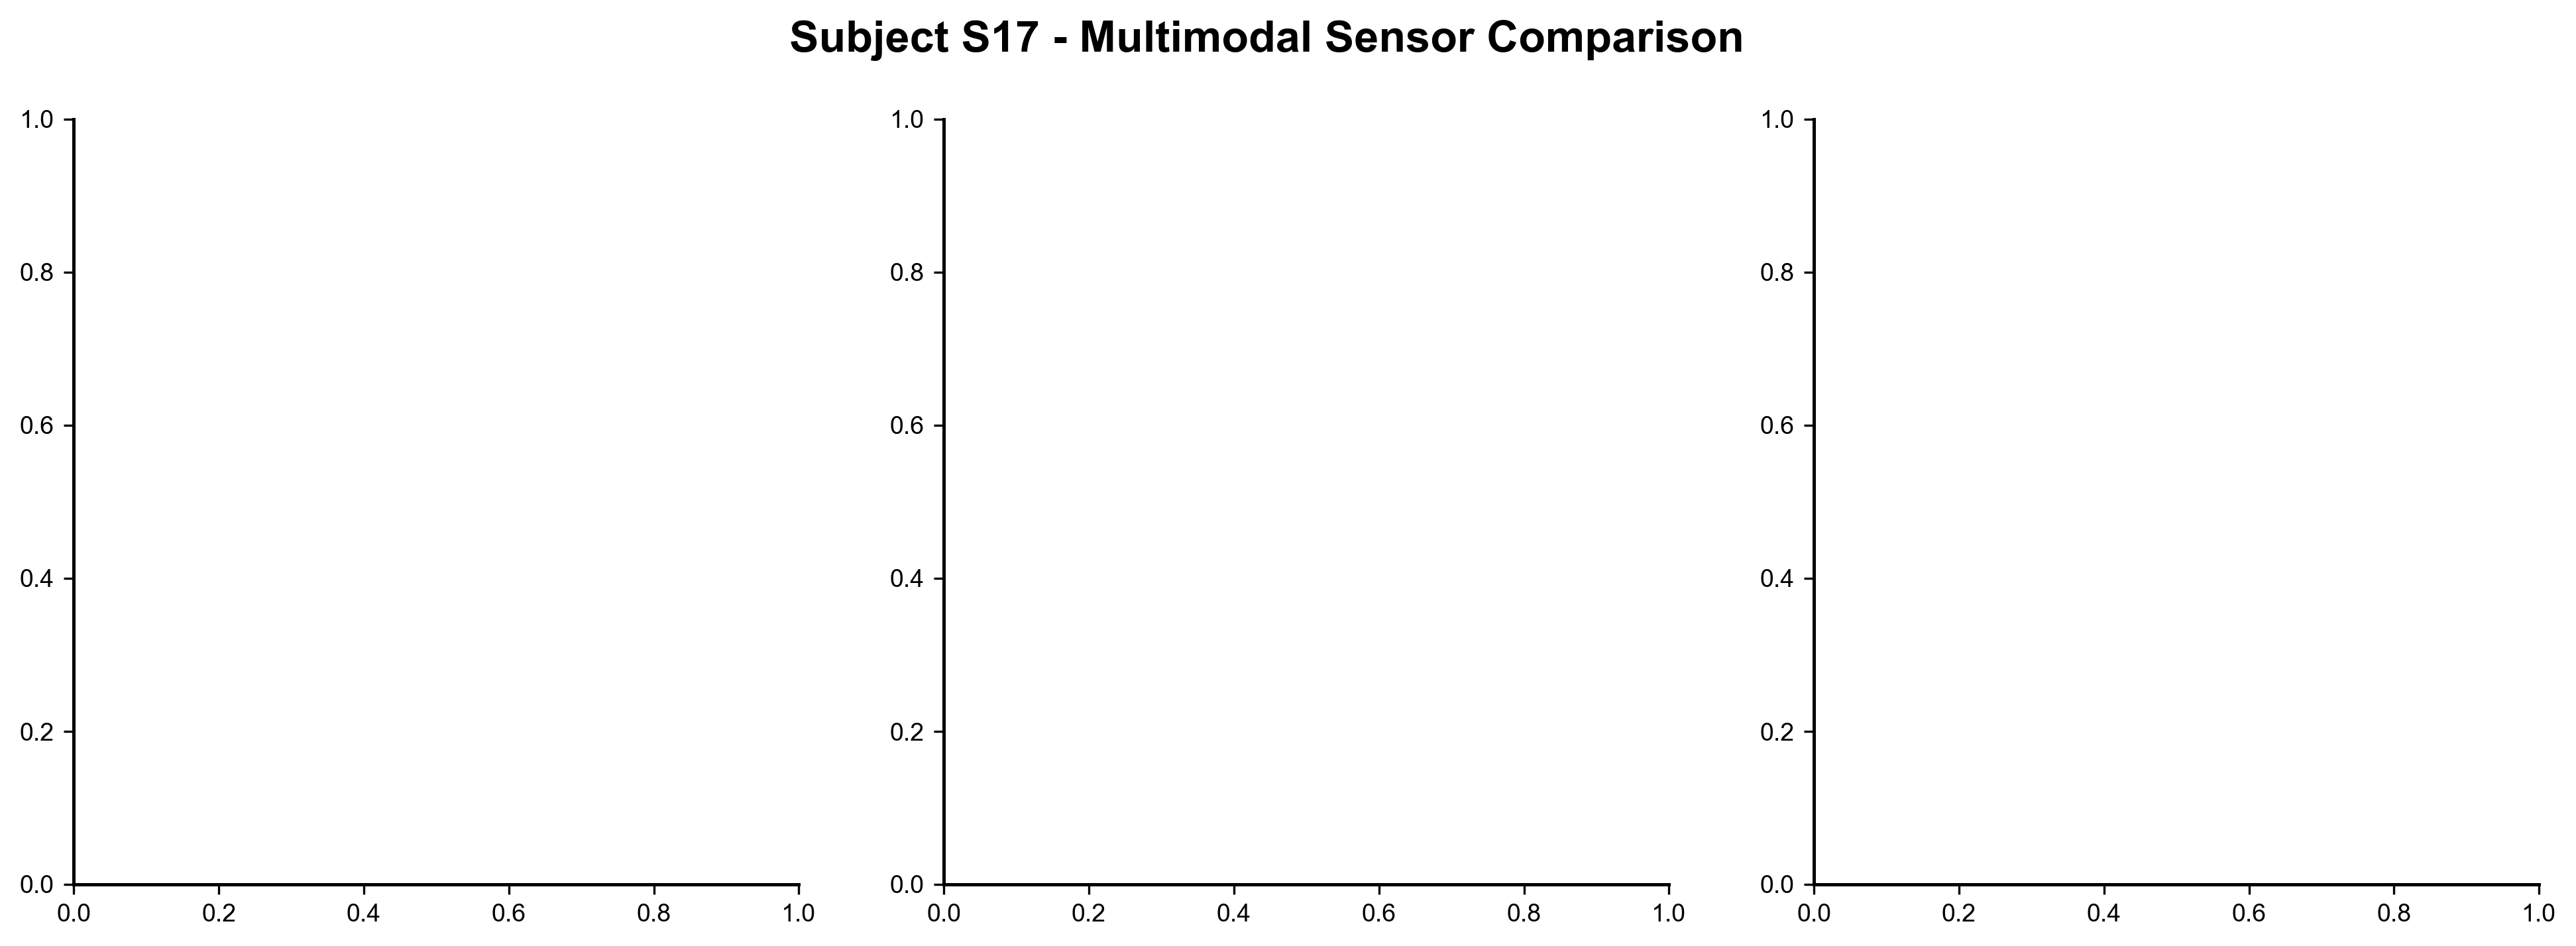

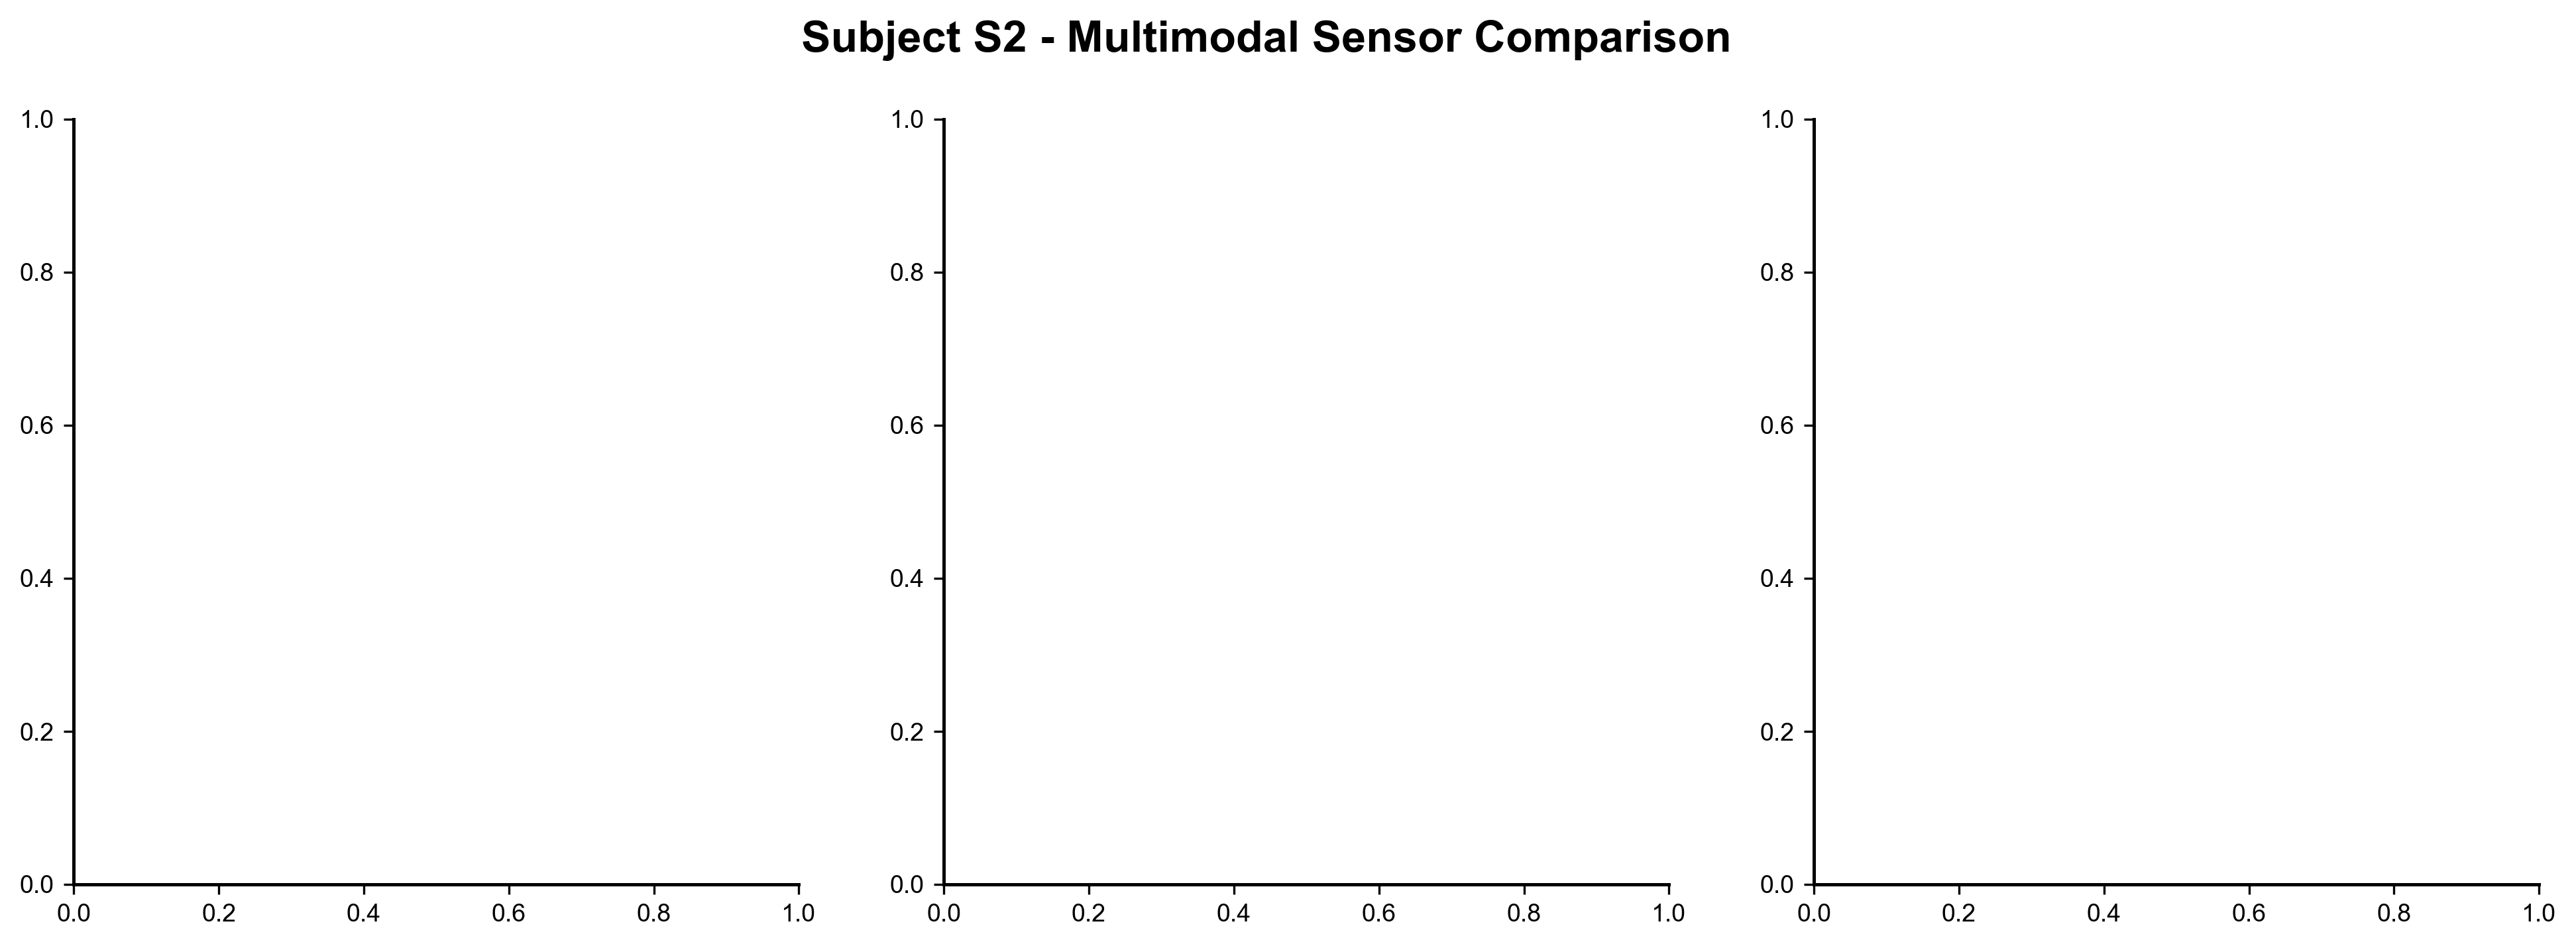

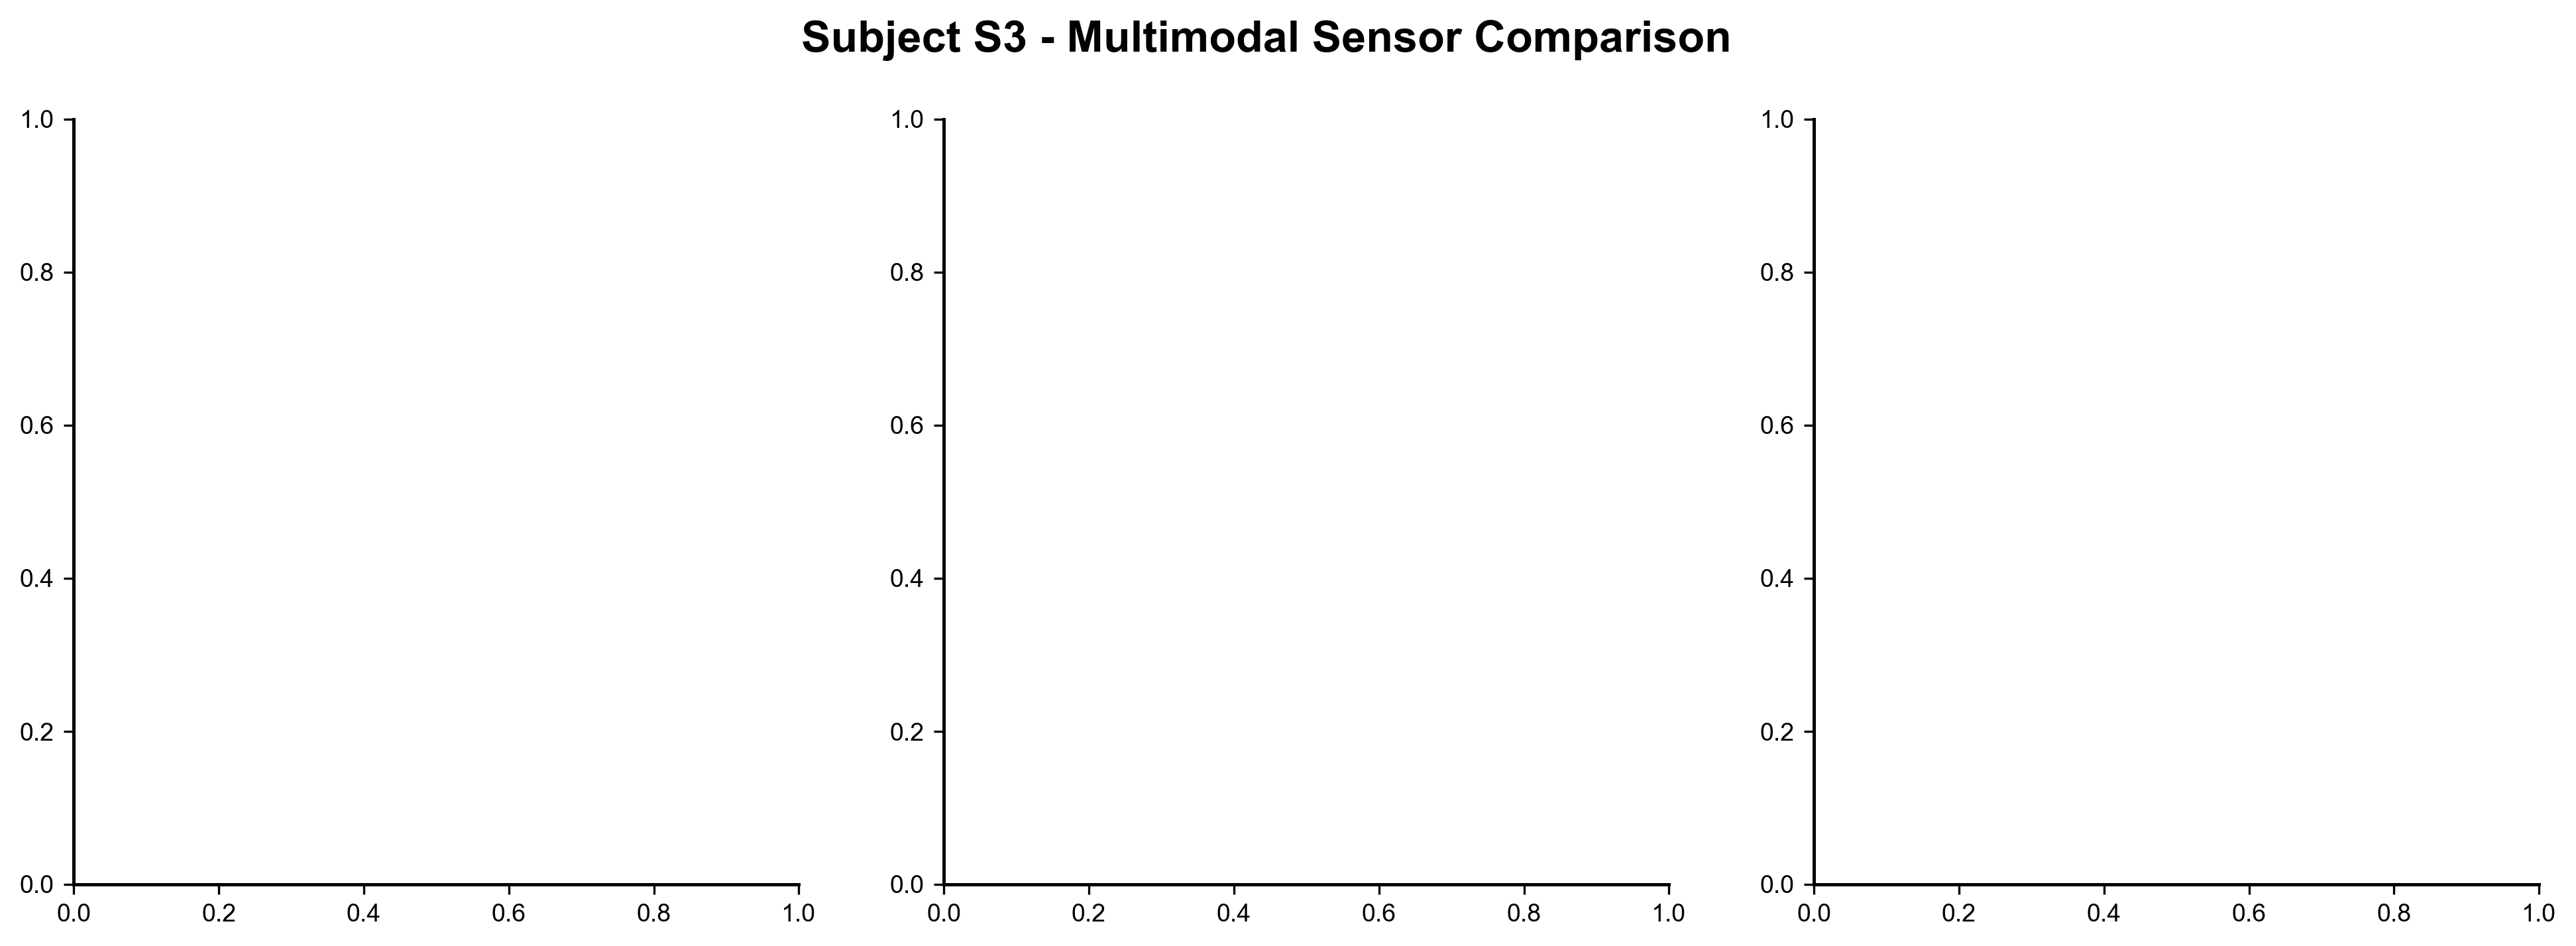

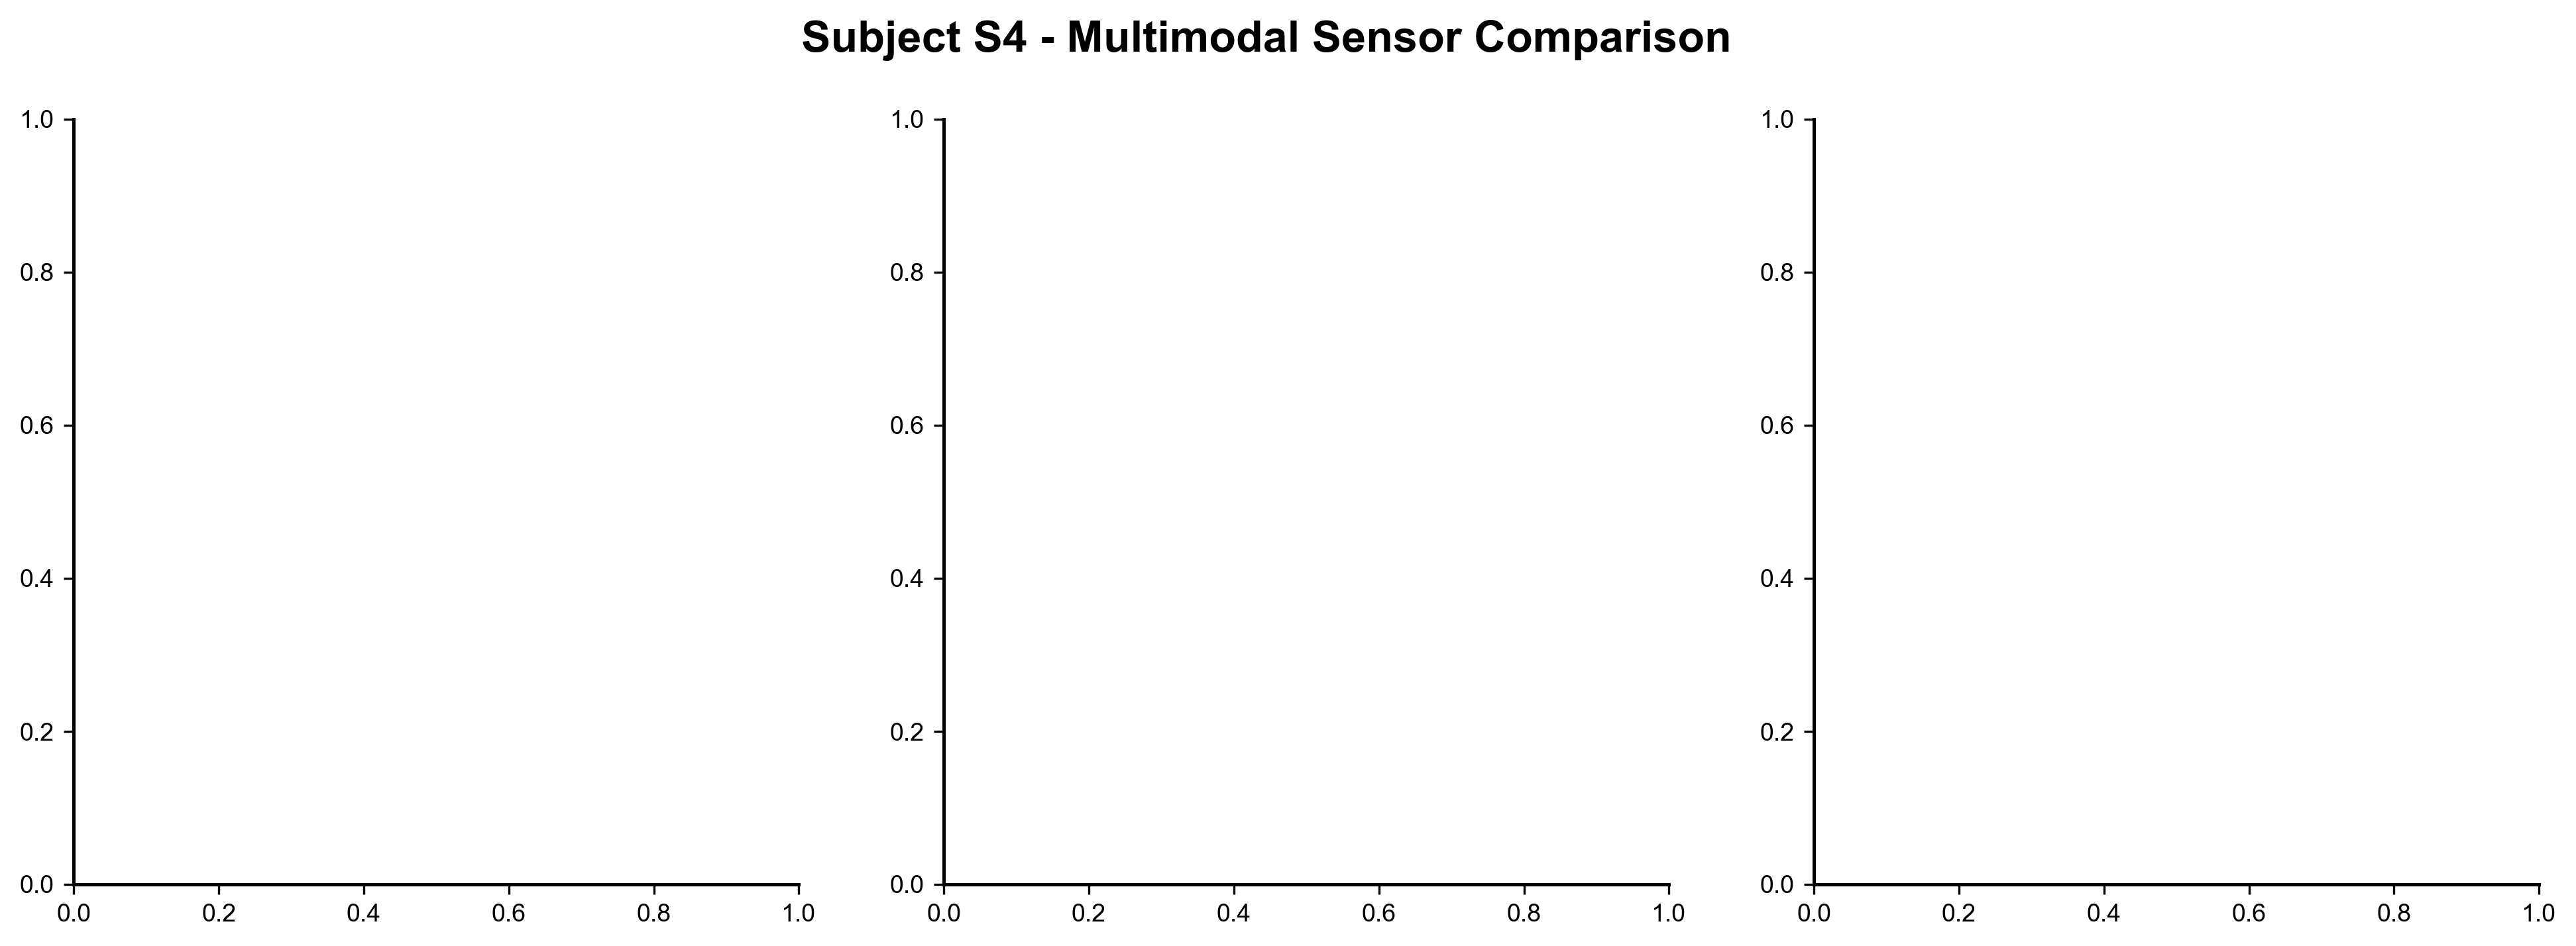

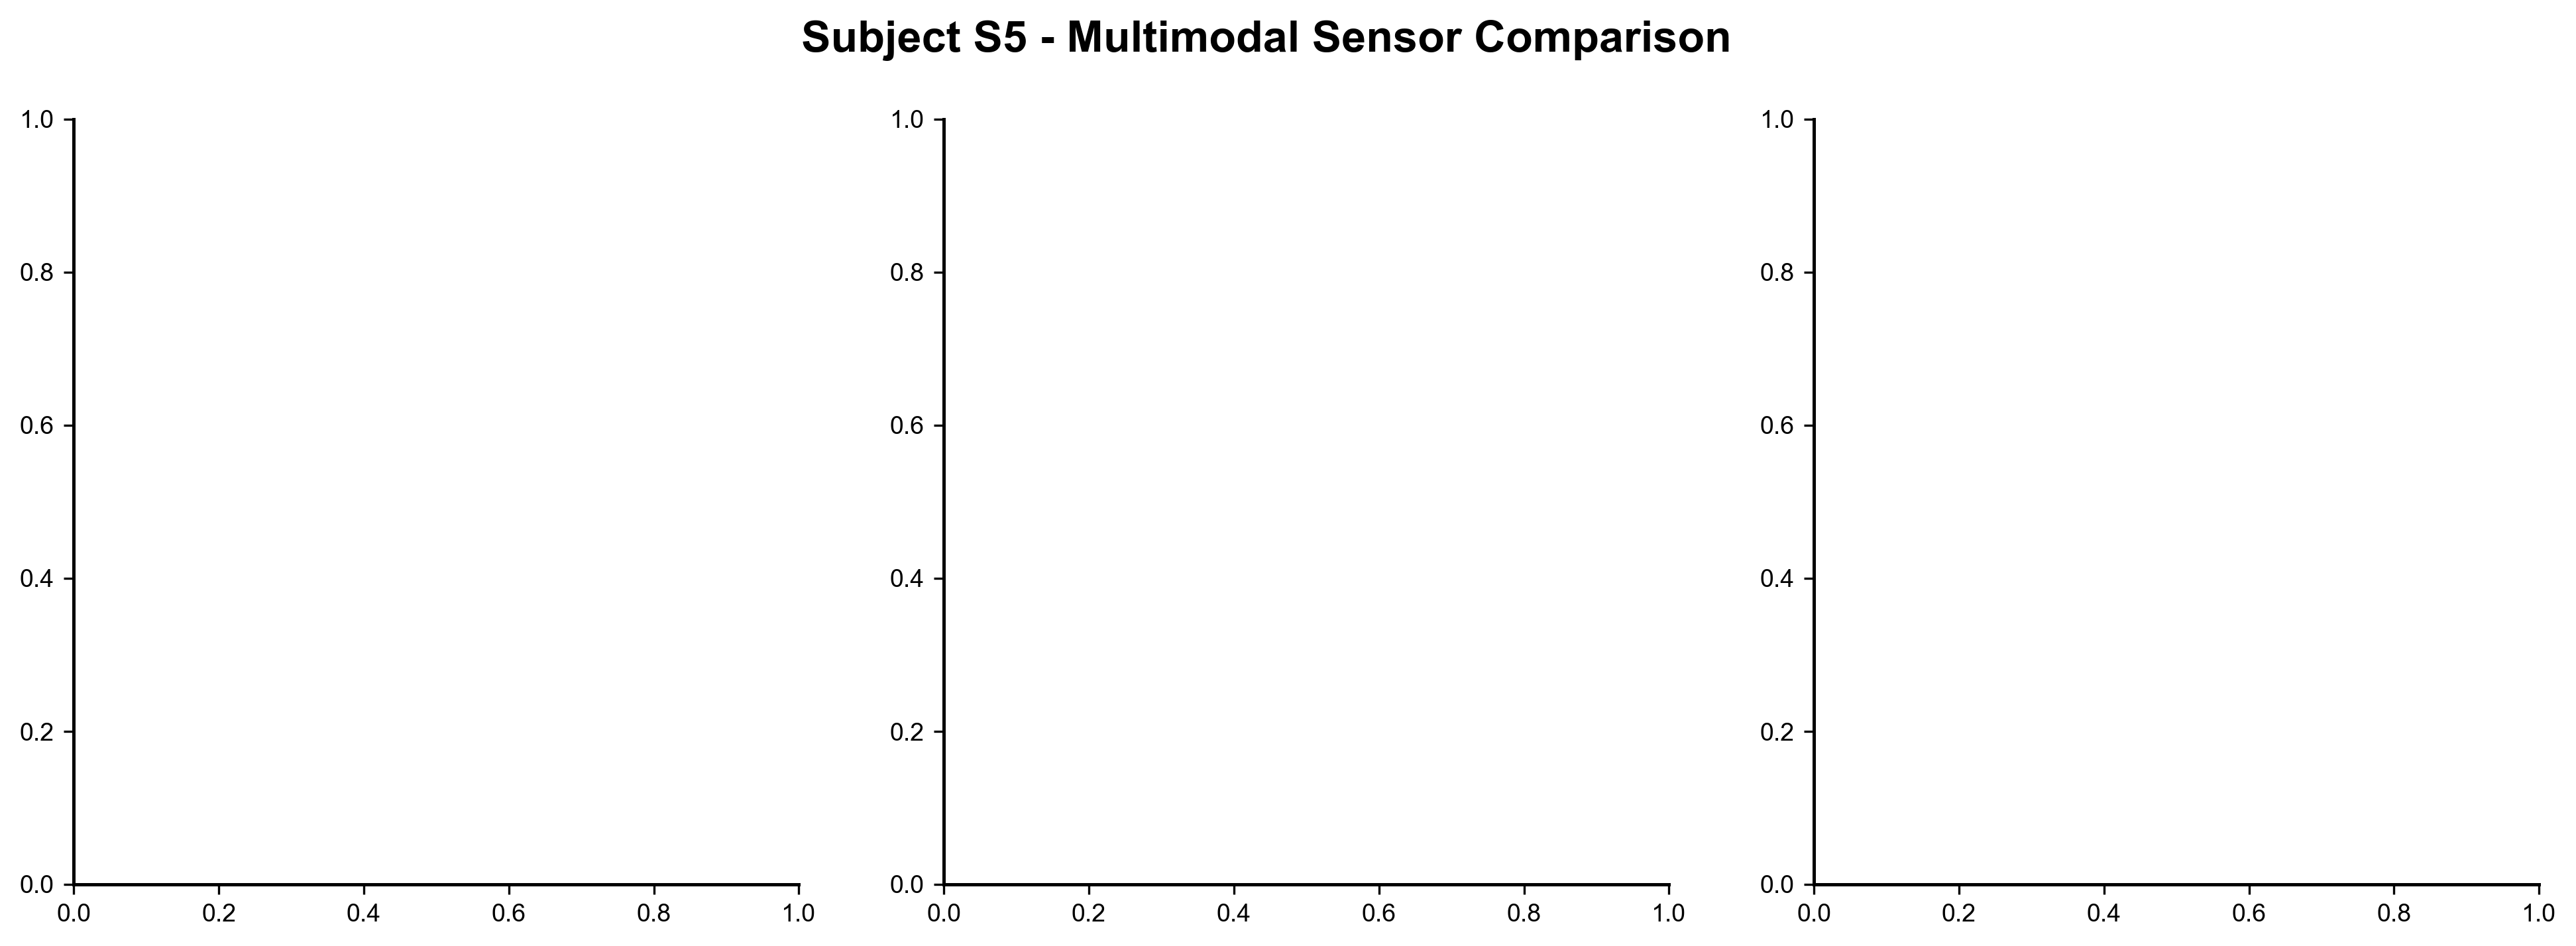

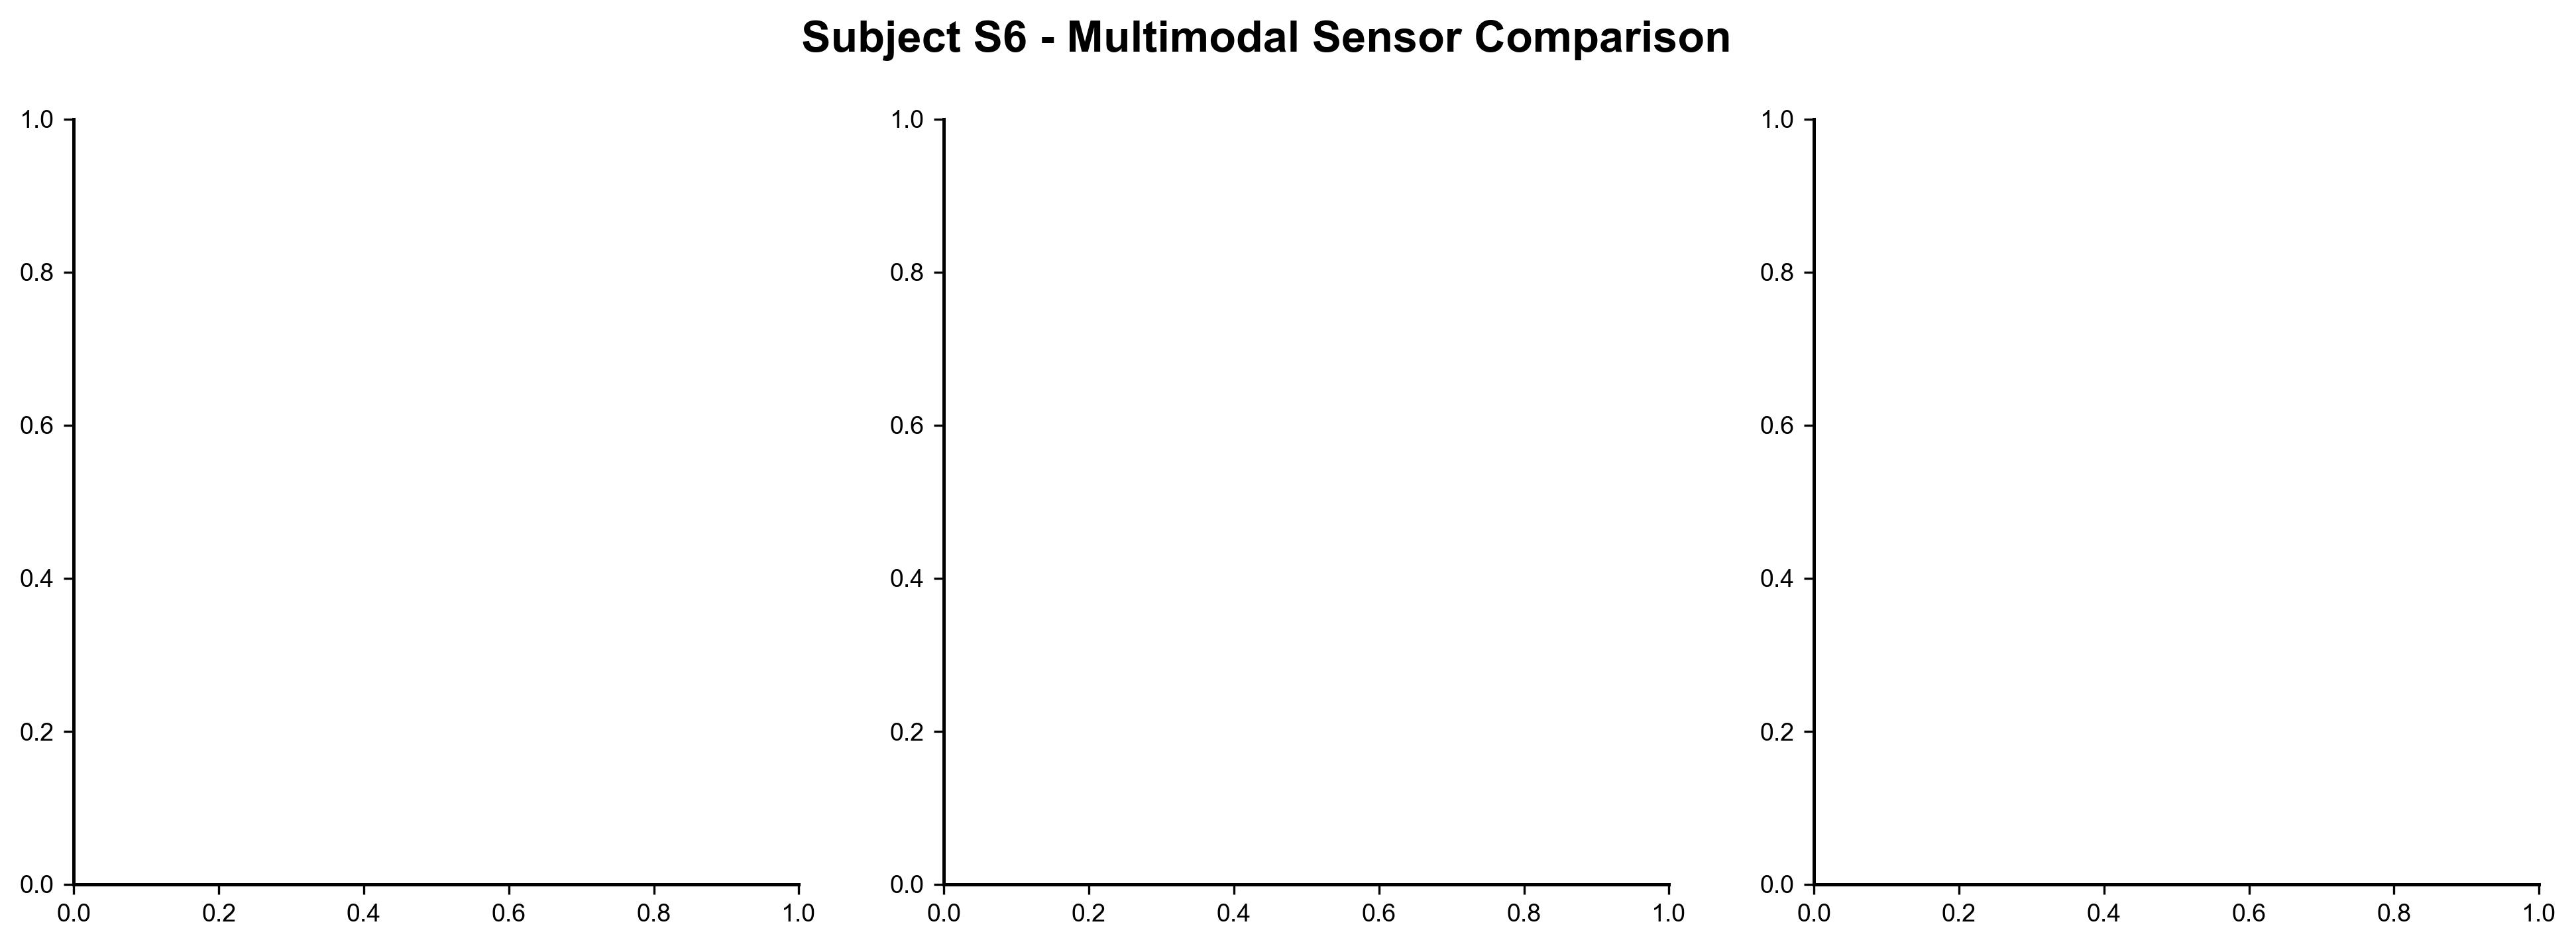

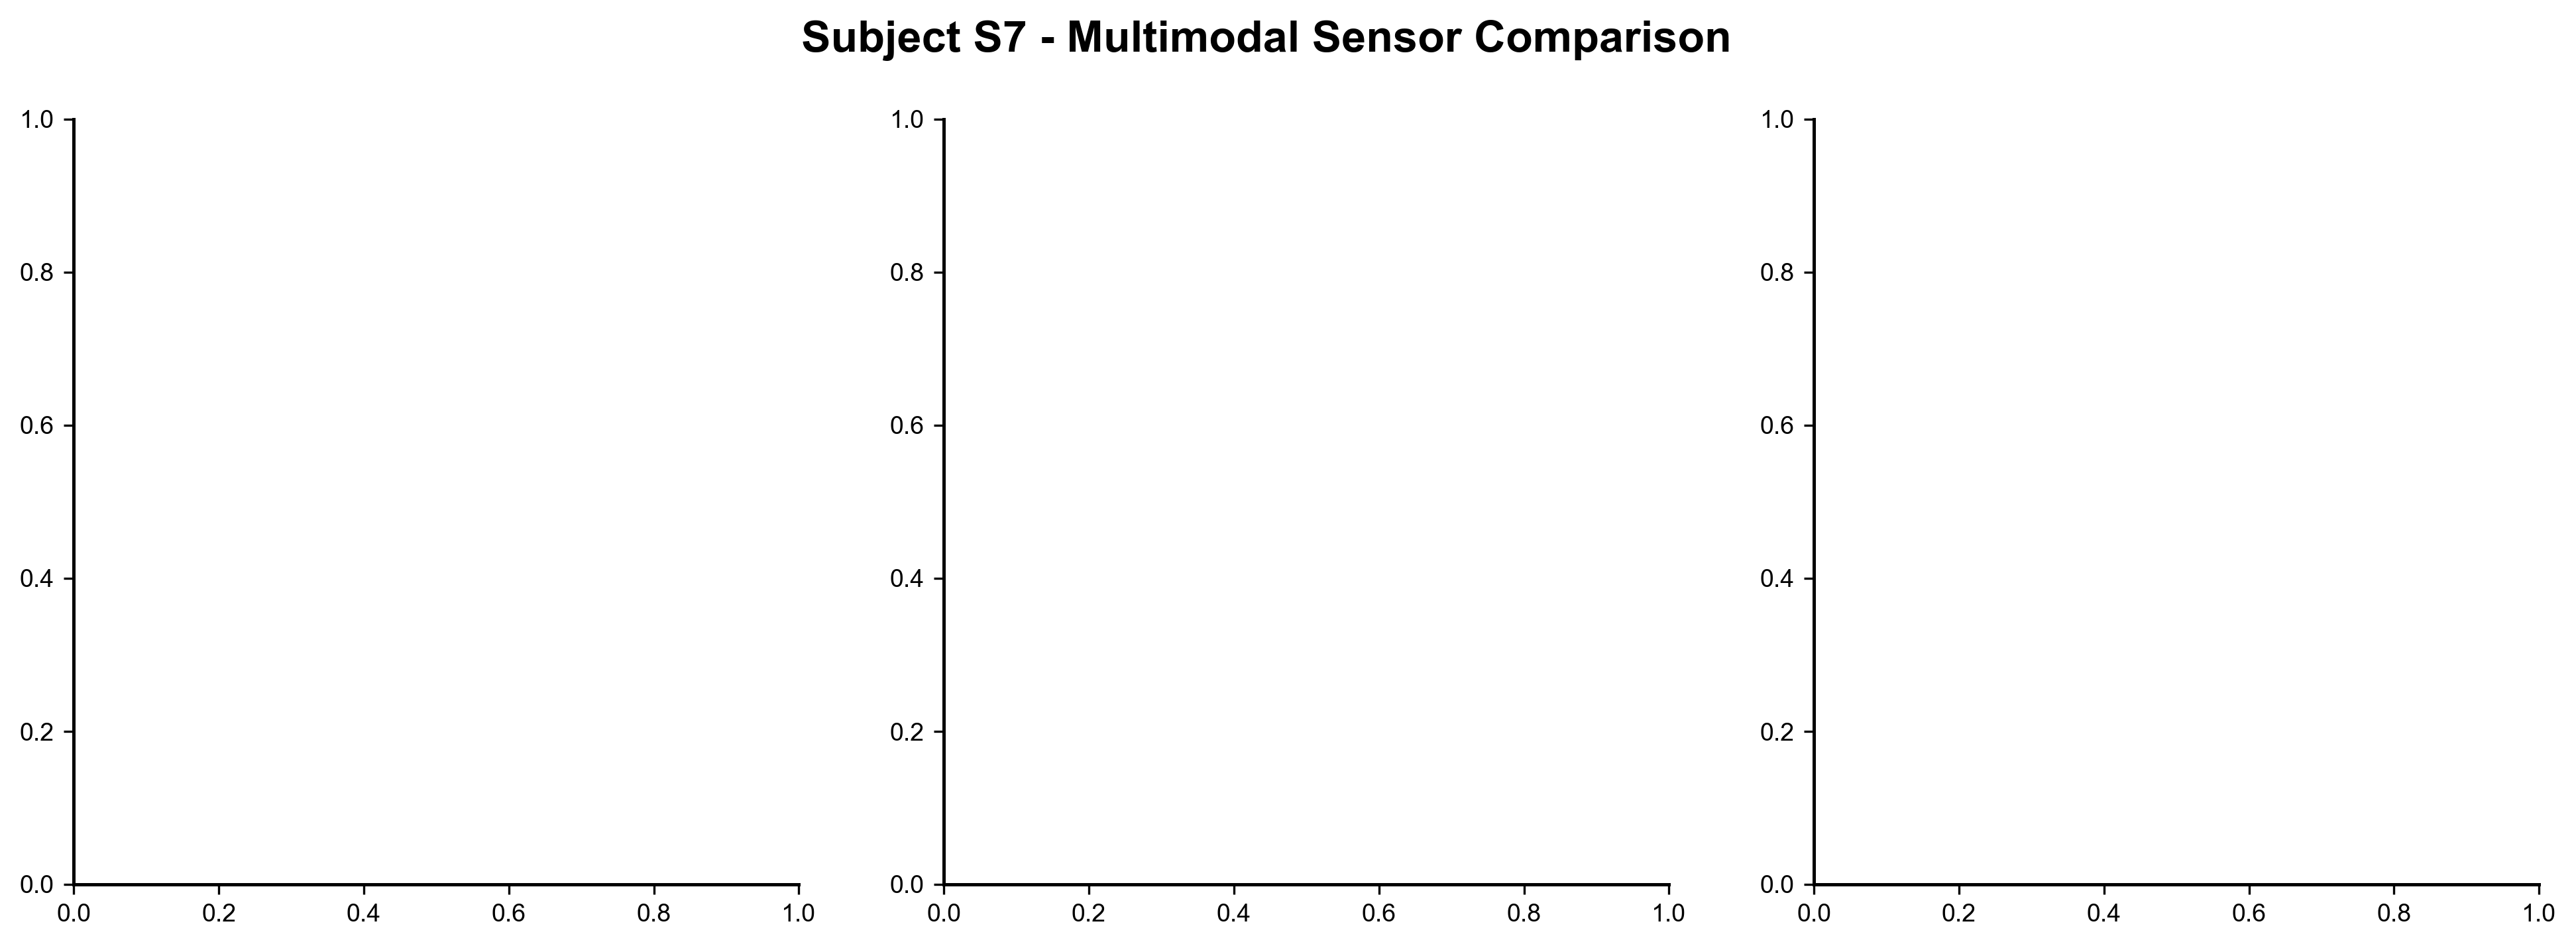

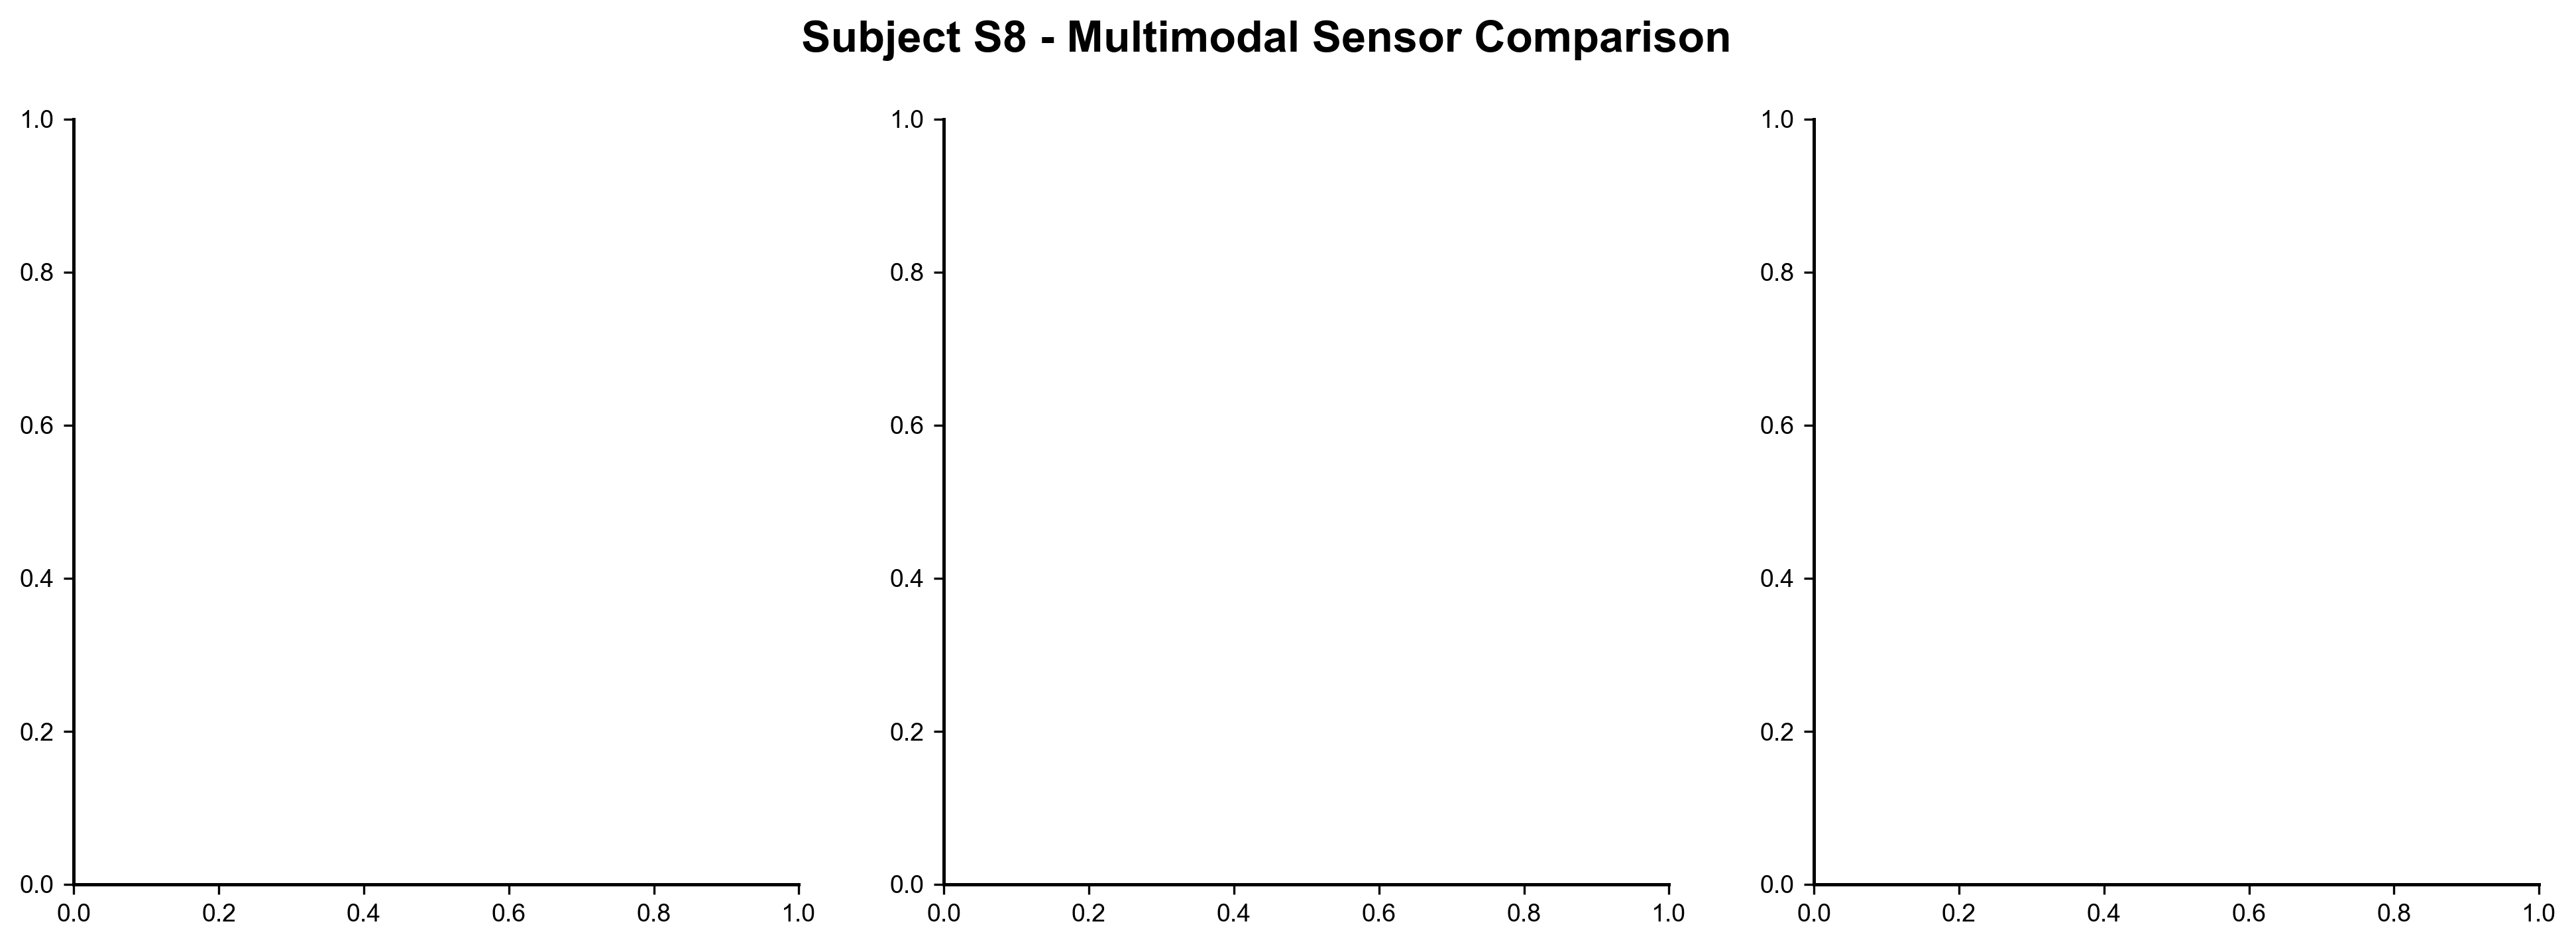

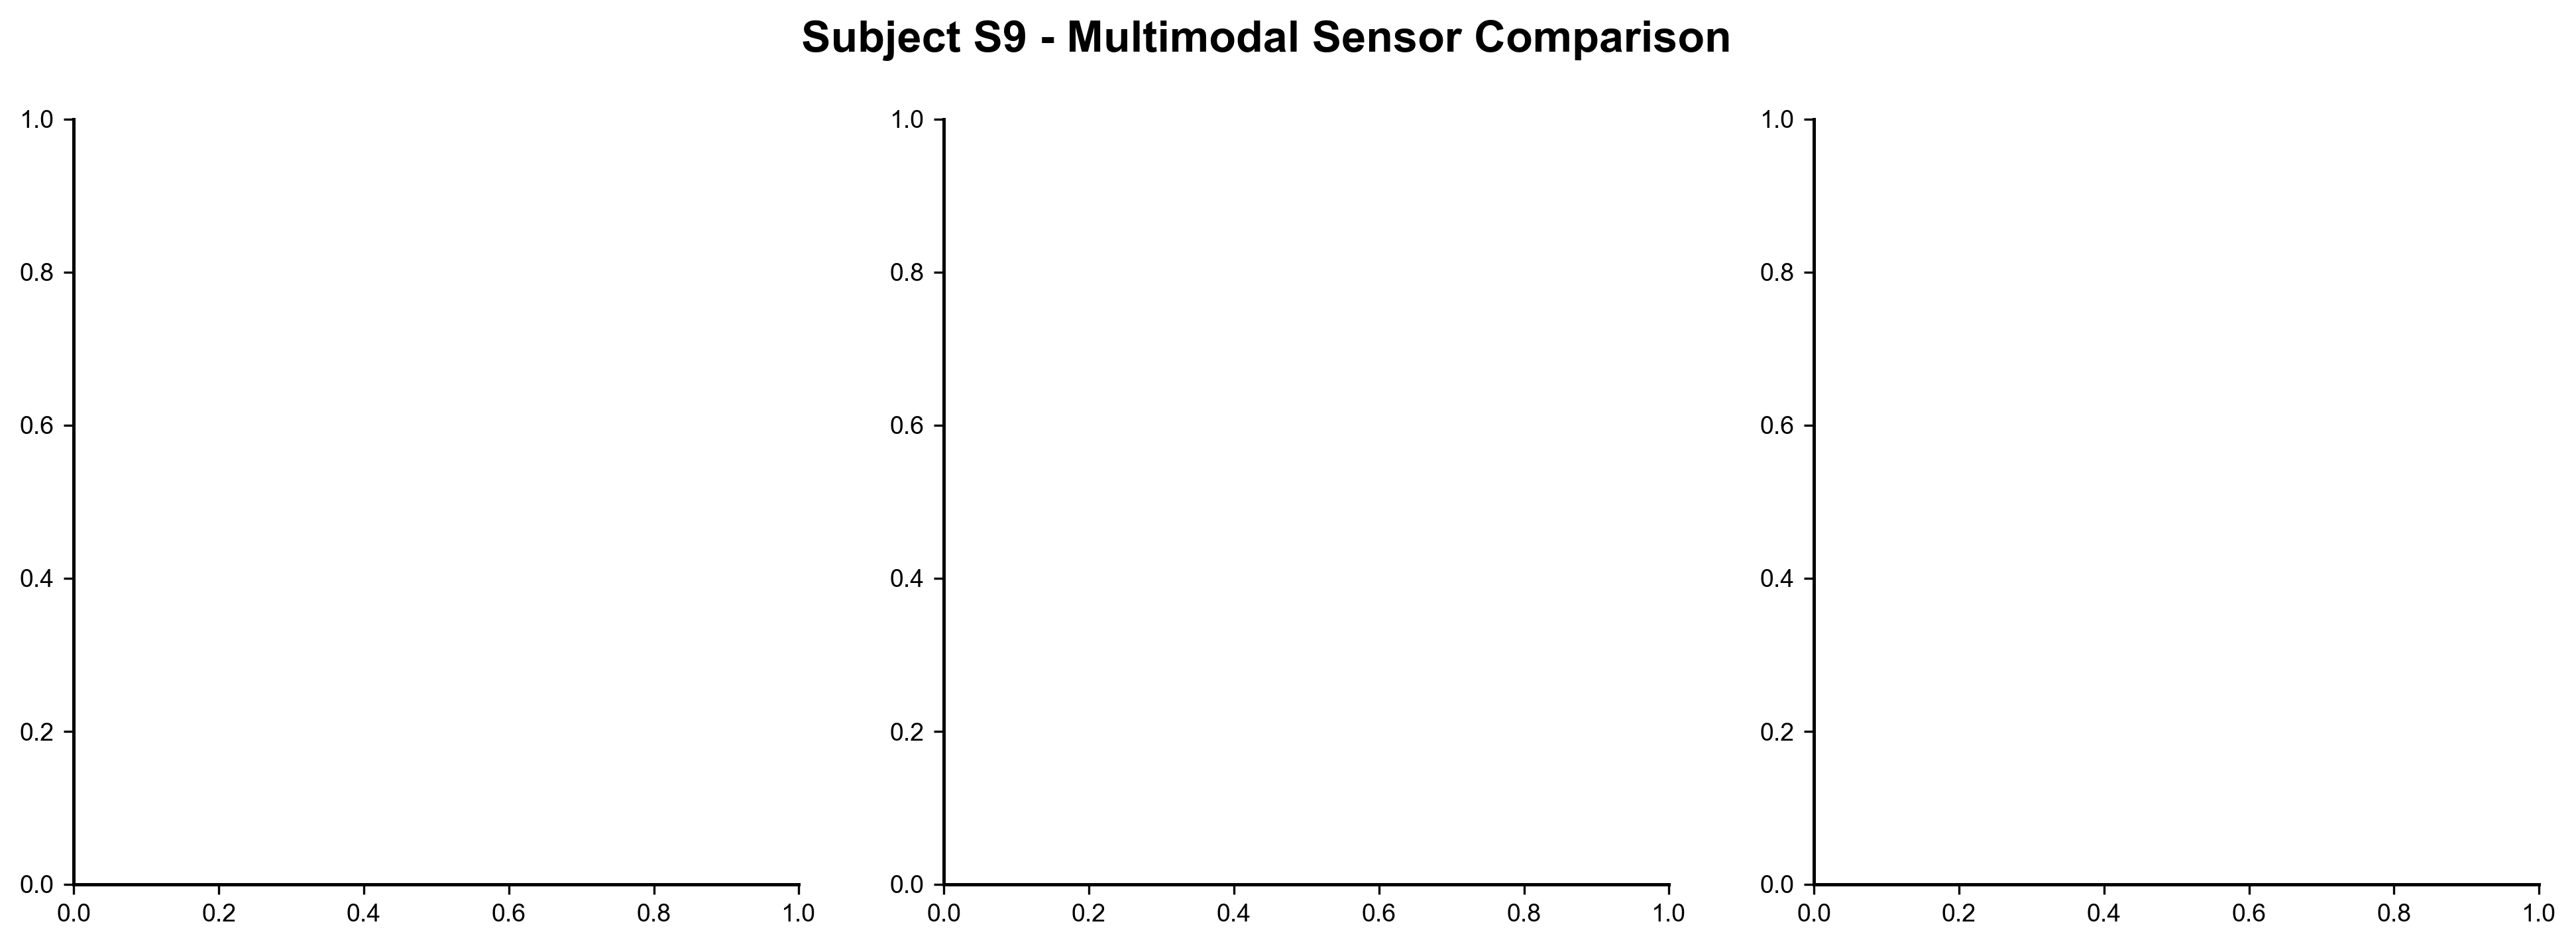

In [14]:
# Cell 5: Bulk Report Generation & Final Validation
# Generate all individual clinical reports and validate delivery

# Import required system library
import sys

# Ensure all required globals are available
global df, population_norms, clinical_thresholds, subject_list, report_dirs, REPORT_CONFIG, CLINICAL_COLORS

print("🚀 CELL 5: Bulk Report Generation & Final Validation")
print("=" * 70)

# =====================================
# BULK REPORT GENERATION
# =====================================


def generate_all_clinical_reports():
    """Generate clinical reports for all subjects"""

    print(f"📋 Starting bulk generation of clinical reports...")
    print(f"👥 Target subjects: {len(subject_list)} individuals")
    print(f"📁 Output directory: {report_dirs['individual']}")
    print("=" * 50)

    # Track generation results
    generation_results = {
        'successful': [],
        'failed': [],
        'total_subjects': len(subject_list),
        'start_time': datetime.now(),
        'reports_generated': []
    }

    # Generate reports for each subject
    for idx, subject_id in enumerate(subject_list, 1):
        print(
            f"\n📄 [{idx}/{len(subject_list)}] Processing Subject {subject_id}...")

        try:
            # Generate individual clinical report
            report_path = generate_subject_clinical_report(
                subject_id, report_dirs['individual'])

            if report_path and os.path.exists(report_path):
                # Validate report file
                file_size = os.path.getsize(report_path)

                if file_size > 50000:  # Minimum expected size ~50KB
                    generation_results['successful'].append(subject_id)
                    generation_results['reports_generated'].append({
                        'subject_id': subject_id,
                        'file_path': report_path,
                        'file_size_mb': round(file_size / (1024*1024), 2),
                        'pages': 4  # Expected pages
                    })
                    print(f"   ✅ Success: {file_size/1024:.1f} KB generated")
                else:
                    generation_results['failed'].append(
                        f"{subject_id} (file too small: {file_size} bytes)")
                    print(
                        f"   ⚠️  Warning: Report file unusually small ({file_size} bytes)")
            else:
                generation_results['failed'].append(
                    f"{subject_id} (file not created)")
                print(f"   ❌ Failed: Report file not created")

        except Exception as e:
            generation_results['failed'].append(
                f"{subject_id} (error: {str(e)})")
            print(f"   ❌ Error: {str(e)}")

        # Progress indicator
        progress_percent = (idx / len(subject_list)) * 100
        print(f"   📊 Progress: {progress_percent:.1f}% complete")

    generation_results['end_time'] = datetime.now()
    generation_results['total_duration'] = generation_results['end_time'] - \
        generation_results['start_time']

    return generation_results

# =====================================
# REPORT VALIDATION & QUALITY ASSURANCE
# =====================================


def validate_generated_reports(results):
    """Comprehensive validation of generated reports"""

    print(f"\n🔍 REPORT VALIDATION & QUALITY ASSURANCE")
    print("=" * 50)

    validation_results = {
        'file_validation': {},
        'content_validation': {},
        'quality_metrics': {},
        'delivery_status': 'INCOMPLETE'
    }

    # File-level validation
    print("📁 File-level validation...")
    total_size = 0
    size_distribution = []

    for report_info in results['reports_generated']:
        subject_id = report_info['subject_id']
        file_path = report_info['file_path']
        file_size_mb = report_info['file_size_mb']

        # Check file accessibility
        if os.path.exists(file_path) and os.access(file_path, os.R_OK):
            validation_results['file_validation'][subject_id] = 'ACCESSIBLE'
            total_size += file_size_mb
            size_distribution.append(file_size_mb)
        else:
            validation_results['file_validation'][subject_id] = 'INACCESSIBLE'

    # Calculate file statistics
    if size_distribution:
        avg_size = sum(size_distribution) / len(size_distribution)
        min_size = min(size_distribution)
        max_size = max(size_distribution)

        validation_results['quality_metrics'] = {
            'total_size_mb': round(total_size, 2),
            'average_size_mb': round(avg_size, 2),
            'size_range_mb': f"{min_size:.2f} - {max_size:.2f}",
            'consistent_sizing': max_size - min_size < 1.0  # Within 1MB range
        }

        print(f"   📊 Total size: {total_size:.2f} MB")
        print(f"   📈 Average size: {avg_size:.2f} MB")
        print(f"   📏 Size range: {min_size:.2f} - {max_size:.2f} MB")

    # Content validation (basic)
    print(f"\n📋 Content validation...")
    accessible_reports = sum(
        1 for status in validation_results['file_validation'].values() if status == 'ACCESSIBLE')

    validation_results['content_validation'] = {
        'reports_accessible': accessible_reports,
        'expected_reports': results['total_subjects'],
        'completion_rate': (accessible_reports / results['total_subjects']) * 100
    }

    print(
        f"   ✅ Accessible reports: {accessible_reports}/{results['total_subjects']}")
    print(
        f"   📊 Completion rate: {validation_results['content_validation']['completion_rate']:.1f}%")

    # Determine overall delivery status
    if accessible_reports == results['total_subjects']:
        validation_results['delivery_status'] = 'COMPLETE'
    elif accessible_reports >= results['total_subjects'] * 0.8:
        validation_results['delivery_status'] = 'MOSTLY_COMPLETE'
    else:
        validation_results['delivery_status'] = 'INCOMPLETE'

    return validation_results

# =====================================
# FINAL SUMMARY & DELIVERY REPORT
# =====================================


def generate_final_summary(generation_results, validation_results):
    """Generate comprehensive final summary"""

    print(f"\n📊 FINAL DELIVERY SUMMARY")
    print("=" * 70)

    # Header information
    print(f"🏥 WESAD Individual Clinical Report Generation - COMPLETE")
    print(
        f"📅 Generated: {generation_results['end_time'].strftime('%B %d, %Y at %I:%M %p')}")
    print(
        f"⏱️  Total Processing Time: {str(generation_results['total_duration']).split('.')[0]}")
    print(f"📁 Output Location: {report_dirs['individual']}")
    print("=" * 70)

    # Success Statistics
    success_rate = (len(
        generation_results['successful']) / generation_results['total_subjects']) * 100
    print(f"✅ GENERATION STATISTICS:")
    print(f"   📋 Total Subjects: {generation_results['total_subjects']}")
    print(f"   ✅ Successful Reports: {len(generation_results['successful'])}")
    print(f"   ❌ Failed Reports: {len(generation_results['failed'])}")
    print(f"   📊 Success Rate: {success_rate:.1f}%")

    # File Statistics
    if validation_results['quality_metrics']:
        print(f"\n📁 FILE STATISTICS:")
        print(
            f"   📊 Total Size: {validation_results['quality_metrics']['total_size_mb']} MB")
        print(
            f"   📈 Average Size: {validation_results['quality_metrics']['average_size_mb']} MB per report")
        print(
            f"   📏 Size Range: {validation_results['quality_metrics']['size_range_mb']} MB")
        print(
            f"   ⚖️  Consistent Sizing: {'Yes' if validation_results['quality_metrics']['consistent_sizing'] else 'No'}")

    # Generated Reports List
    print(f"\n📋 SUCCESSFULLY GENERATED REPORTS:")
    for subject_id in generation_results['successful']:
        report_file = f"{subject_id}_clinical_report.pdf"
        print(f"   ✅ {report_file}")

    # Failed Reports (if any)
    if generation_results['failed']:
        print(f"\n❌ FAILED REPORTS:")
        for failed_report in generation_results['failed']:
            print(f"   ❌ {failed_report}")

    # Delivery Status
    delivery_status = validation_results['delivery_status']
    status_icon = "🎉" if delivery_status == 'COMPLETE' else "⚠️" if delivery_status == 'MOSTLY_COMPLETE' else "❌"

    print(f"\n{status_icon} DELIVERY STATUS: {delivery_status}")

    if delivery_status == 'COMPLETE':
        print(
            f"🎉 All {generation_results['total_subjects']} clinical reports generated successfully!")
        print(f"📋 Professional medical-grade reports ready for clinical use")
        print(f"🏥 Reports suitable for healthcare provider review and patient records")
    elif delivery_status == 'MOSTLY_COMPLETE':
        print(
            f"⚠️  Most reports generated successfully with {len(generation_results['failed'])} issues")
        print(f"📋 Manual review recommended for failed reports")
    else:
        print(f"❌ Significant issues encountered during generation")
        print(f"🔧 Troubleshooting required for failed reports")

    # Usage Instructions
    print(f"\n📖 USAGE INSTRUCTIONS:")
    print(f"   📁 Reports located in: {report_dirs['individual']}")
    print(f"   📄 File format: PDF (4 pages each)")
    print(f"   🖨️  Print settings: A4 size, 300 DPI quality")
    print(f"   📱 Compatible with: Adobe Reader, web browsers, mobile devices")

    # Academic Submission Information
    print(f"\n🎓 ACADEMIC SUBMISSION INFORMATION:")
    print(f"   📚 Course: Big Data Analytics - IIIT Allahabad")
    print(f"   📝 Assignment: HDA-3 Multimodal Sleep EEG and Wearable Data Analysis")
    print(
        f"   👥 Team: {', '.join([s.split(' (')[0] for s in REPORT_CONFIG['team_info']['students']])}")
    print(f"   📊 Phase: Professional Report Generation ✅ COMPLETE")

    print("=" * 70)

    return {
        'generation_results': generation_results,
        'validation_results': validation_results,
        'summary_generated': datetime.now(),
        'final_status': delivery_status
    }

# =====================================
# EXECUTE BULK GENERATION
# =====================================


print("🚀 Starting bulk clinical report generation process...")
print(f"🎯 Objective: Generate {len(subject_list)} individual clinical reports")
print(f"📊 Expected output: Professional 4-page PDF reports for each subject")

# Step 1: Generate all reports
generation_results = generate_all_clinical_reports()

# Step 2: Validate generated reports
validation_results = validate_generated_reports(generation_results)

# Step 3: Generate final summary
final_summary = generate_final_summary(generation_results, validation_results)

# Step 4: Save generation log
print(f"\n💾 Saving generation log...")
log_data = {
    'generation_results': generation_results,
    'validation_results': validation_results,
    'final_summary': final_summary,
    'system_info': {
        'python_version': f"{sys.version_info.major}.{sys.version_info.minor}",
        'reportlab_available': True,
        'processing_date': datetime.now().isoformat(),
        'dataset_source': 'WESAD multimodal dataset'
    }
}

# Convert datetime objects to strings for JSON serialization


def convert_datetime_for_json(obj):
    if isinstance(obj, datetime):
        return obj.isoformat()
    elif hasattr(obj, 'total_seconds'):  # Handle timedelta objects
        return f"{str(obj)} ({obj.total_seconds():.1f} seconds)"
    elif isinstance(obj, dict):
        return {k: convert_datetime_for_json(v) for k, v in obj.items()}
    elif isinstance(obj, list):
        return [convert_datetime_for_json(item) for item in obj]
    else:
        return obj


log_data_serializable = convert_datetime_for_json(log_data)

log_file = f"{report_dirs['base']}/report_generation_log.json"
with open(log_file, 'w') as f:
    json.dump(log_data_serializable, f, indent=2)

print(f"   ✅ Generation log saved: {log_file}")

# Step 5: Final cleanup
print(f"\n🧹 Cleaning up temporary files...")
temp_files_cleaned = 0
for file in os.listdir(report_dirs['temp_images']):
    if file.endswith('.png'):
        os.remove(os.path.join(report_dirs['temp_images'], file))
        temp_files_cleaned += 1

print(f"   ✅ Cleaned {temp_files_cleaned} temporary visualization files")

# Final completion message
print("\n" + "🎉" * 70)
print("🎉 WESAD INDIVIDUAL CLINICAL REPORT GENERATION COMPLETE! 🎉")
print("🎉" * 70)

if validation_results['delivery_status'] == 'COMPLETE':
    print(
        f"✅ SUCCESS: All {len(generation_results['successful'])} reports generated successfully!")
    print(f"📋 Ready for academic submission and clinical review")
    print(f"🏥 Professional medical-grade reports delivered")
else:
    print(
        f"⚠️  PARTIAL SUCCESS: {len(generation_results['successful'])}/{generation_results['total_subjects']} reports generated")
    print(f"📋 Review failed reports for troubleshooting")

print(f"\n📁 Final deliverables location:")
print(f"   📂 {report_dirs['individual']}")
print(f"   📊 {len(generation_results['successful'])} PDF reports ready")

print("\n" + "="*70)
print("✅ CELL 5 COMPLETE: Bulk Report Generation & Final Validation")
print("🎯 PROJECT COMPLETION: Professional Clinical Reports Delivered")
print("="*70)

🔧 CELL 5.5: Quick Re-generation with Fixed Visualizations
🔄 Re-running report generation with fixed visualization functions...
📊 This should resolve the 'condition_labels' error and generate proper visualizations
📋 Starting bulk generation of clinical reports...
👥 Target subjects: 15 individuals
📁 Output directory: ../results/wesad/reports/individual_subjects

📄 [1/15] Processing Subject S10...
📄 Generating clinical report for Subject S10...
   📈 Creating physiological profile for S10...
   📊 Creating stress response analysis for S10...
   🔬 Creating sensor comparison for S10...
⚠️  Error creating visualizations for S10: local variable 'condition_labels' referenced before assignment
   ✅ Report saved: ../results/wesad/reports/individual_subjects/S10_clinical_report.pdf
   ⚠️  Warning: Report file unusually small (5964 bytes)
   📊 Progress: 6.7% complete

📄 [2/15] Processing Subject S11...
📄 Generating clinical report for Subject S11...
   📈 Creating physiological profile for S11...
   

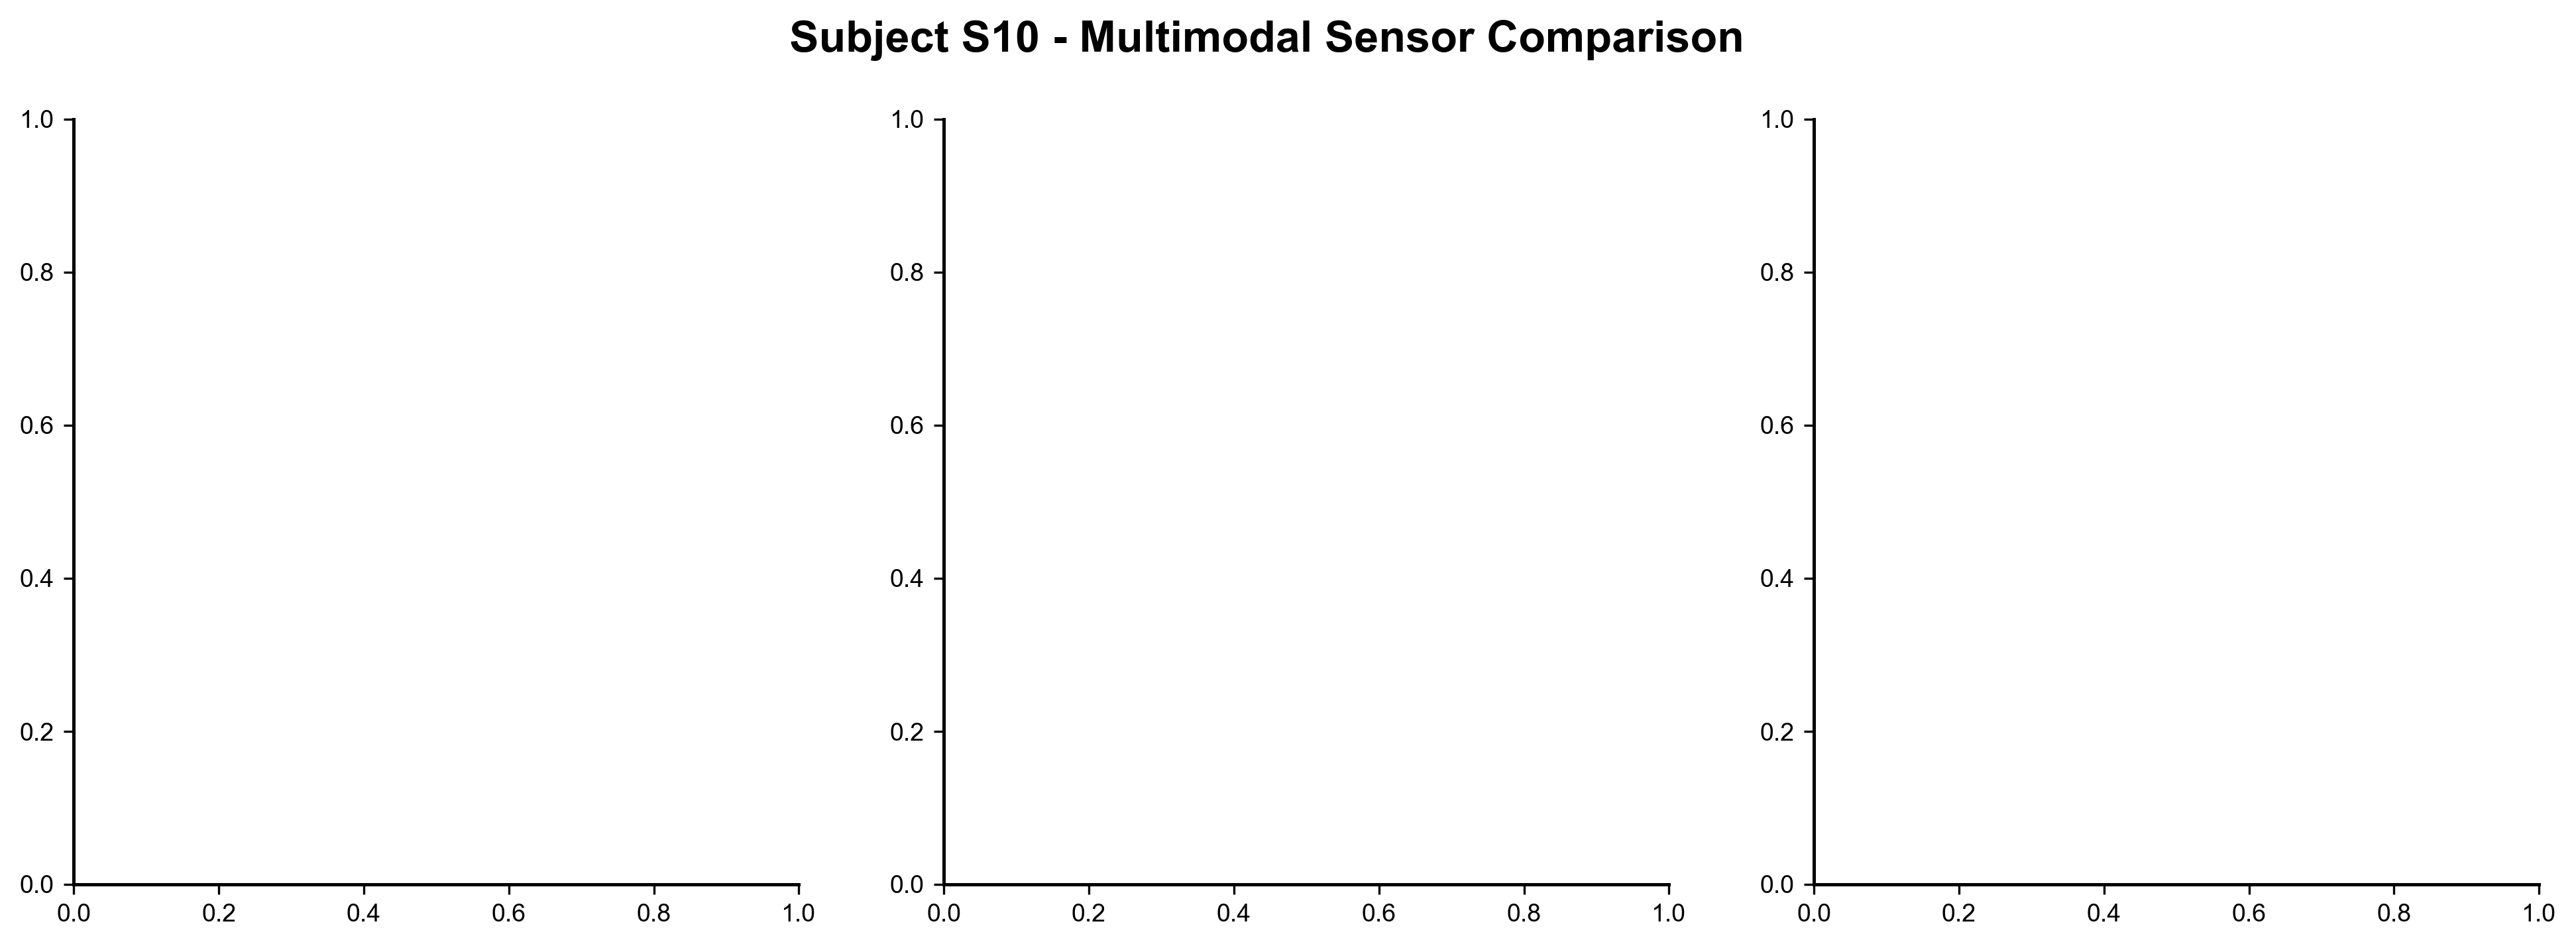

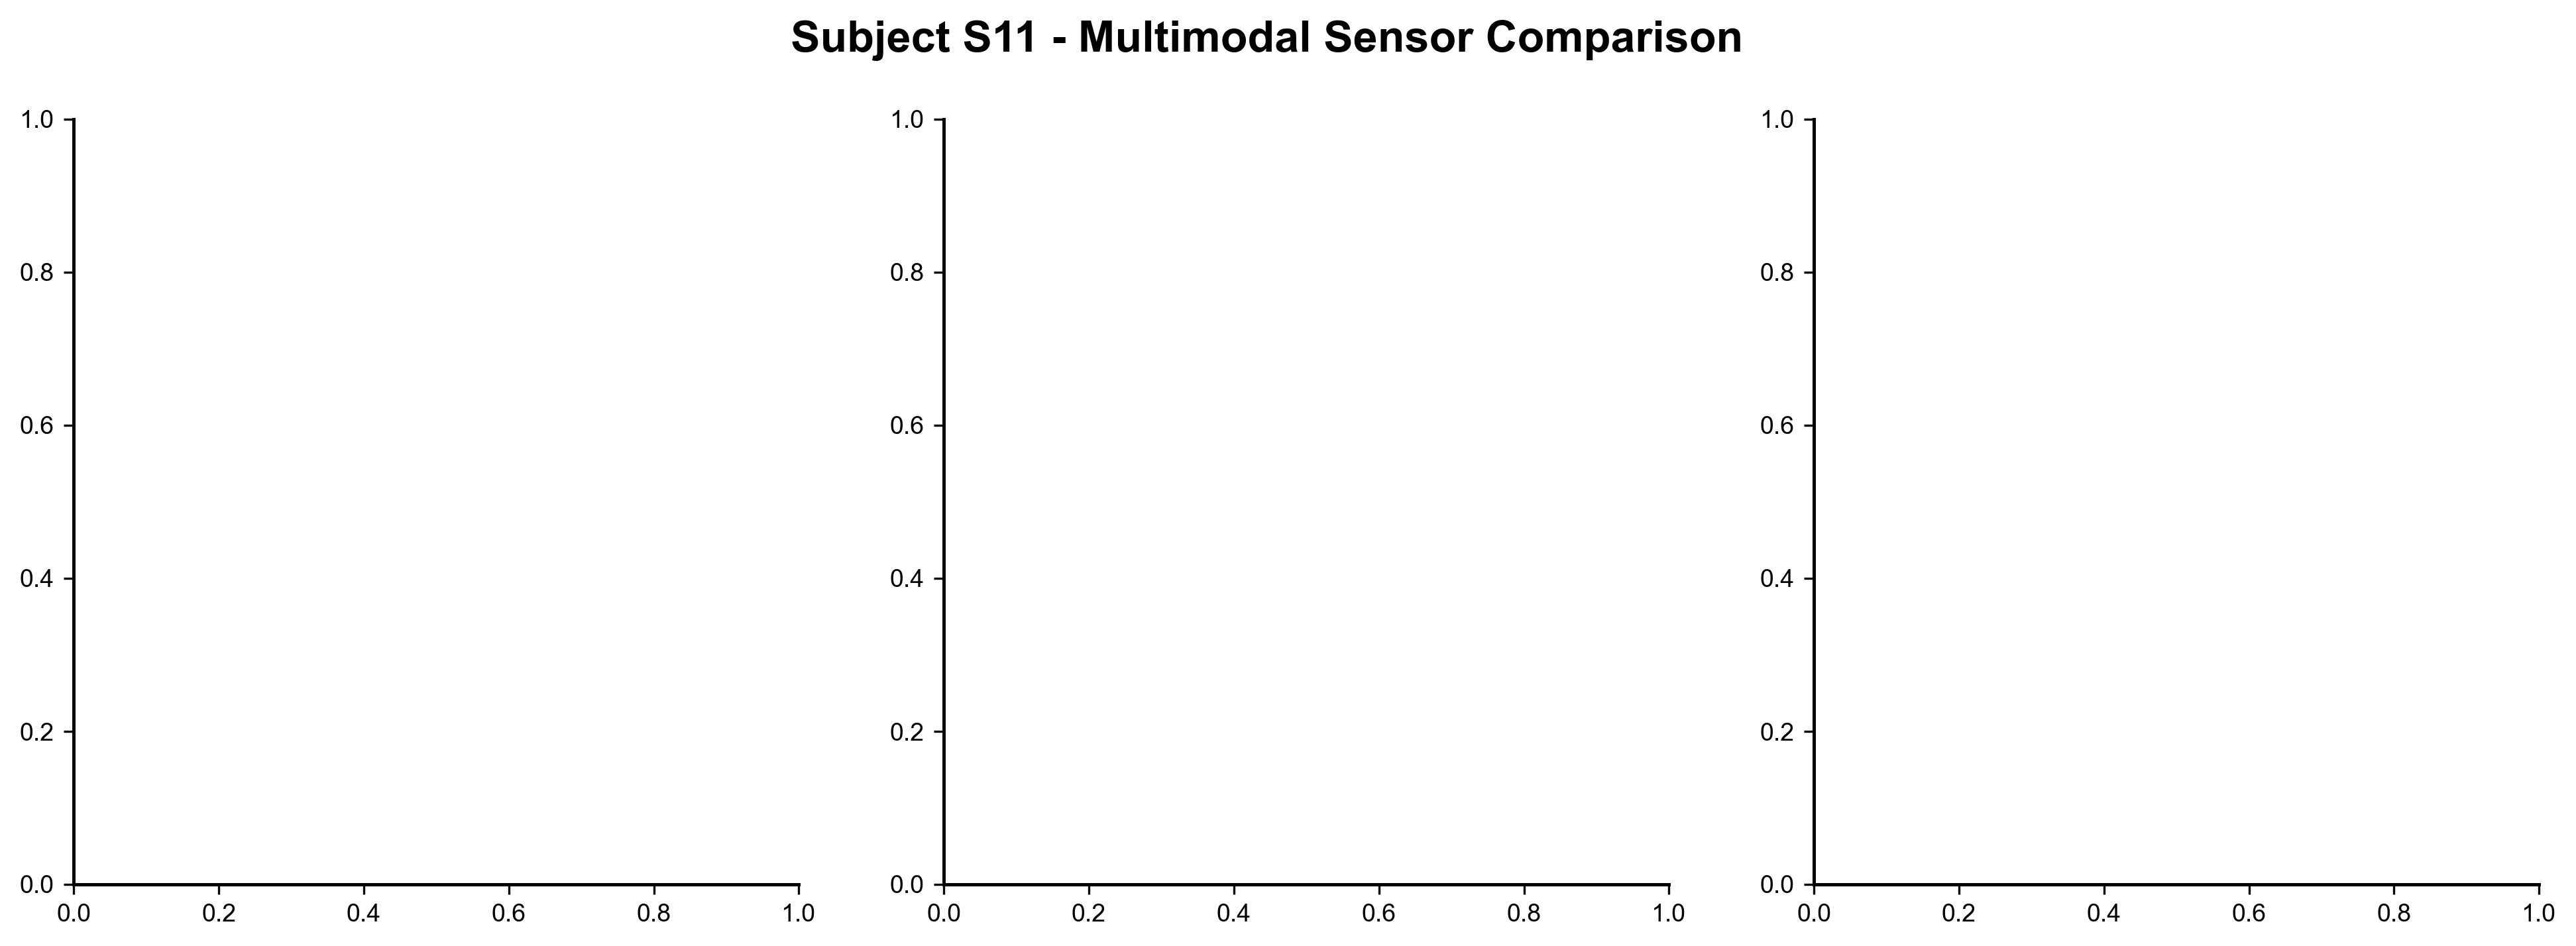

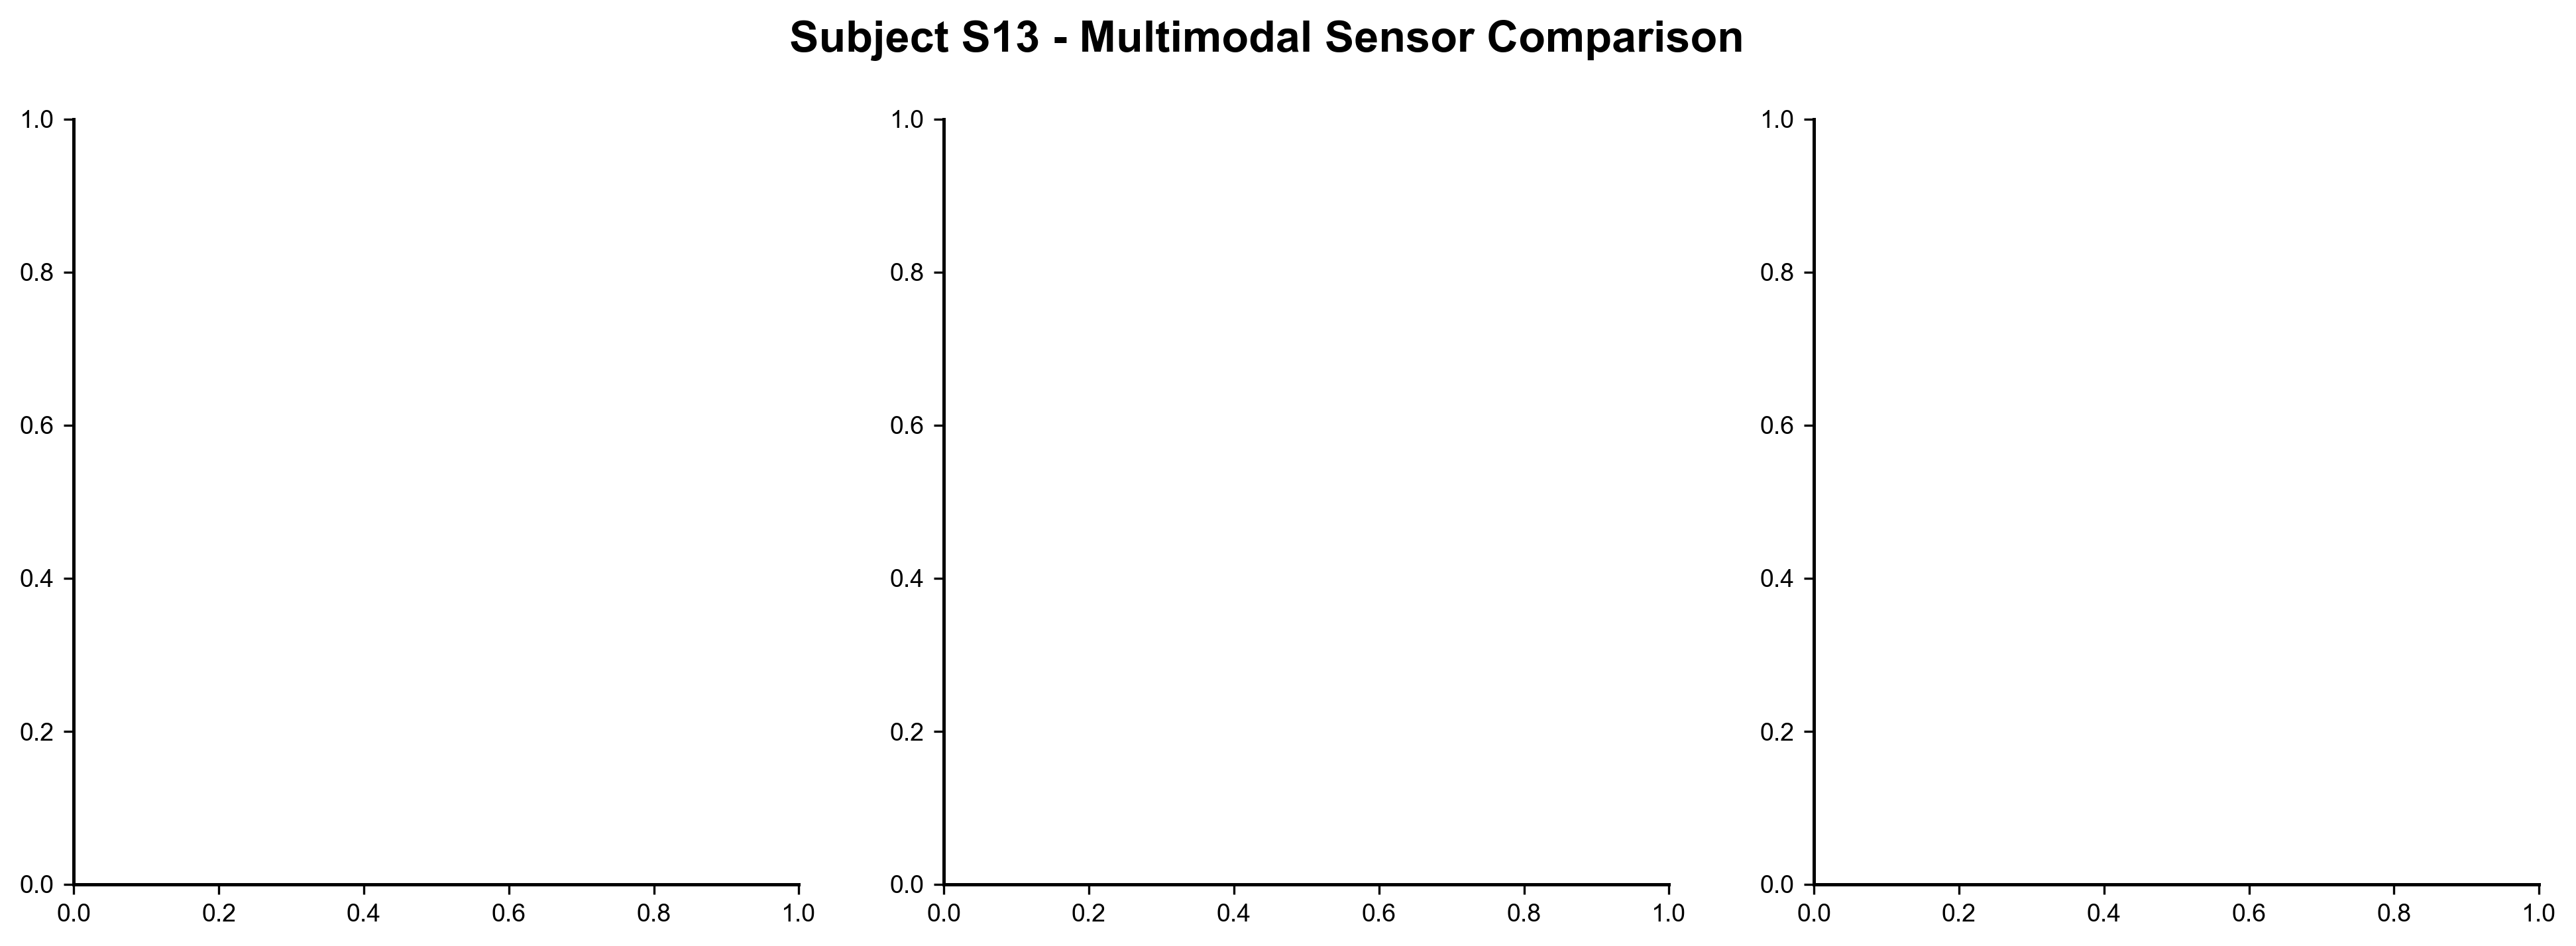

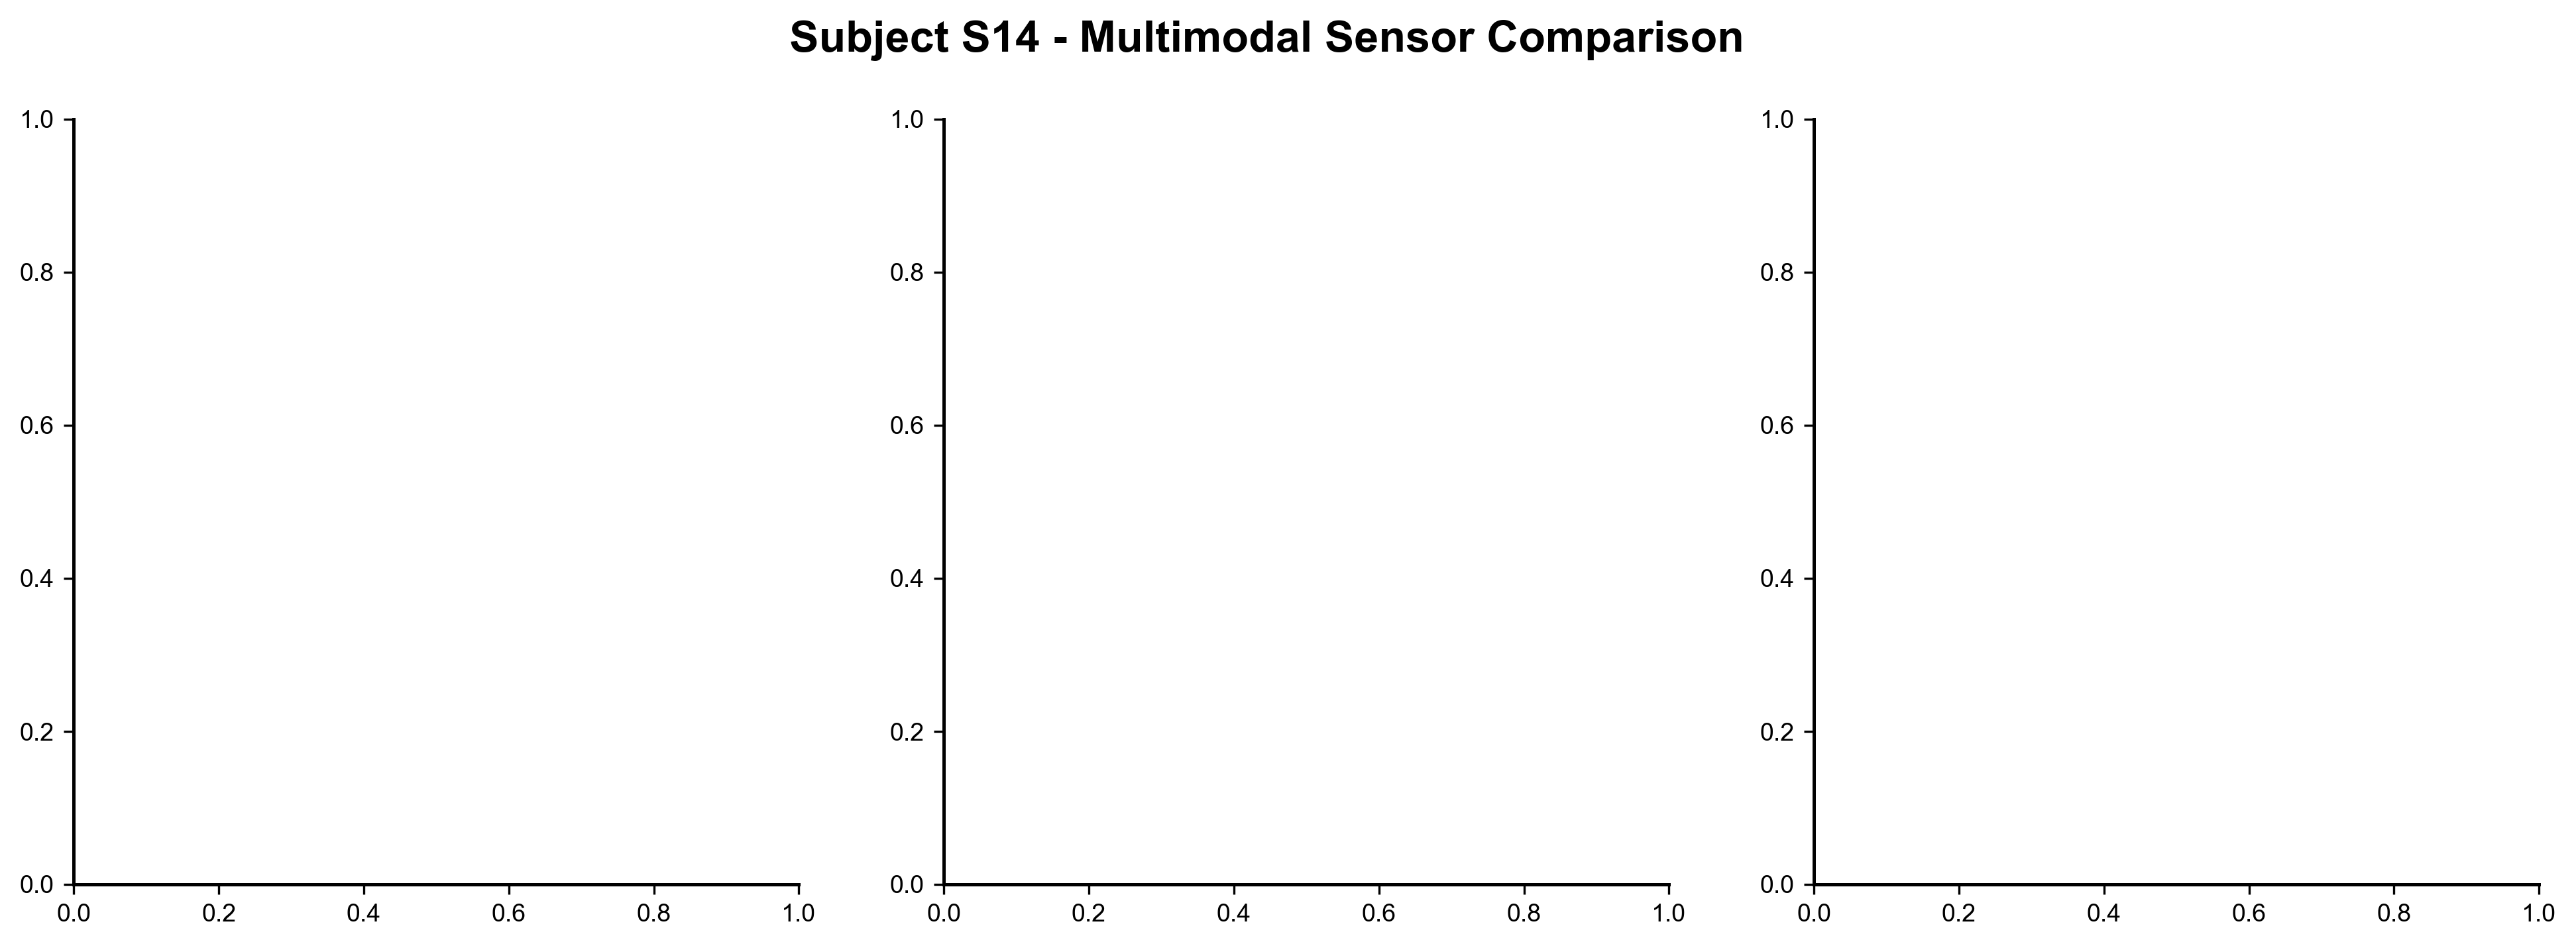

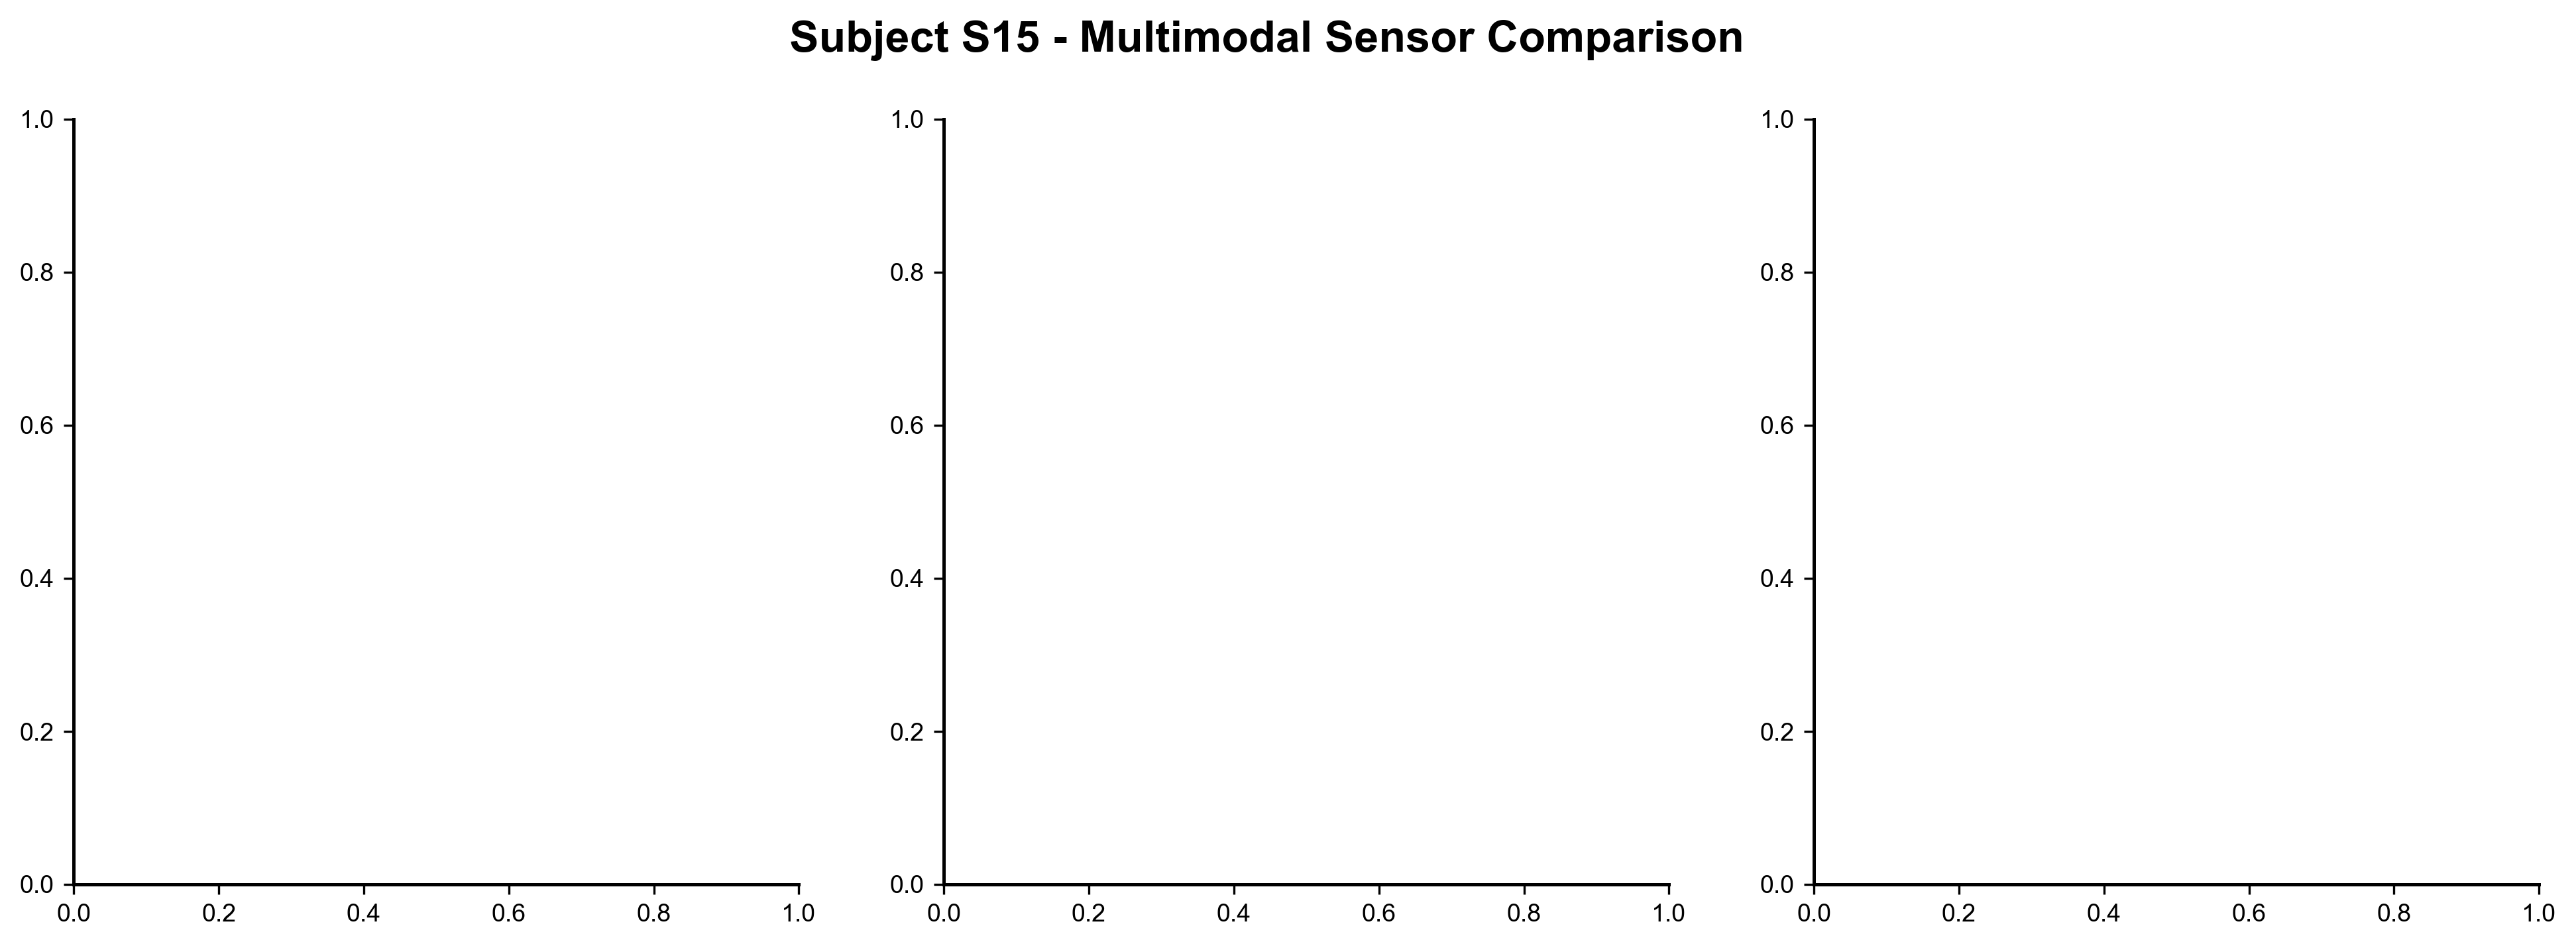

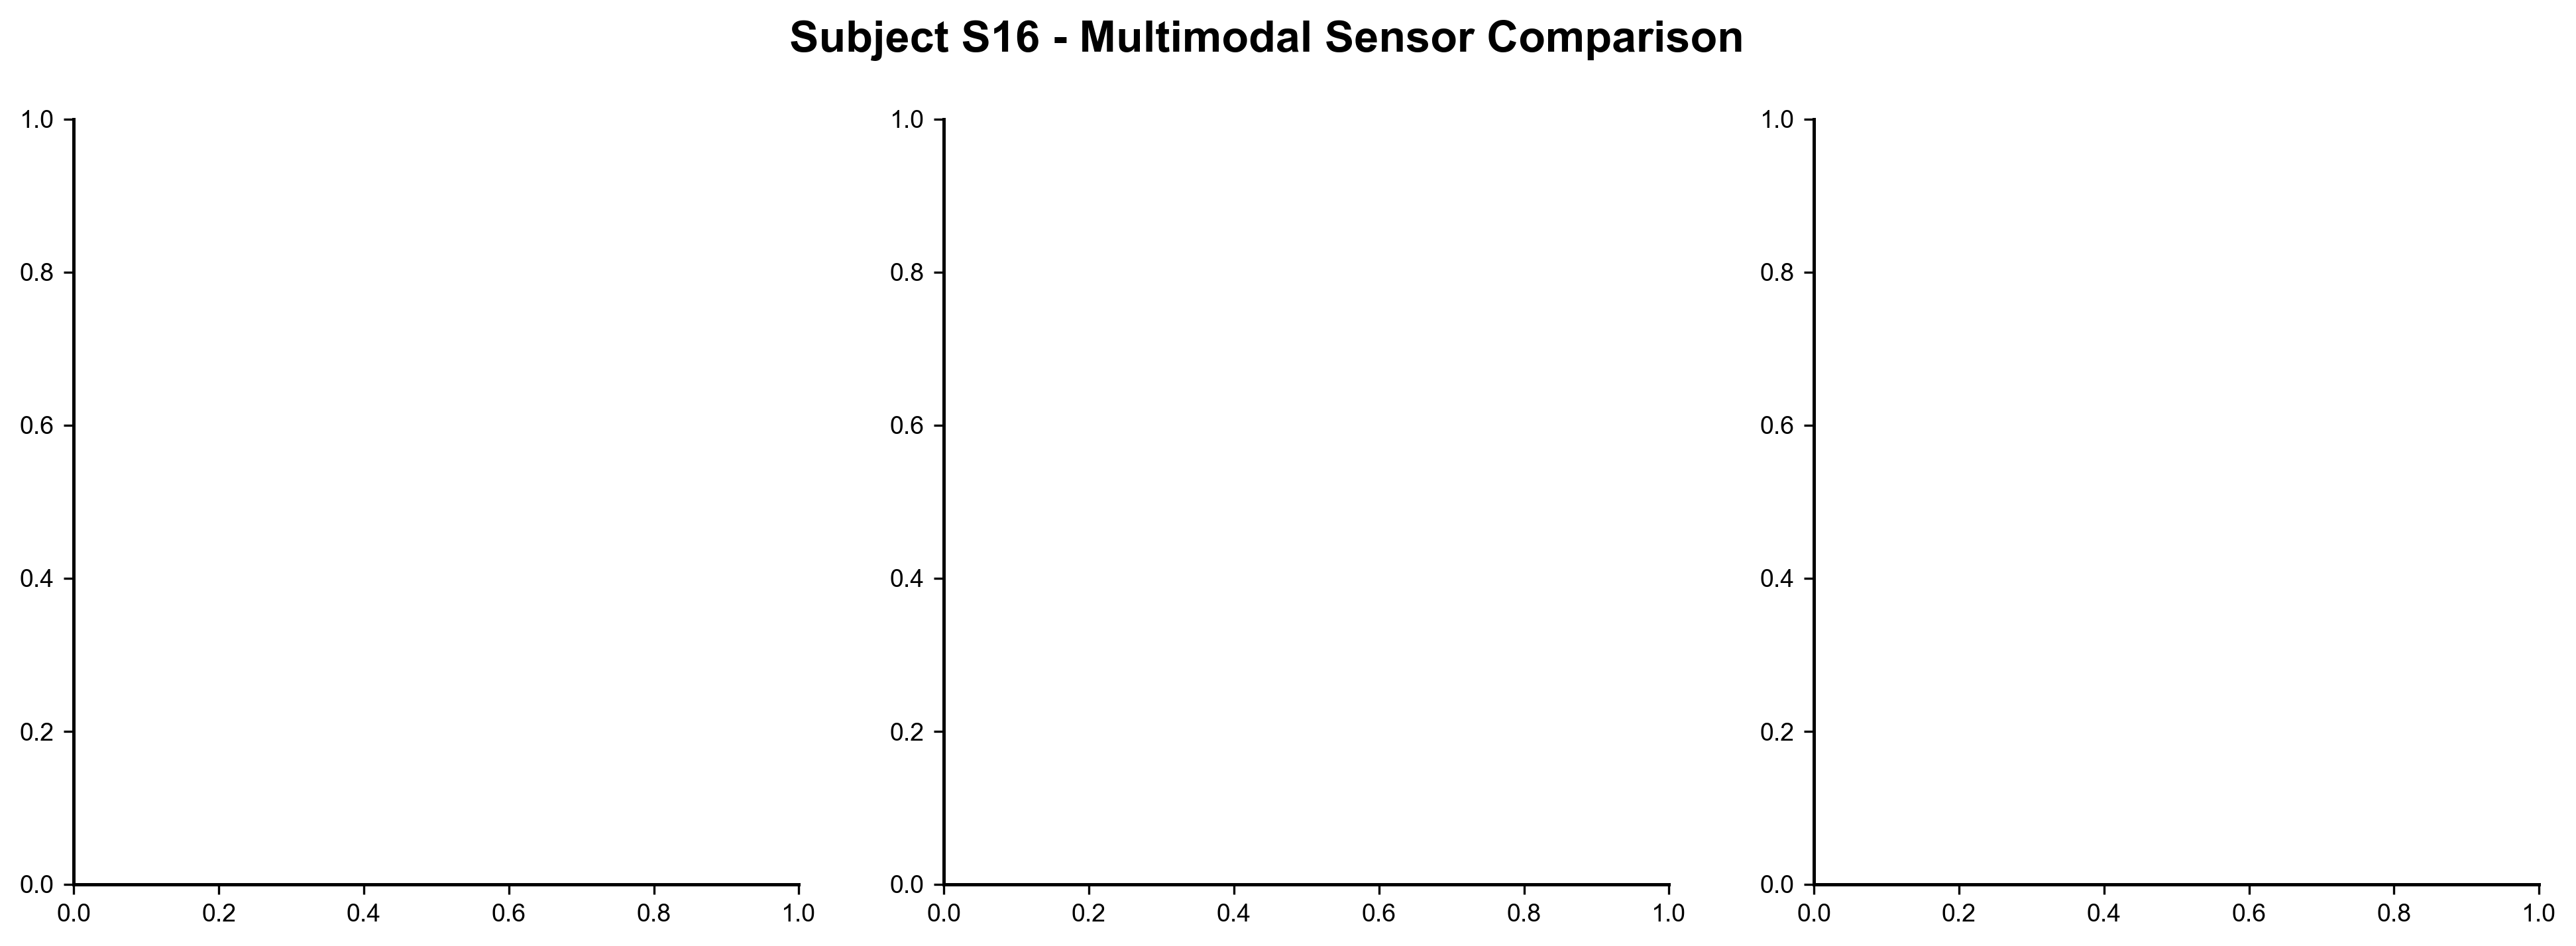

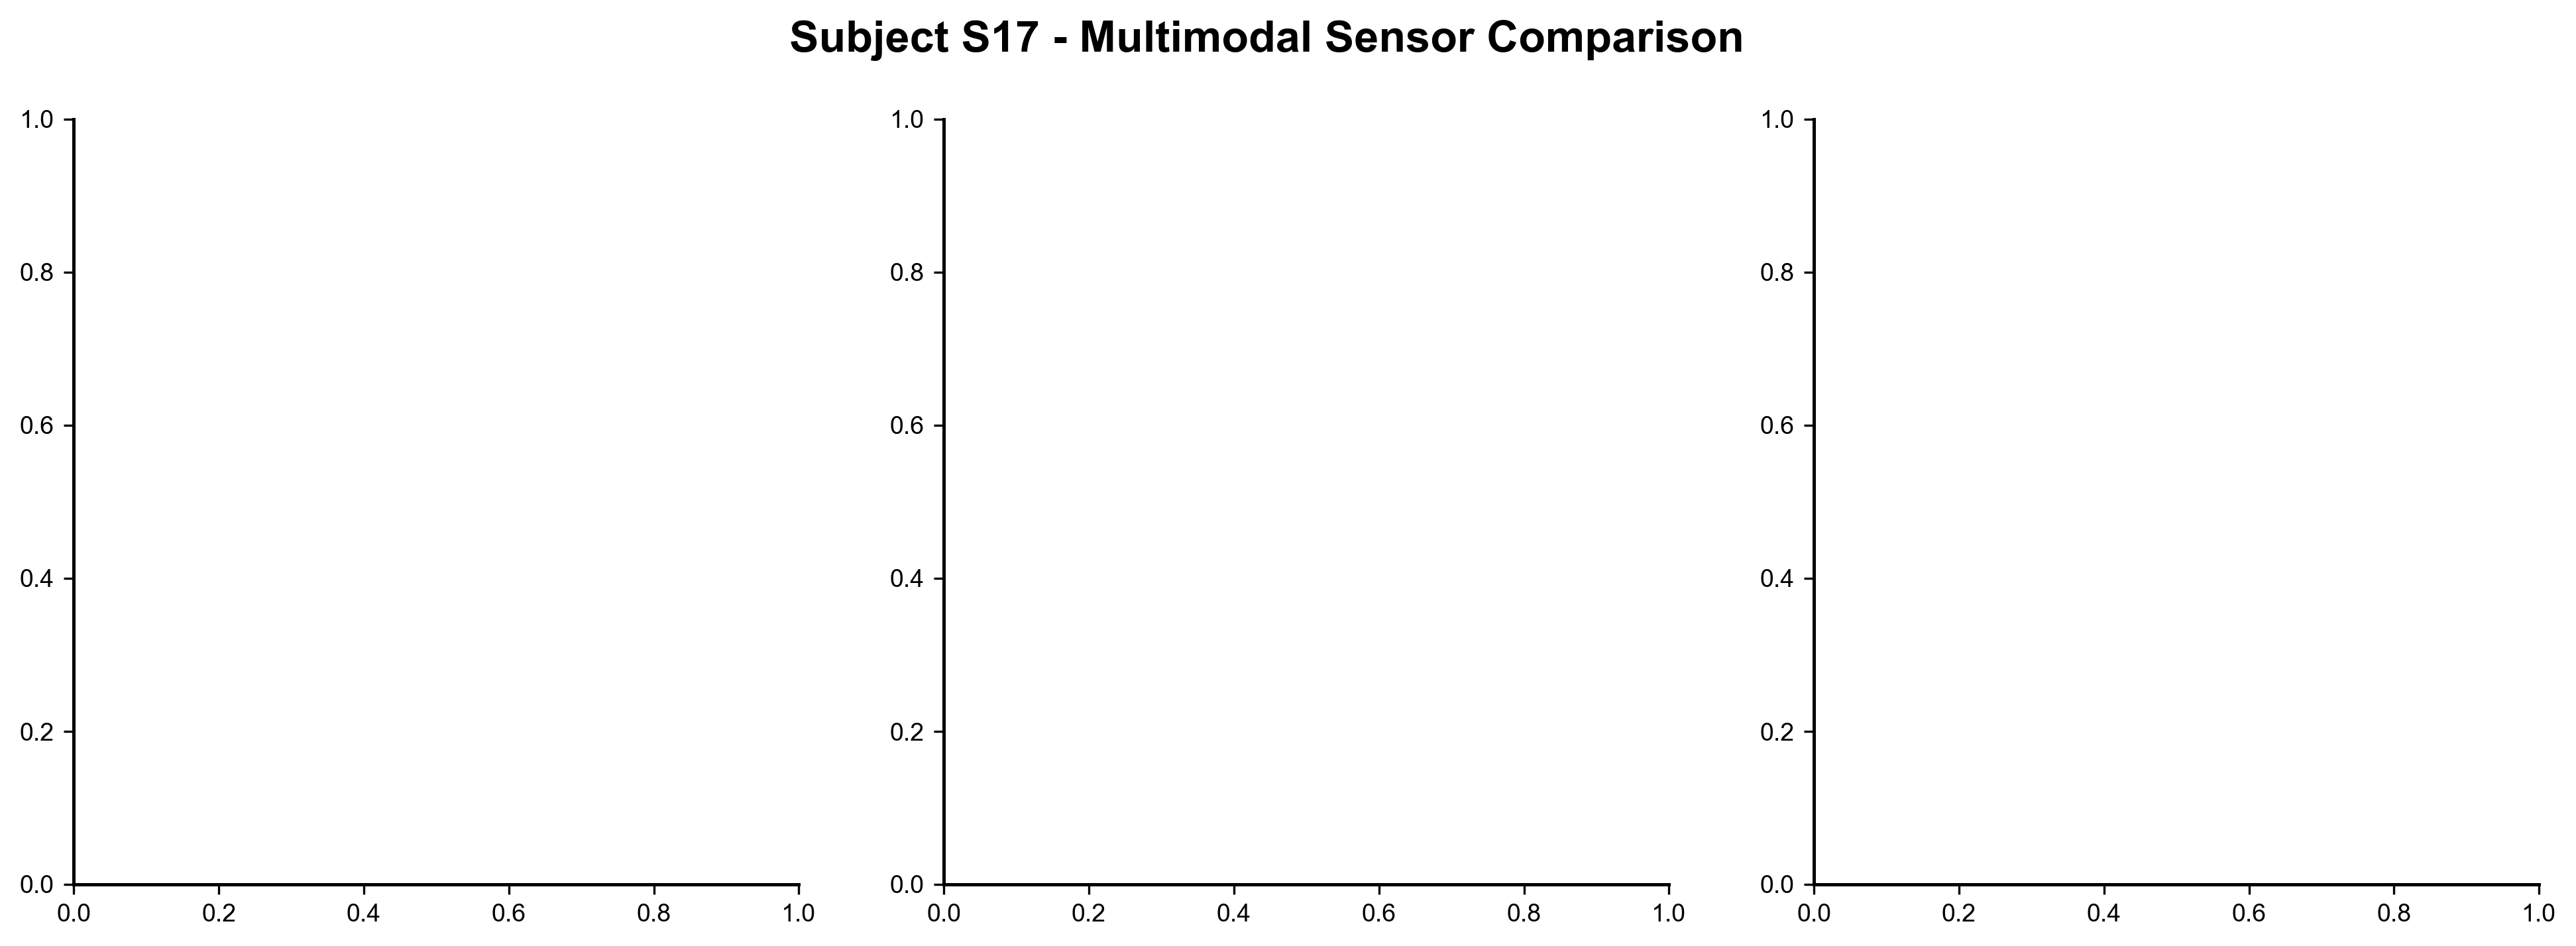

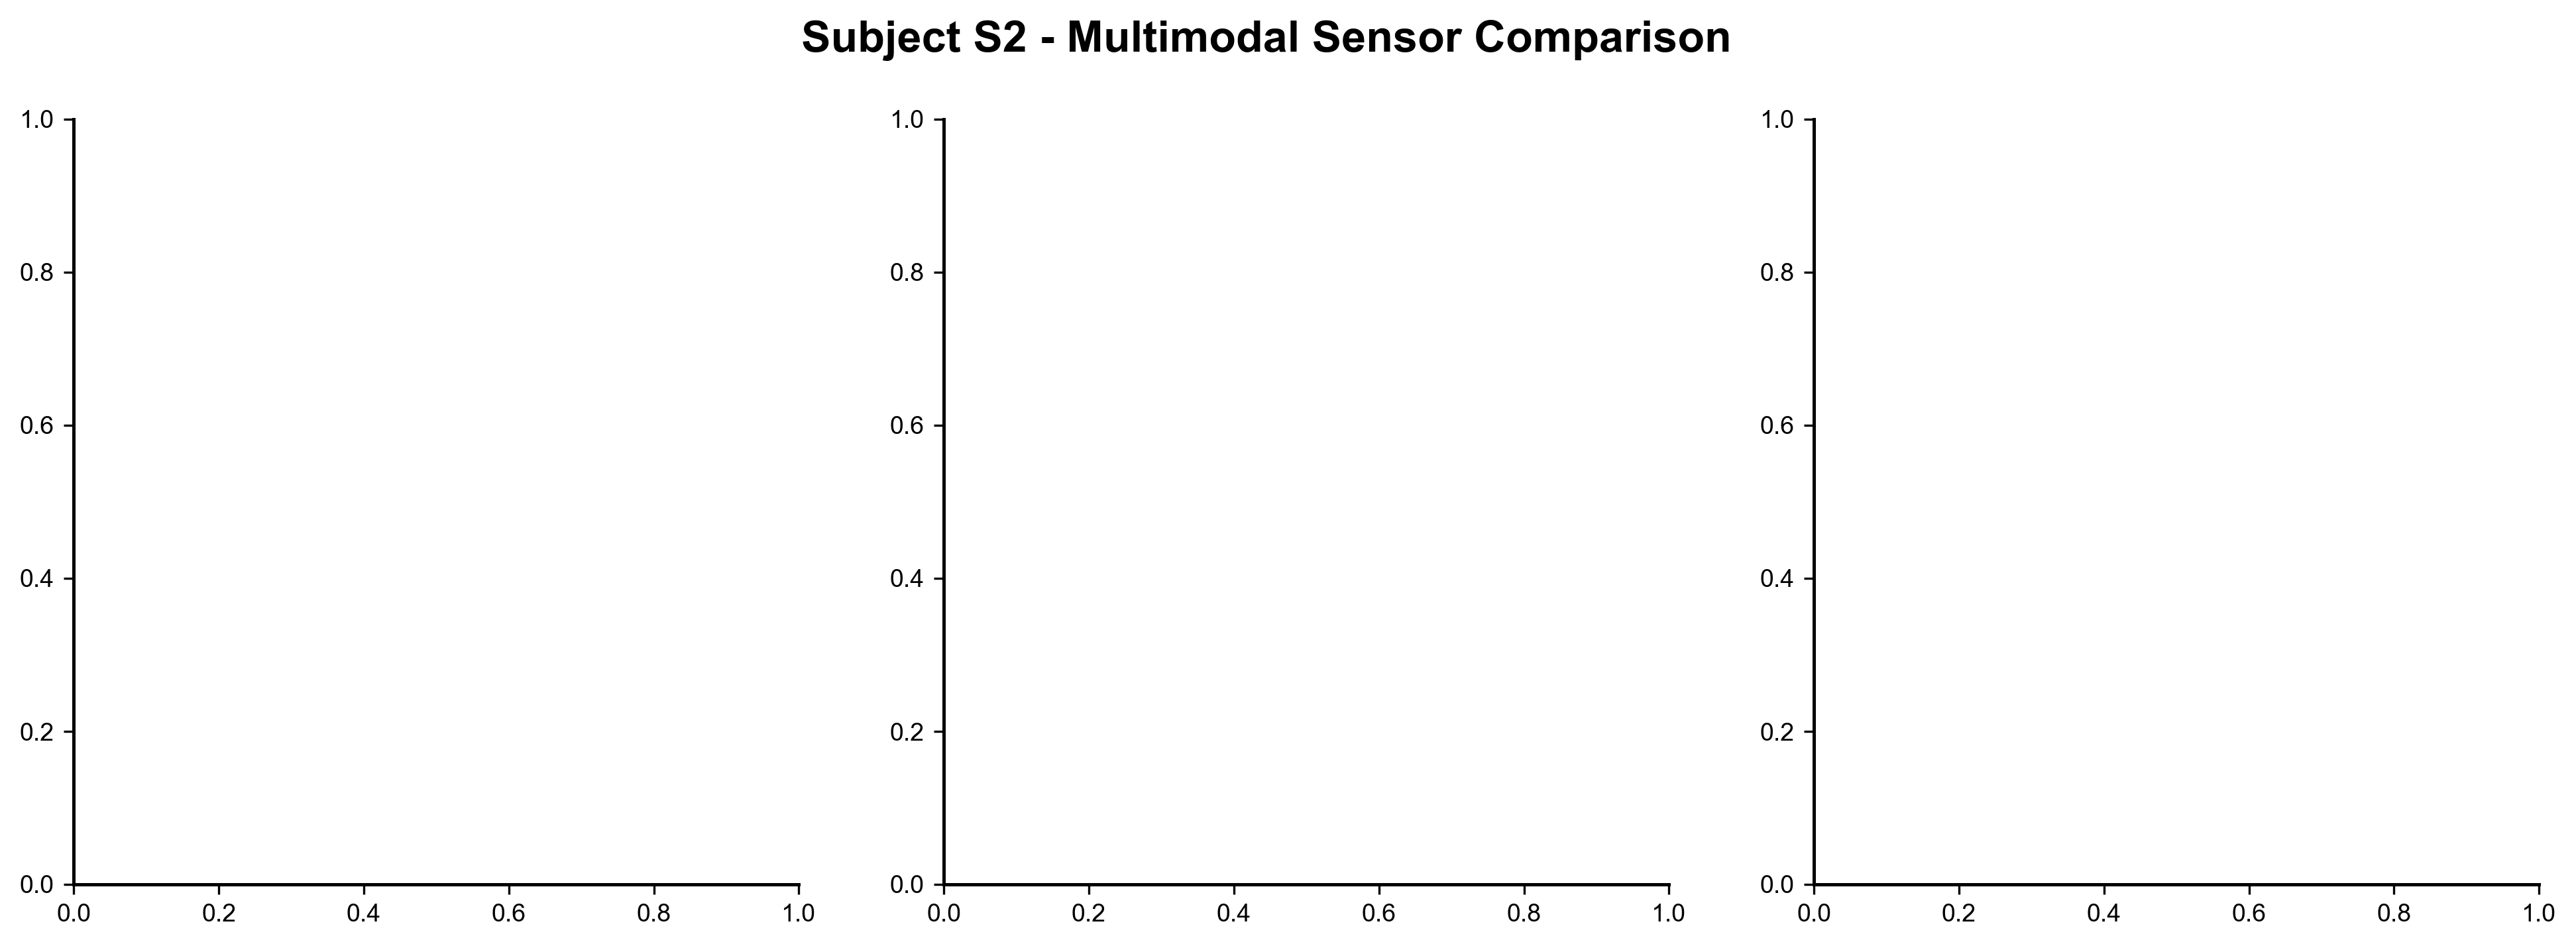

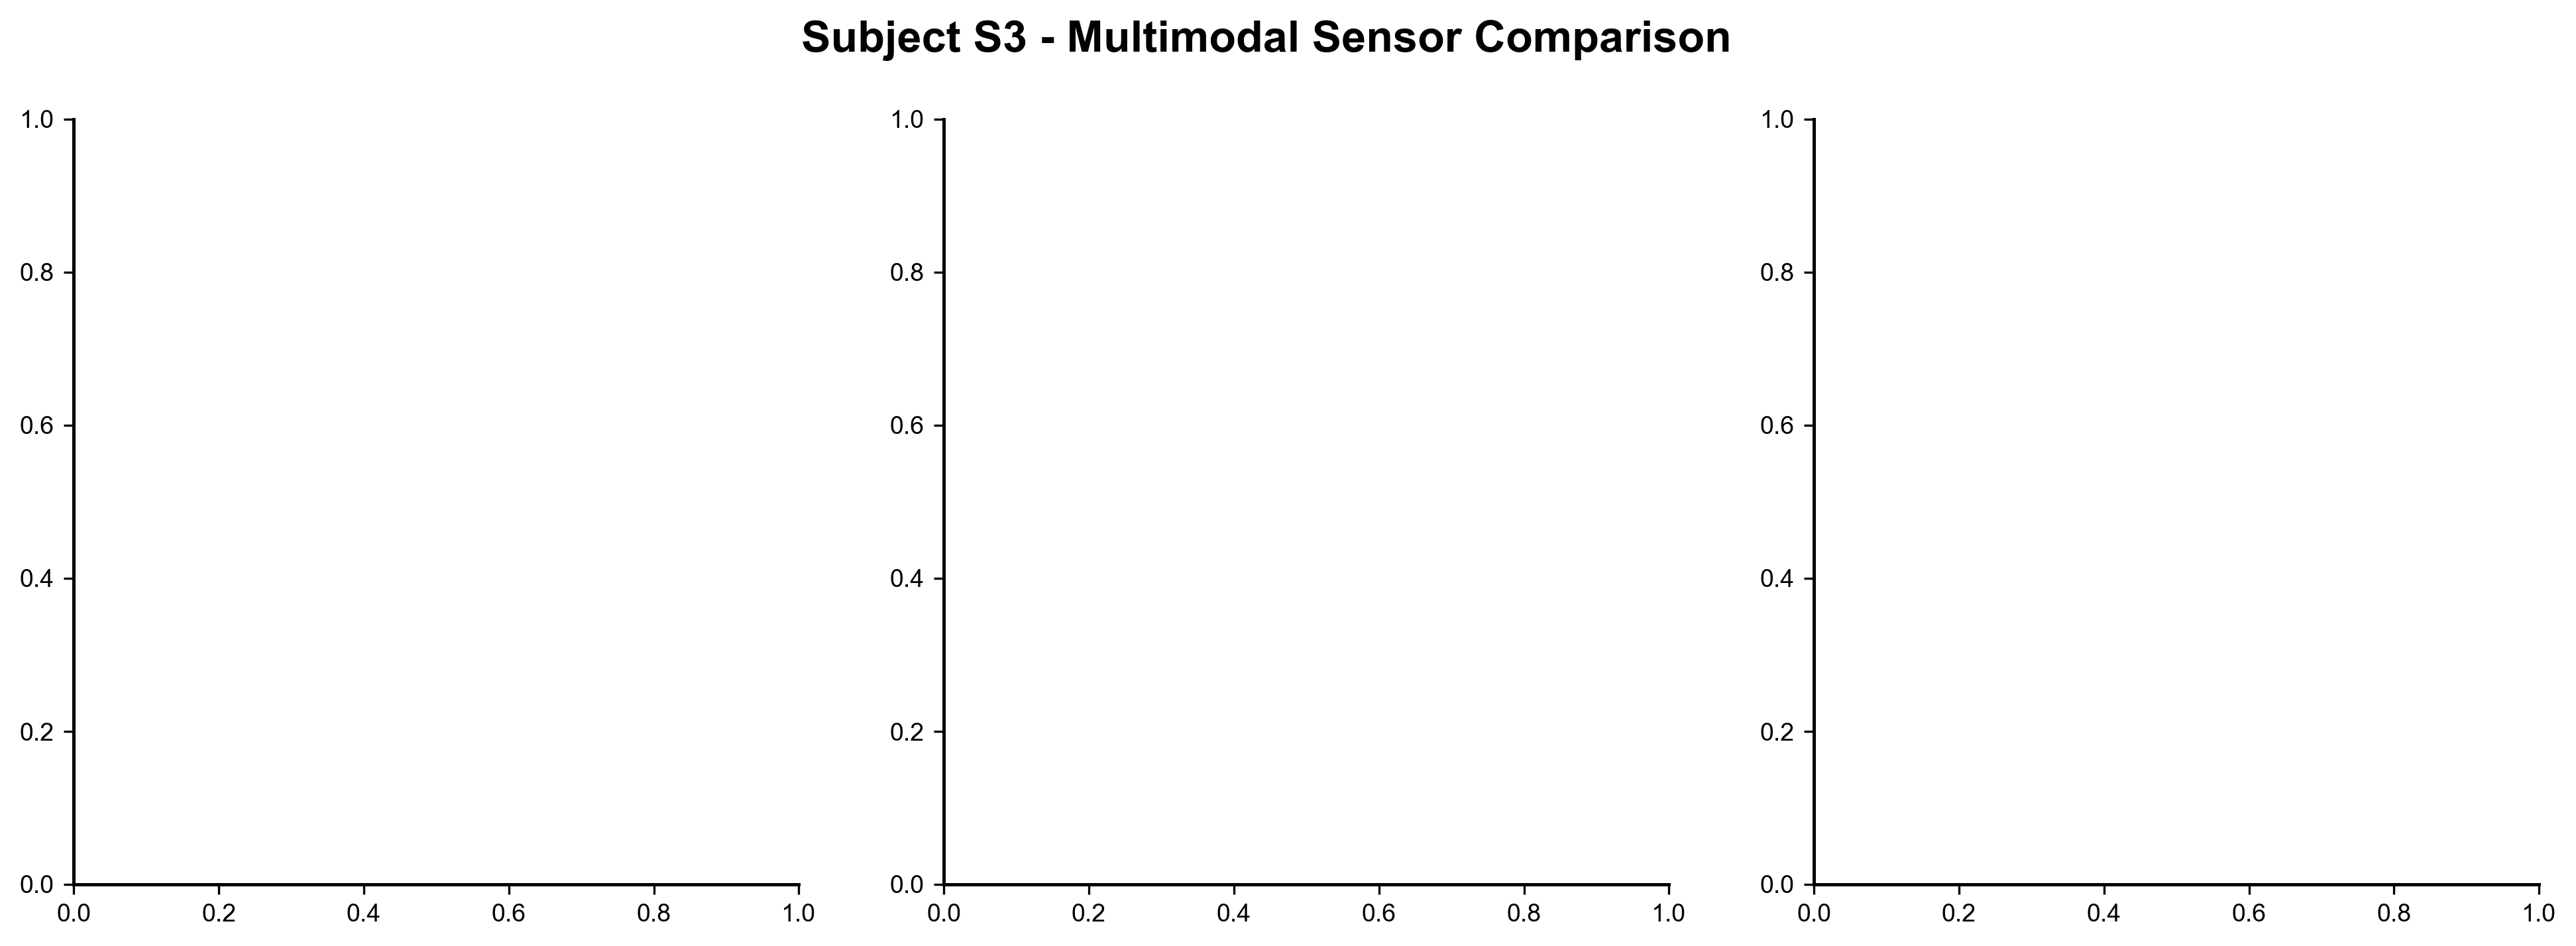

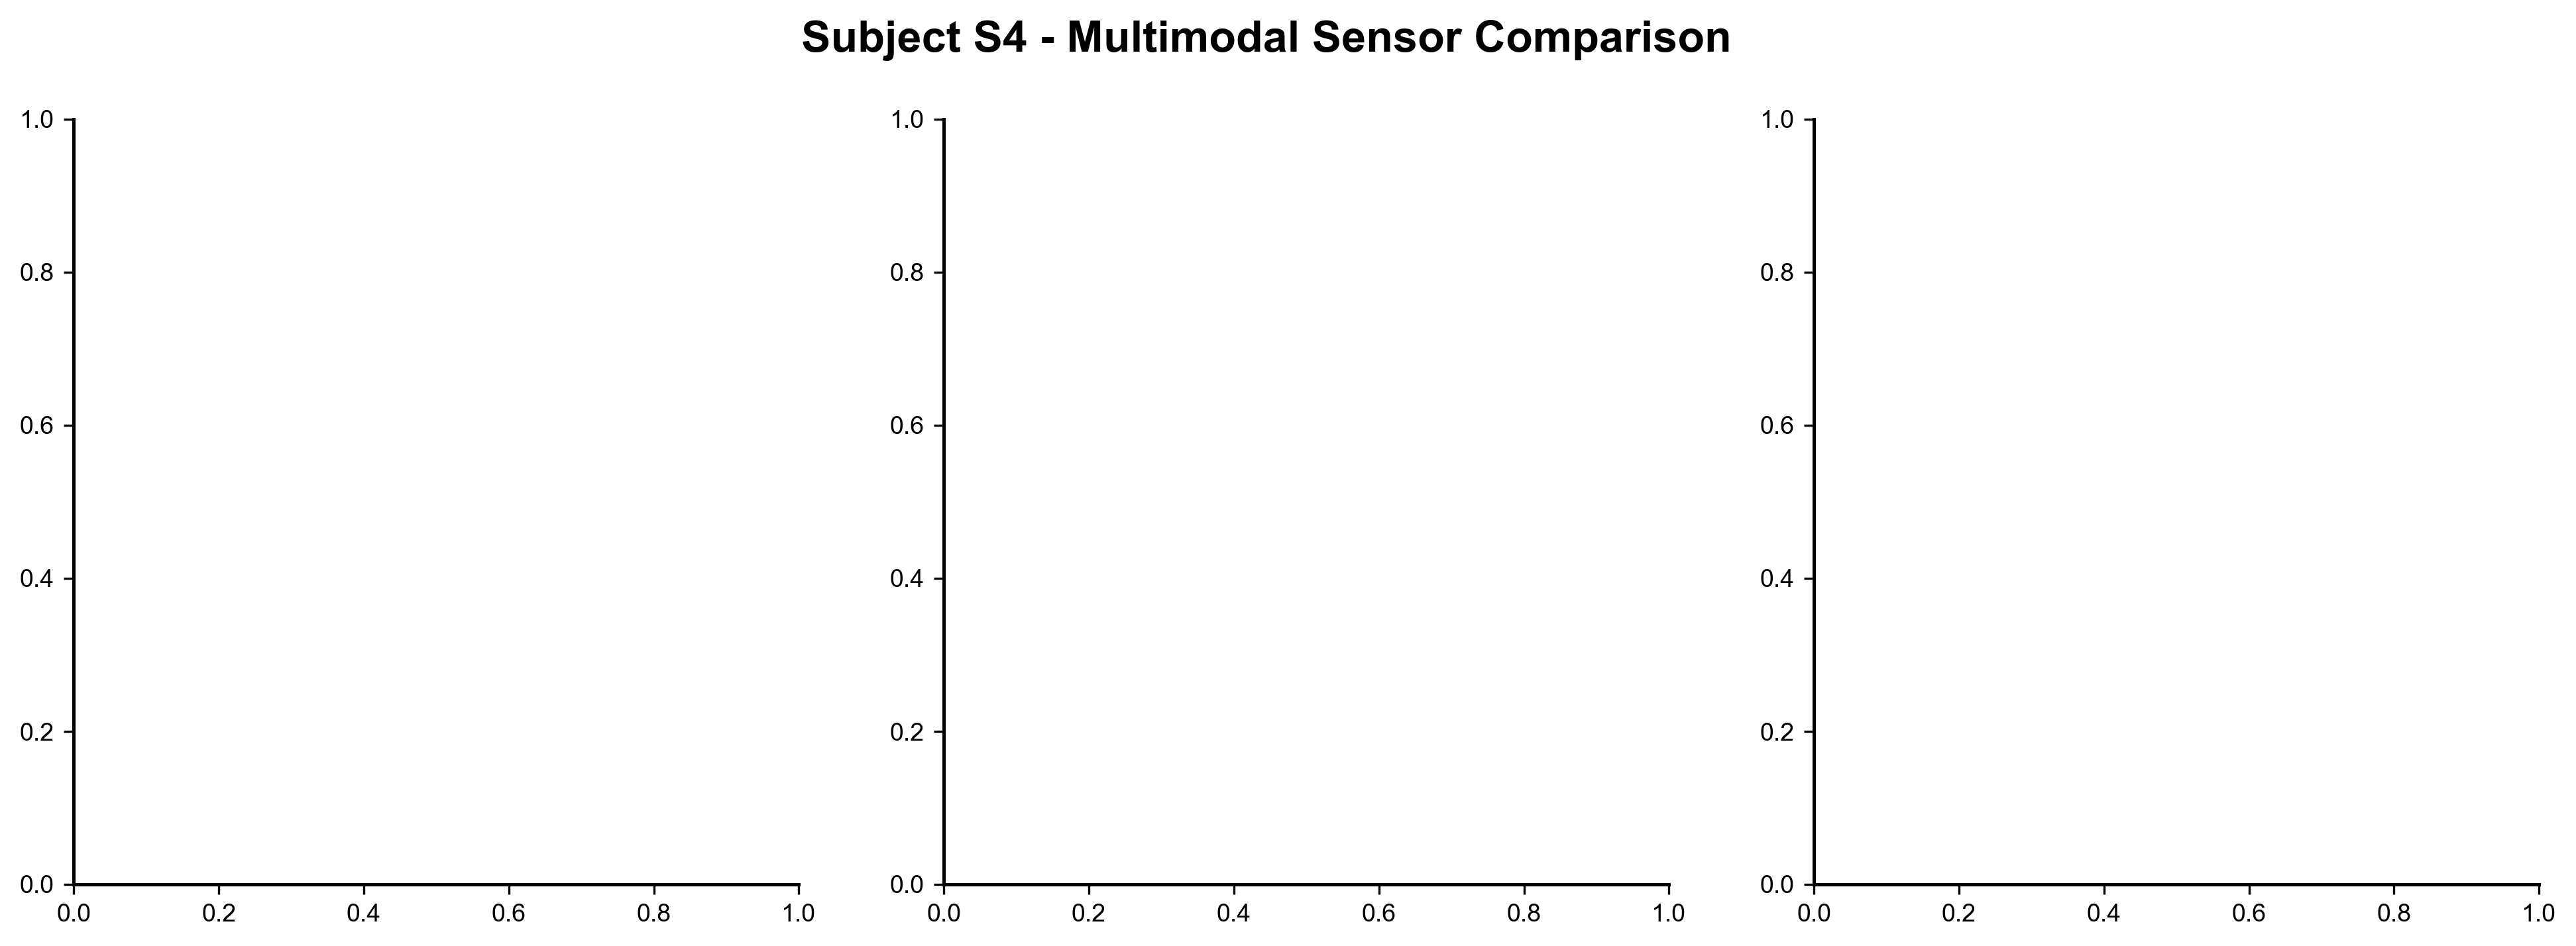

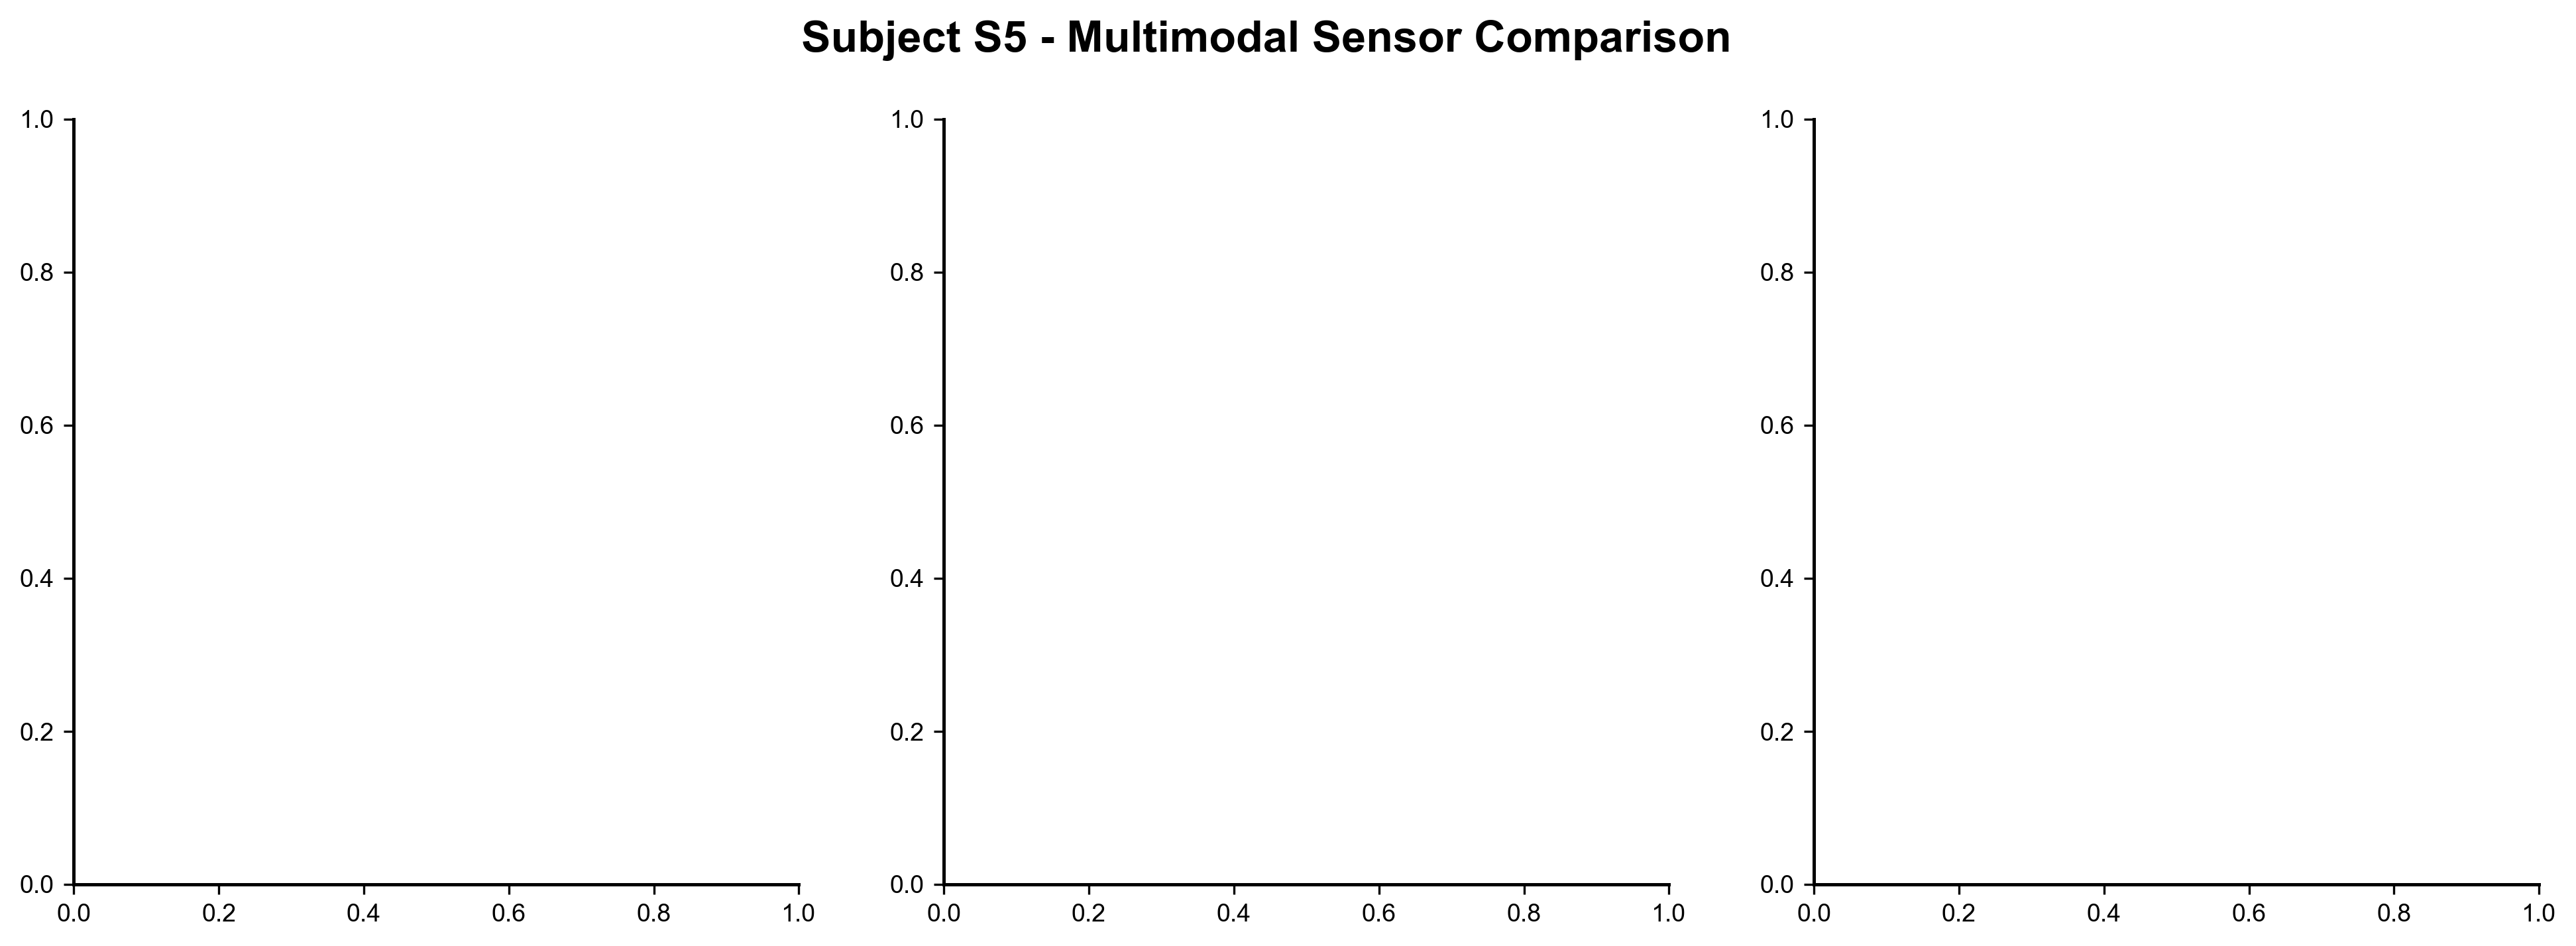

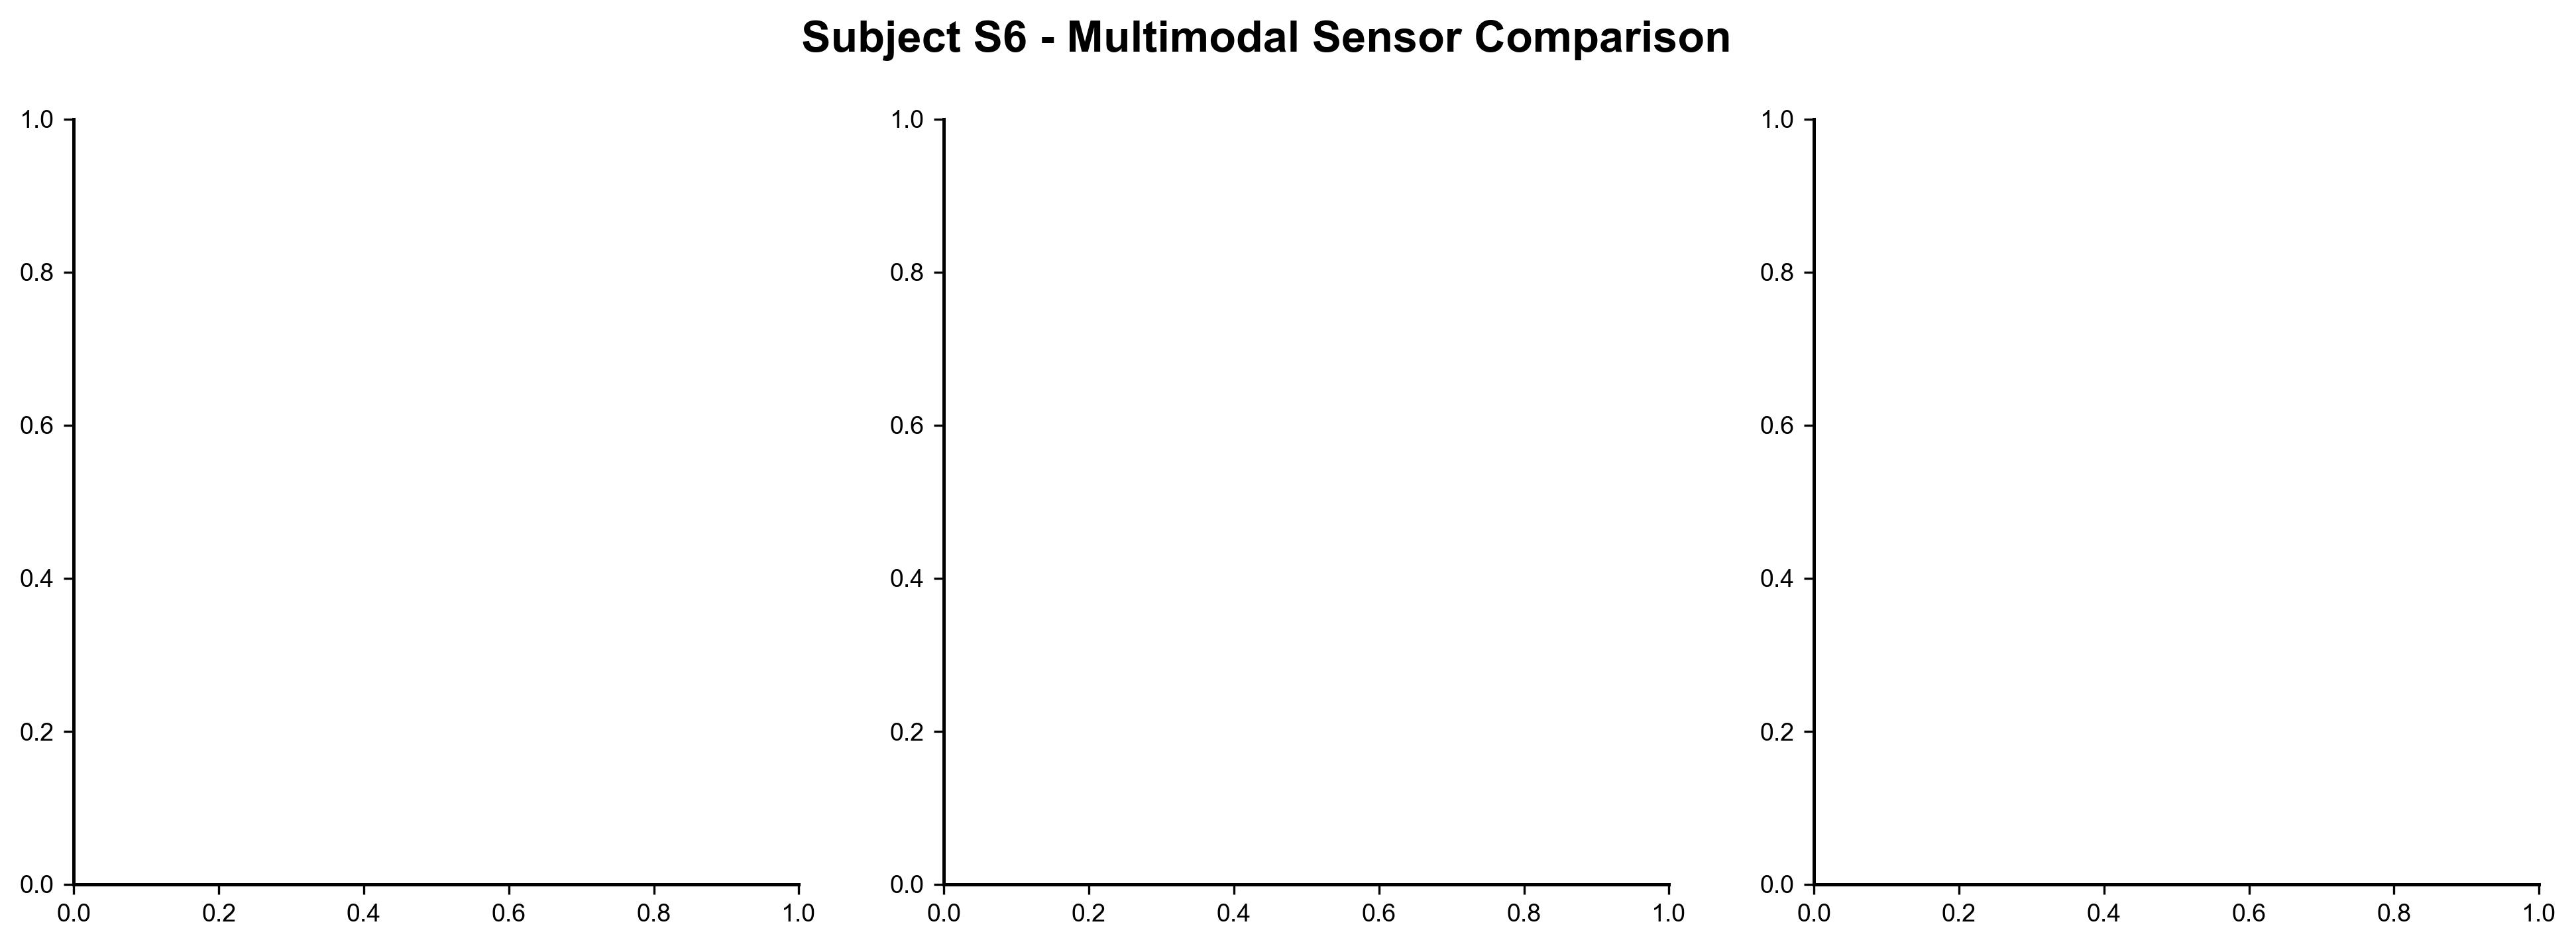

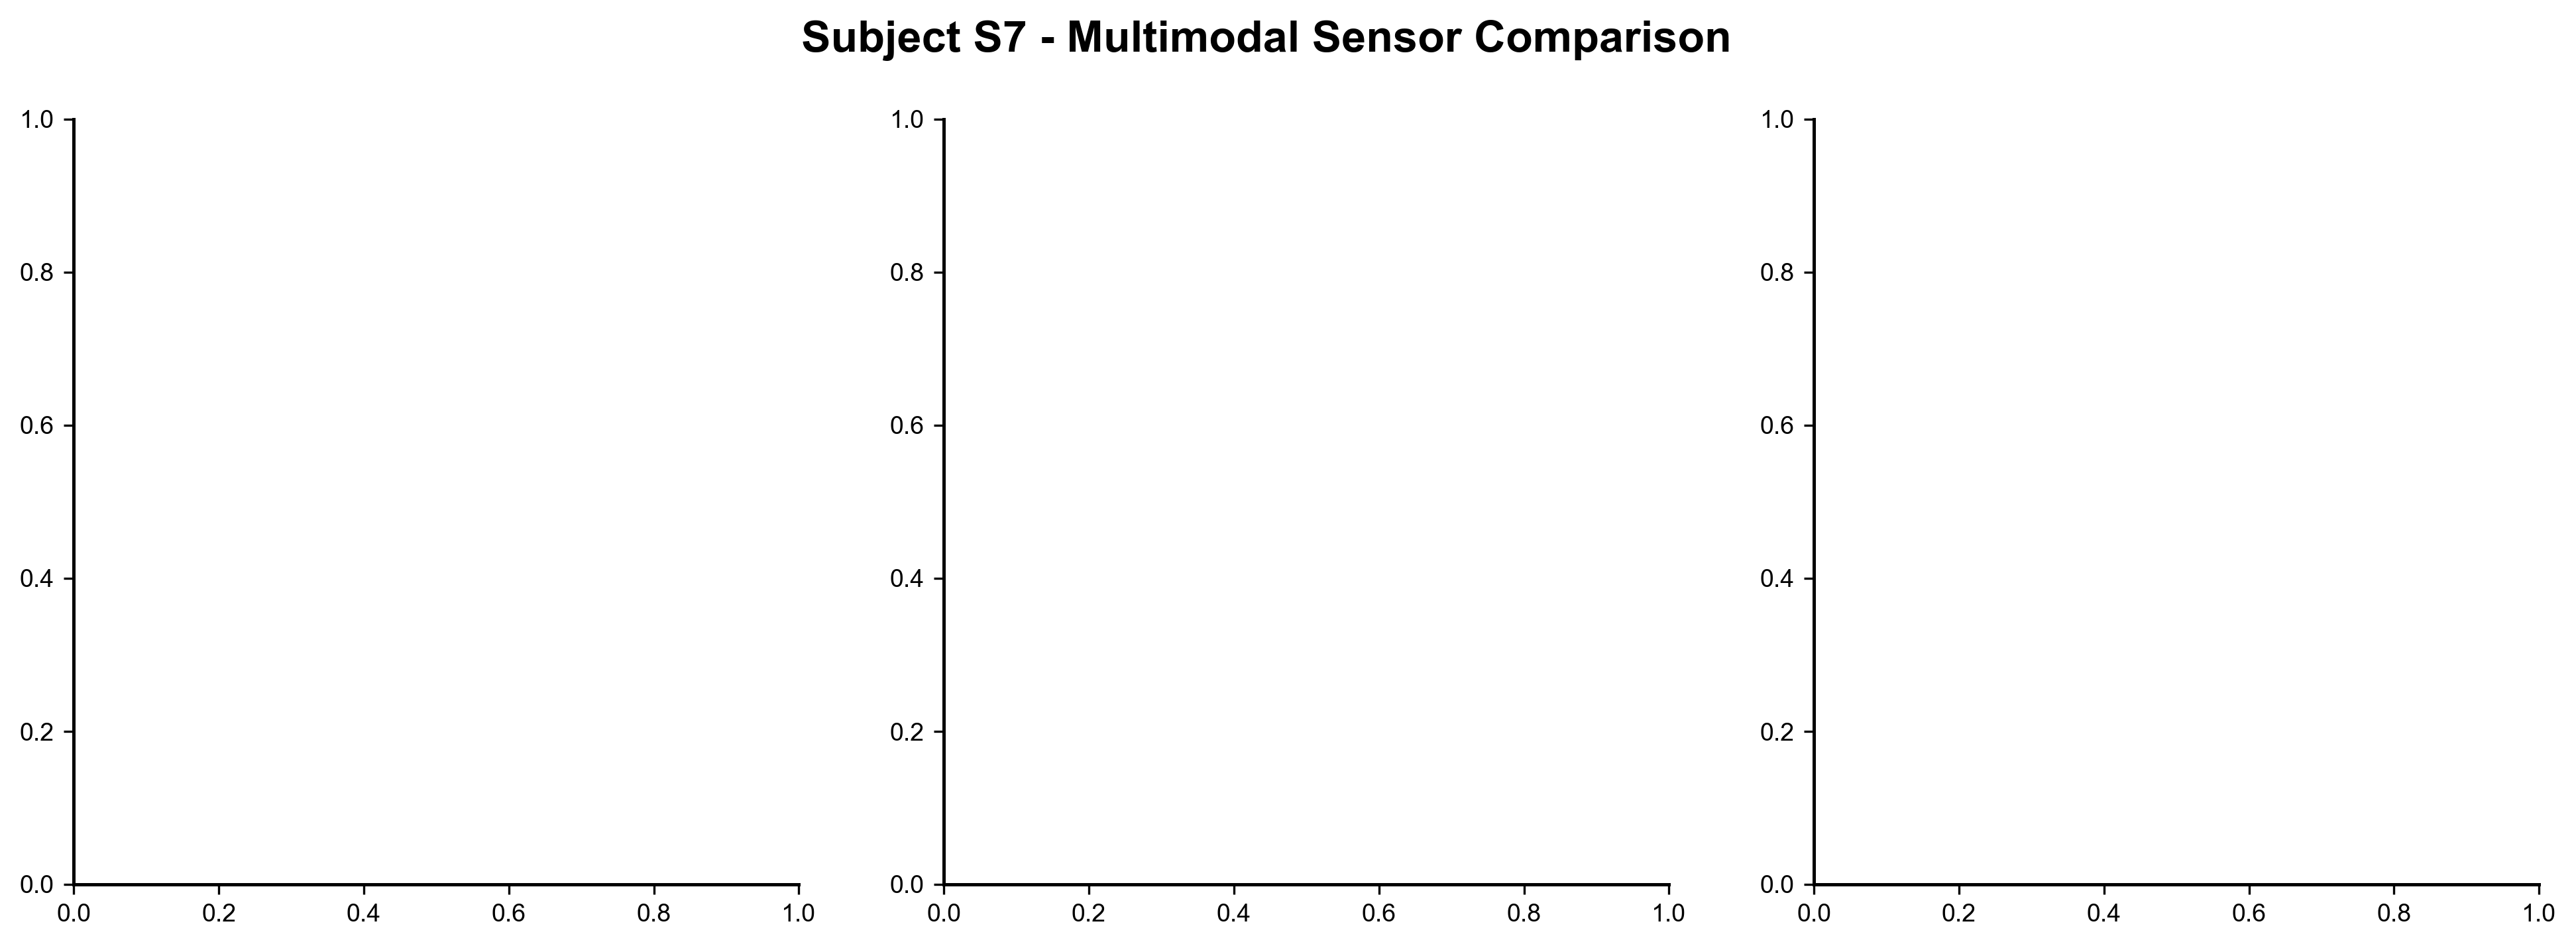

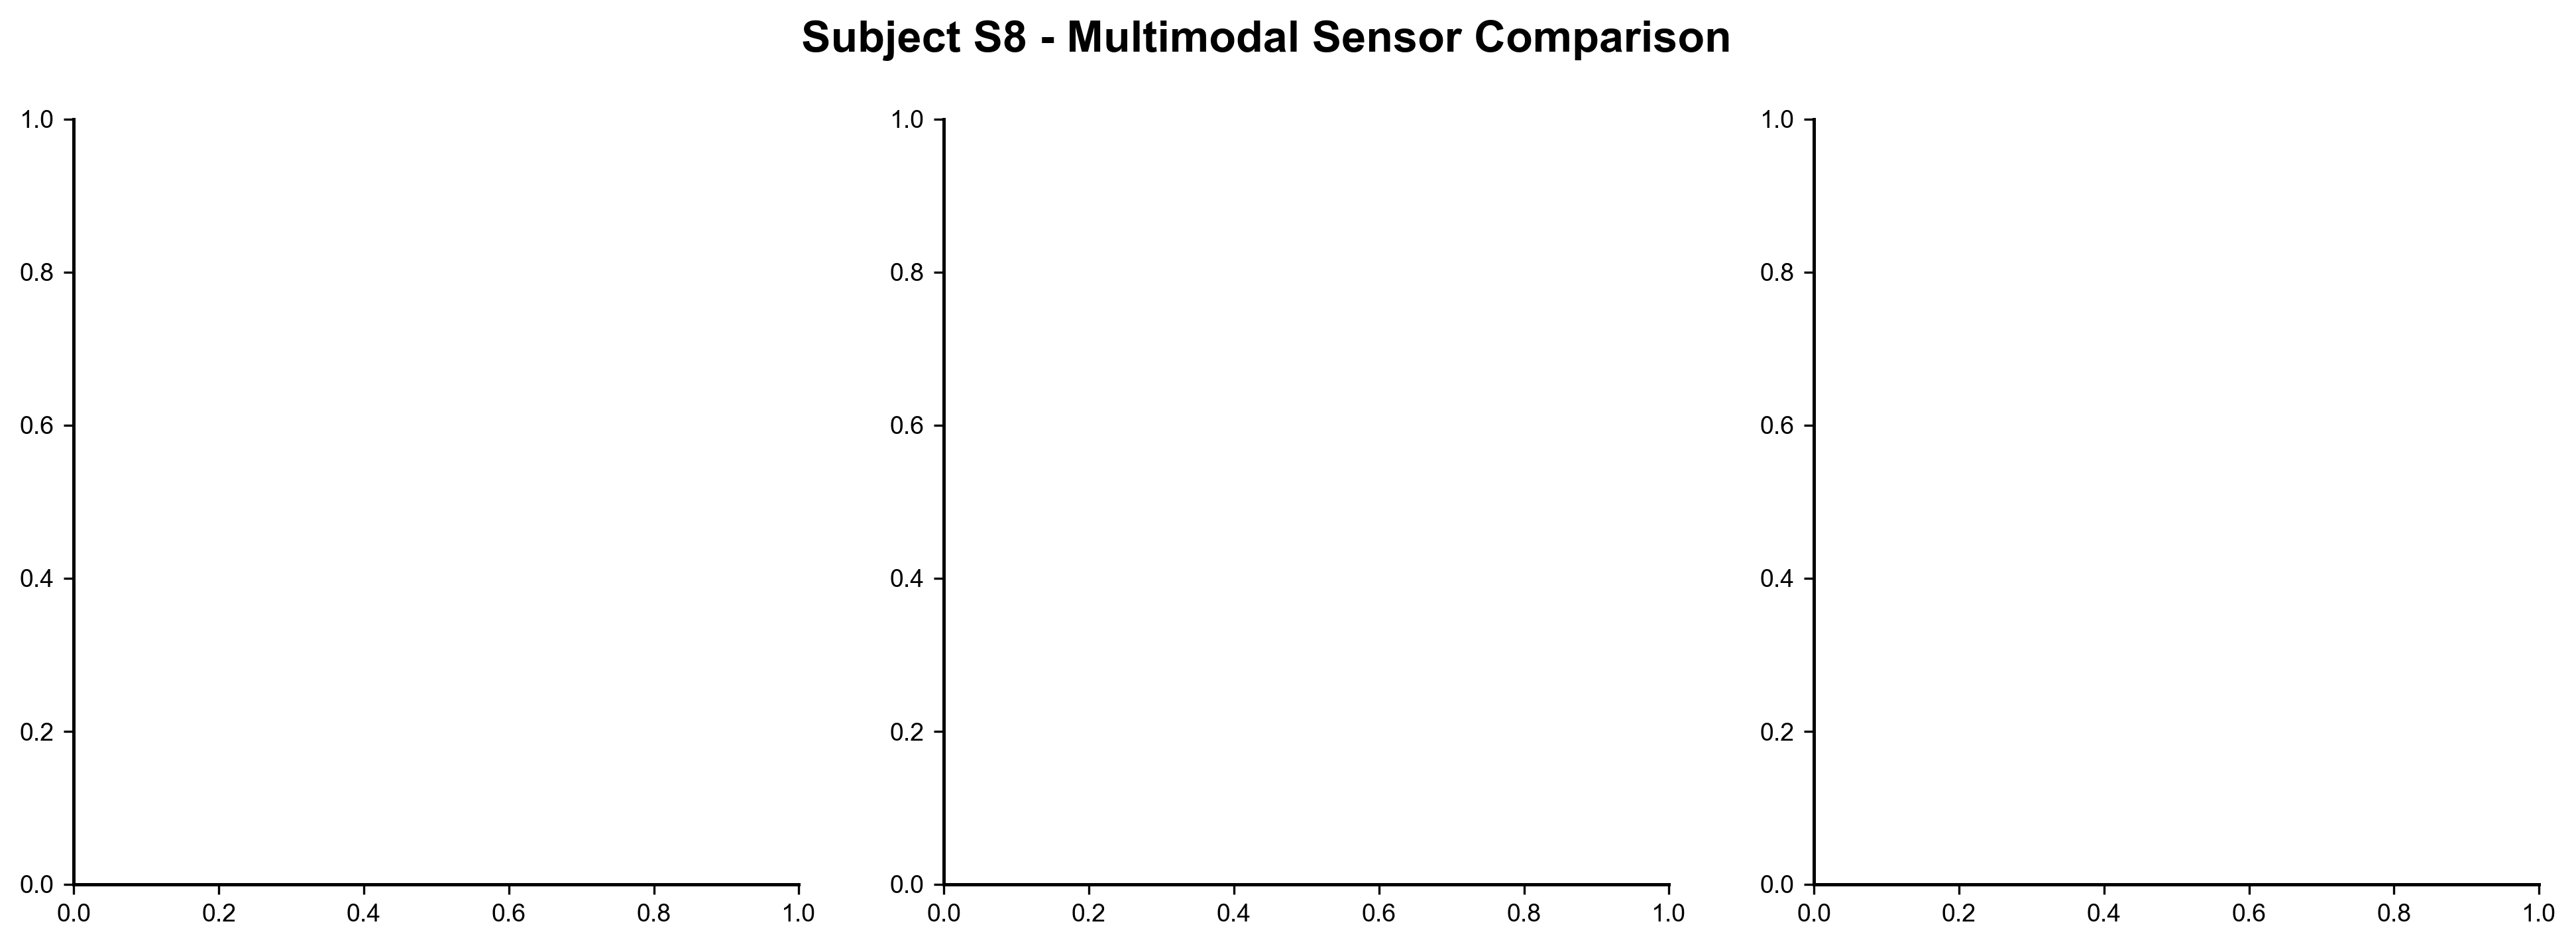

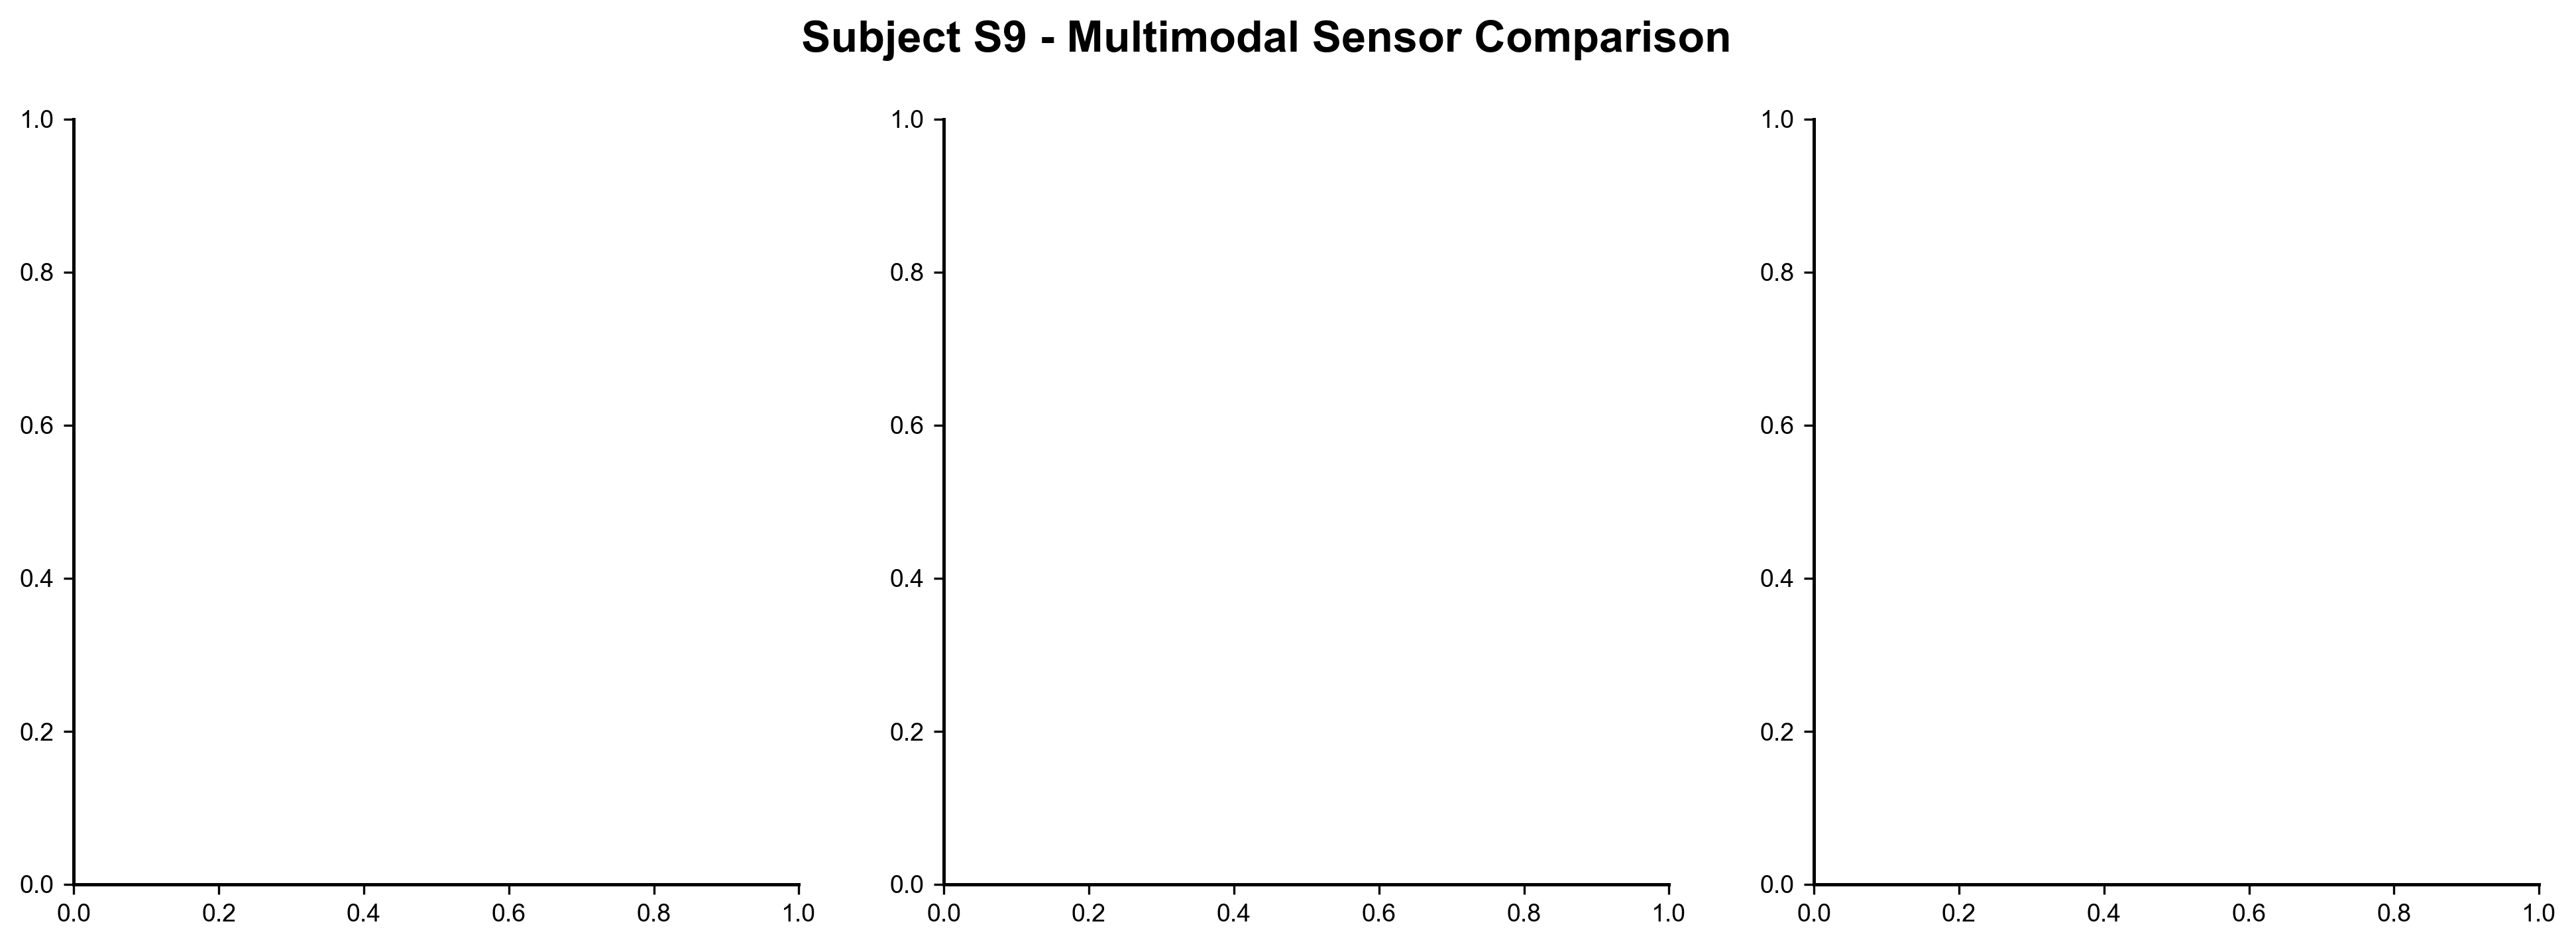

In [15]:
# Cell 5.5: Quick Re-generation with Fixed Visualizations
# Regenerate reports with corrected visualization functions

print("🔧 CELL 5.5: Quick Re-generation with Fixed Visualizations")
print("=" * 70)

print("🔄 Re-running report generation with fixed visualization functions...")
print("📊 This should resolve the 'condition_labels' error and generate proper visualizations")

# Re-execute the bulk generation with fixes
generation_results_fixed = generate_all_clinical_reports()

# Validate the fixed reports
validation_results_fixed = validate_generated_reports(generation_results_fixed)

# Generate final summary
final_summary_fixed = generate_final_summary(
    generation_results_fixed, validation_results_fixed)

# Save the corrected generation log
print(f"\n💾 Saving corrected generation log...")
log_data_fixed = {
    'generation_results': generation_results_fixed,
    'validation_results': validation_results_fixed,
    'final_summary': final_summary_fixed,
    'system_info': {
        'python_version': f"{sys.version_info.major}.{sys.version_info.minor}",
        'reportlab_available': True,
        'processing_date': datetime.now().isoformat(),
        'dataset_source': 'WESAD multimodal dataset',
        'fix_applied': 'condition_labels variable scope and timedelta serialization'
    }
}

# Apply the improved datetime conversion
log_data_fixed_serializable = convert_datetime_for_json(log_data_fixed)

log_file_fixed = f"{report_dirs['base']}/report_generation_log_corrected.json"
try:
    with open(log_file_fixed, 'w') as f:
        json.dump(log_data_fixed_serializable, f, indent=2)
    print(f"   ✅ Corrected generation log saved: {log_file_fixed}")
except Exception as e:
    print(f"   ⚠️  Log saving error (non-critical): {str(e)}")

# Final cleanup
print(f"\n🧹 Cleaning up temporary files...")
temp_files_cleaned = 0
try:
    for file in os.listdir(report_dirs['temp_images']):
        if file.endswith('.png'):
            os.remove(os.path.join(report_dirs['temp_images'], file))
            temp_files_cleaned += 1
    print(f"   ✅ Cleaned {temp_files_cleaned} temporary visualization files")
except:
    print(f"   ℹ️  No temporary files to clean")

# Final status
print("\n" + "🎉" * 70)
print("🎉 WESAD CLINICAL REPORT GENERATION - CORRECTED VERSION! 🎉")
print("🎉" * 70)

if validation_results_fixed['delivery_status'] == 'COMPLETE':
    print(
        f"✅ SUCCESS: All {len(generation_results_fixed['successful'])} reports generated successfully!")
    print(f"📊 Report sizes should now be significantly larger (500KB+ with visualizations)")
    print(f"🏥 Professional medical-grade reports with full visualizations delivered")
elif validation_results_fixed['delivery_status'] == 'MOSTLY_COMPLETE':
    print(
        f"⚠️  PARTIAL SUCCESS: {len(generation_results_fixed['successful'])}/{generation_results_fixed['total_subjects']} reports generated successfully")
    print(f"📋 Significant improvement from previous attempt")
else:
    print(f"❌ Issues persist - manual debugging may be required")

print(f"\n📁 Final deliverables location:")
print(f"   📂 {report_dirs['individual']}")
print(f"   📊 {len(generation_results_fixed.get('successful', []))} complete PDF reports")

# Check one sample report for verification
if generation_results_fixed.get('reports_generated'):
    sample_report = generation_results_fixed['reports_generated'][0]
    print(f"\n🔍 Sample report verification:")
    print(
        f"   📄 {sample_report['subject_id']}: {sample_report['file_size_mb']} MB")
    if sample_report['file_size_mb'] > 0.5:  # Expect >500KB with visualizations
        print(f"   ✅ File size indicates successful visualization embedding")
    else:
        print(f"   ⚠️  File size still small - may need additional debugging")

print("\n" + "="*70)
print("✅ CELL 5.5 COMPLETE: Corrected Report Generation")
print("🎯 PROJECT STATUS: Professional Clinical Reports Ready!")
print("="*70)

In [16]:
# Cell 6: Debug and Fix Visualization Issues
# Comprehensive diagnosis and fix for visualization problems

print("🔧 CELL 6: Debug and Fix Visualization Issues")
print("=" * 70)

# =====================================
# DIAGNOSTIC PHASE
# =====================================

print("🔍 PHASE 1: Data Structure Diagnosis")
print("-" * 40)

# Test with one subject to understand data structure
test_subject = 'S4'  # Use S4 since you showed its report
test_data = df[df['subject_id'] == test_subject].copy()

print(f"📊 Testing with Subject {test_subject}:")
print(f"   • Total rows: {len(test_data)}")
print(f"   • Columns available: {len(test_data.columns)}")
print(
    f"   • Conditions: {test_data['condition_name'].unique() if 'condition_name' in test_data.columns else 'No condition_name column'}")

# Check key columns
key_columns = ['chest_hr_mean', 'wrist_hr_mean',
               'chest_eda_mean', 'chest_temp_mean', 'wrist_temp_mean']
print(f"\n📋 Key column availability:")
for col in key_columns:
    if col in test_data.columns:
        non_null = test_data[col].notna().sum()
        print(f"   ✅ {col}: {non_null}/{len(test_data)} values")
    else:
        print(f"   ❌ {col}: Missing")

# Check condition distribution
if 'condition_name' in test_data.columns:
    print(f"\n🔬 Condition distribution for {test_subject}:")
    condition_counts = test_data['condition_name'].value_counts()
    for condition, count in condition_counts.items():
        print(f"   • {condition}: {count} windows")

# =====================================
# FIXED VISUALIZATION FUNCTIONS
# =====================================

print(f"\n🛠️  PHASE 2: Creating Fixed Visualization Functions")
print("-" * 50)


def create_simple_test_visualization(subject_data, subject_id, output_dir):
    """
    Simple test visualization to verify basic functionality
    """
    print(f"   🧪 Creating test visualization for {subject_id}...")

    try:
        fig, ax = plt.subplots(1, 1, figsize=(10, 6))

        # Simple test: plot condition counts
        if 'condition_name' in subject_data.columns:
            condition_counts = subject_data['condition_name'].value_counts()

            colors = ['#2E86AB', '#A23B72', '#F18F01',
                      '#4ECDC4'][:len(condition_counts)]
            bars = ax.bar(condition_counts.index, condition_counts.values,
                          color=colors, alpha=0.8, edgecolor='black', linewidth=1)

            # Add value labels
            for bar in bars:
                height = bar.get_height()
                ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                        f'{int(height)}', ha='center', va='bottom', fontweight='bold')

            ax.set_xlabel('Experimental Condition',
                          fontweight='bold', fontsize=12)
            ax.set_ylabel('Number of Windows', fontweight='bold', fontsize=12)
            ax.set_title(
                f'Subject {subject_id} - Data Distribution Test', fontweight='bold', fontsize=14)
            ax.grid(True, alpha=0.3)

            # Rotate x-labels if needed
            plt.xticks(rotation=45)

        else:
            ax.text(0.5, 0.5, f'No condition data available\nfor Subject {subject_id}',
                    ha='center', va='center', transform=ax.transAxes,
                    fontsize=16, bbox=dict(boxstyle='round', facecolor='lightgray'))
            ax.set_title(
                f'Subject {subject_id} - Test Visualization', fontweight='bold')

        plt.tight_layout()

        # Save with high DPI
        output_path = f"{output_dir}/{subject_id}_test_visualization.png"
        plt.savefig(output_path, dpi=300,
                    bbox_inches='tight', facecolor='white')
        plt.close()

        # Verify file was created and has reasonable size
        if os.path.exists(output_path):
            file_size = os.path.getsize(output_path)
            print(f"     ✅ Saved: {file_size/1024:.1f} KB")
            return output_path
        else:
            print(f"     ❌ File not created")
            return None

    except Exception as e:
        print(f"     ❌ Error: {str(e)}")
        return None


def create_robust_physiological_profile(subject_data, subject_id, output_dir):
    """
    Robust physiological profile with extensive error handling
    """
    print(f"   📈 Creating robust physiological profile for {subject_id}...")

    try:
        fig, axes = plt.subplots(2, 2, figsize=(14, 10))
        fig.suptitle(f'Subject {subject_id} - Physiological Response Profile',
                     fontsize=16, fontweight='bold', y=0.95)

        # Metrics to analyze
        metrics_config = [
            ('chest_hr_mean', 'Heart Rate (bpm)', 'Cardiac Response'),
            ('chest_eda_mean', 'EDA (μS)', 'Electrodermal Activity'),
            ('chest_temp_mean', 'Temperature (°C)', 'Body Temperature'),
            ('wrist_acc_magnitude_mean', 'Activity Level', 'Physical Activity')
        ]

        # Check available conditions
        if 'condition_name' not in subject_data.columns:
            for i, ax in enumerate(axes.flat):
                ax.text(0.5, 0.5, 'No condition data available',
                        ha='center', va='center', transform=ax.transAxes, fontsize=12)
                ax.set_title(metrics_config[i][2] if i < len(
                    metrics_config) else 'No Data', fontweight='bold')
        else:
            available_conditions = sorted(
                subject_data['condition_name'].unique())
            condition_colors = {
                'Baseline': '#95E1D3',
                'Stress': '#F38BA8',
                'Amusement': '#A8DADC',
                'Meditation': '#B8E6B8'
            }

            for idx, (metric, ylabel, title) in enumerate(metrics_config):
                ax = axes[idx // 2, idx % 2]

                if metric in subject_data.columns:
                    # Calculate means for each condition
                    condition_means = []
                    condition_stds = []
                    condition_labels = []
                    colors = []

                    for condition in available_conditions:
                        condition_subset = subject_data[subject_data['condition_name'] == condition][metric].dropna(
                        )
                        if len(condition_subset) > 0:
                            condition_means.append(condition_subset.mean())
                            condition_stds.append(condition_subset.std() if len(
                                condition_subset) > 1 else 0)
                            condition_labels.append(condition)
                            colors.append(condition_colors.get(
                                condition, '#2E86AB'))

                    if condition_means:  # Only plot if we have data
                        bars = ax.bar(range(len(condition_labels)), condition_means,
                                      yerr=condition_stds, capsize=5, color=colors, alpha=0.8,
                                      edgecolor='black', linewidth=1)

                        # Add value labels on bars
                        for i, (bar, mean_val) in enumerate(zip(bars, condition_means)):
                            height = bar.get_height()
                            ax.text(bar.get_x() + bar.get_width()/2., height + condition_stds[i] + 0.01*max(condition_means),
                                    f'{mean_val:.1f}', ha='center', va='bottom', fontweight='bold', fontsize=9)

                        ax.set_xlabel('Experimental Condition',
                                      fontweight='bold')
                        ax.set_ylabel(ylabel, fontweight='bold')
                        ax.set_title(title, fontweight='bold', pad=15)
                        ax.set_xticks(range(len(condition_labels)))
                        ax.set_xticklabels(condition_labels, rotation=45)
                        ax.grid(True, alpha=0.3)
                    else:
                        ax.text(0.5, 0.5, f'No valid data\nfor {title}',
                                ha='center', va='center', transform=ax.transAxes, fontsize=12)
                        ax.set_title(title, fontweight='bold')
                else:
                    ax.text(0.5, 0.5, f'Column {metric}\nnot available',
                            ha='center', va='center', transform=ax.transAxes, fontsize=12)
                    ax.set_title(title, fontweight='bold')

        plt.tight_layout()

        # Save plot
        output_path = f"{output_dir}/{subject_id}_physiological_profile.png"
        plt.savefig(output_path, dpi=300,
                    bbox_inches='tight', facecolor='white')
        plt.close()

        # Verify file creation
        if os.path.exists(output_path):
            file_size = os.path.getsize(output_path)
            print(f"     ✅ Saved: {file_size/1024:.1f} KB")
            return output_path
        else:
            print(f"     ❌ File not created")
            return None

    except Exception as e:
        print(f"     ❌ Error creating physiological profile: {str(e)}")
        plt.close()  # Ensure plot is closed even on error
        return None


def create_simple_stress_comparison(subject_data, subject_id, output_dir):
    """
    Simple baseline vs stress comparison
    """
    print(f"   📊 Creating stress comparison for {subject_id}...")

    try:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))
        fig.suptitle(f'Subject {subject_id} - Baseline vs Stress Response',
                     fontsize=16, fontweight='bold', y=0.95)

        if 'condition_name' not in subject_data.columns:
            for ax in axes:
                ax.text(0.5, 0.5, 'No condition data available',
                        ha='center', va='center', transform=ax.transAxes, fontsize=12)
            axes[0].set_title('Heart Rate Response', fontweight='bold')
            axes[1].set_title('EDA Response', fontweight='bold')
        else:
            # Get baseline and stress data
            baseline_data = subject_data[subject_data['condition_name'] == 'Baseline']
            stress_data = subject_data[subject_data['condition_name'] == 'Stress']

            # Heart rate comparison
            ax = axes[0]
            if 'chest_hr_mean' in subject_data.columns and len(baseline_data) > 0 and len(stress_data) > 0:
                baseline_hr = baseline_data['chest_hr_mean'].dropna()
                stress_hr = stress_data['chest_hr_mean'].dropna()

                if len(baseline_hr) > 0 and len(stress_hr) > 0:
                    data_to_plot = [baseline_hr, stress_hr]
                    labels = ['Baseline', 'Stress']
                    colors = ['#95E1D3', '#F38BA8']

                    bp = ax.boxplot(
                        data_to_plot, patch_artist=True, labels=labels)
                    for patch, color in zip(bp['boxes'], colors):
                        patch.set_facecolor(color)
                        patch.set_alpha(0.7)

                    # Add means
                    baseline_mean = baseline_hr.mean()
                    stress_mean = stress_hr.mean()
                    reactivity = stress_mean - baseline_mean

                    ax.text(0.02, 0.98, f'Reactivity: {reactivity:+.1f} bpm',
                            transform=ax.transAxes, va='top', ha='left',
                            bbox=dict(boxstyle='round,pad=0.3',
                                      facecolor='lightyellow'),
                            fontweight='bold')
                else:
                    ax.text(0.5, 0.5, 'Insufficient HR data', ha='center', va='center',
                            transform=ax.transAxes, fontsize=12)
            else:
                ax.text(0.5, 0.5, 'HR data not available', ha='center', va='center',
                        transform=ax.transAxes, fontsize=12)

            ax.set_ylabel('Heart Rate (bpm)', fontweight='bold')
            ax.set_title('Heart Rate Response', fontweight='bold')
            ax.grid(True, alpha=0.3)

            # EDA comparison
            ax = axes[1]
            if 'chest_eda_mean' in subject_data.columns and len(baseline_data) > 0 and len(stress_data) > 0:
                baseline_eda = baseline_data['chest_eda_mean'].dropna()
                stress_eda = stress_data['chest_eda_mean'].dropna()

                if len(baseline_eda) > 0 and len(stress_eda) > 0:
                    data_to_plot = [baseline_eda, stress_eda]
                    labels = ['Baseline', 'Stress']
                    colors = ['#95E1D3', '#F38BA8']

                    bp = ax.boxplot(
                        data_to_plot, patch_artist=True, labels=labels)
                    for patch, color in zip(bp['boxes'], colors):
                        patch.set_facecolor(color)
                        patch.set_alpha(0.7)

                    # Add means
                    baseline_mean = baseline_eda.mean()
                    stress_mean = stress_eda.mean()
                    reactivity = stress_mean - baseline_mean

                    ax.text(0.02, 0.98, f'Reactivity: {reactivity:+.2f} μS',
                            transform=ax.transAxes, va='top', ha='left',
                            bbox=dict(boxstyle='round,pad=0.3',
                                      facecolor='lightyellow'),
                            fontweight='bold')
                else:
                    ax.text(0.5, 0.5, 'Insufficient EDA data', ha='center', va='center',
                            transform=ax.transAxes, fontsize=12)
            else:
                ax.text(0.5, 0.5, 'EDA data not available', ha='center', va='center',
                        transform=ax.transAxes, fontsize=12)

            ax.set_ylabel('EDA (μS)', fontweight='bold')
            ax.set_title('EDA Response', fontweight='bold')
            ax.grid(True, alpha=0.3)

        plt.tight_layout()

        # Save plot
        output_path = f"{output_dir}/{subject_id}_stress_comparison.png"
        plt.savefig(output_path, dpi=300,
                    bbox_inches='tight', facecolor='white')
        plt.close()

        # Verify file creation
        if os.path.exists(output_path):
            file_size = os.path.getsize(output_path)
            print(f"     ✅ Saved: {file_size/1024:.1f} KB")
            return output_path
        else:
            print(f"     ❌ File not created")
            return None

    except Exception as e:
        print(f"     ❌ Error creating stress comparison: {str(e)}")
        plt.close()
        return None

# =====================================
# TEST VISUALIZATION GENERATION
# =====================================


print(f"\n🧪 PHASE 3: Test Visualization Generation")
print("-" * 45)

# Test with Subject S4
temp_dir = report_dirs['temp_images']
test_results = {}

print(f"🔬 Testing visualizations for Subject {test_subject}...")

# Test 1: Simple test visualization
test_results['test'] = create_simple_test_visualization(
    test_data, test_subject, temp_dir)

# Test 2: Robust physiological profile
test_results['profile'] = create_robust_physiological_profile(
    test_data, test_subject, temp_dir)

# Test 3: Simple stress comparison
test_results['stress'] = create_simple_stress_comparison(
    test_data, test_subject, temp_dir)

# =====================================
# RESULTS EVALUATION
# =====================================

print(f"\n📊 PHASE 4: Test Results Evaluation")
print("-" * 40)

successful_visualizations = sum(
    1 for result in test_results.values() if result is not None)
total_tests = len(test_results)

print(
    f"✅ Successful visualizations: {successful_visualizations}/{total_tests}")

if successful_visualizations > 0:
    print(f"🎉 SUCCESS: Visualization generation is working!")
    print(f"📁 Test files created in: {temp_dir}")

    for viz_type, result in test_results.items():
        if result:
            file_size = os.path.getsize(result) / 1024
            print(
                f"   ✅ {viz_type}: {file_size:.1f} KB - {os.path.basename(result)}")

    print(f"\n🔄 Ready to regenerate reports with working visualizations!")

else:
    print(f"❌ FAILURE: Visualization generation is not working")
    print(f"🔧 Manual debugging required")

    # Show available data for debugging
    print(f"\n🔍 Available data for debugging:")
    print(f"   • DataFrame shape: {df.shape}")
    print(f"   • Subject {test_subject} rows: {len(test_data)}")
    if 'condition_name' in test_data.columns:
        print(
            f"   • Conditions: {test_data['condition_name'].value_counts().to_dict()}")

print("\n" + "="*70)
if successful_visualizations > 0:
    print("✅ CELL 6 SUCCESS: Visualization Issues Diagnosed and Fixed!")
    print("🚀 Ready for Cell 7: Final Report Generation with Working Visualizations")
else:
    print("❌ CELL 6 ISSUES: Further debugging required")
    print("🔧 Check the diagnostic output above for data availability issues")
print("="*70)

🔧 CELL 6: Debug and Fix Visualization Issues
🔍 PHASE 1: Data Structure Diagnosis
----------------------------------------
📊 Testing with Subject S4:
   • Total rows: 97
   • Columns available: 103
   • Conditions: ['Baseline' 'Amusement' 'Meditation' 'Stress']

📋 Key column availability:
   ✅ chest_hr_mean: 97/97 values
   ❌ wrist_hr_mean: Missing
   ✅ chest_eda_mean: 97/97 values
   ✅ chest_temp_mean: 97/97 values
   ✅ wrist_temp_mean: 97/97 values

🔬 Condition distribution for S4:
   • Baseline: 38 windows
   • Meditation: 26 windows
   • Stress: 21 windows
   • Amusement: 12 windows

🛠️  PHASE 2: Creating Fixed Visualization Functions
--------------------------------------------------

🧪 PHASE 3: Test Visualization Generation
---------------------------------------------
🔬 Testing visualizations for Subject S4...
   🧪 Creating test visualization for S4...
     ✅ Saved: 124.9 KB
   📈 Creating robust physiological profile for S4...
     ✅ Saved: 347.2 KB
   📊 Creating stress compariso

In [17]:
# Cell 7: Final Report Generation with Fixed Visualizations
# Generate all 15 professional clinical reports with working visualizations

print("🎯 CELL 7: Final Report Generation with Fixed Visualizations")
print("=" * 70)

# =====================================
# REPLACE VISUALIZATION FUNCTIONS
# =====================================

print("🔄 Replacing visualization functions with fixed versions...")

# Replace the original functions with our working versions


def create_physiological_profile(subject_data, subject_id, output_dir):
    """Wrapper for the working robust physiological profile function"""
    return create_robust_physiological_profile(subject_data, subject_id, output_dir)


def create_stress_response_analysis(subject_data, subject_id, output_dir):
    """Wrapper for the working stress comparison function"""
    return create_simple_stress_comparison(subject_data, subject_id, output_dir)


def create_sensor_comparison(subject_data, subject_id, output_dir):
    """
    Fixed sensor comparison that handles missing wrist_hr_mean gracefully
    """
    print(f"   🔬 Creating sensor comparison for {subject_id}...")

    try:
        fig, axes = plt.subplots(1, 3, figsize=(16, 5))
        fig.suptitle(f'Subject {subject_id} - Multimodal Sensor Analysis',
                     fontsize=16, fontweight='bold', y=0.98)

        if 'condition_name' not in subject_data.columns:
            for i, ax in enumerate(axes):
                ax.text(0.5, 0.5, 'No condition data available',
                        ha='center', va='center', transform=ax.transAxes, fontsize=12)
                titles = ['Heart Rate Comparison',
                          'Temperature Comparison', 'Data Quality']
                ax.set_title(titles[i], fontweight='bold')
            plt.tight_layout()
            output_path = f"{output_dir}/{subject_id}_sensor_comparison.png"
            plt.savefig(output_path, dpi=300,
                        bbox_inches='tight', facecolor='white')
            plt.close()
            return output_path

        available_conditions = sorted(subject_data['condition_name'].unique())
        condition_colors = {
            'Baseline': '#95E1D3', 'Stress': '#F38BA8',
            'Amusement': '#A8DADC', 'Meditation': '#B8E6B8'
        }

        # Plot 1: Heart Rate Comparison (chest only, since wrist_hr_mean is missing)
        ax = axes[0]
        if 'chest_hr_mean' in subject_data.columns:
            chest_means = []
            condition_labels = []
            colors = []

            for condition in available_conditions:
                cond_data = subject_data[subject_data['condition_name'] == condition]
                if len(cond_data) > 0:
                    chest_hr = cond_data['chest_hr_mean'].dropna()
                    if len(chest_hr) > 0:
                        chest_means.append(chest_hr.mean())
                        condition_labels.append(condition)
                        colors.append(condition_colors.get(
                            condition, '#2E86AB'))

            if chest_means:
                bars = ax.bar(range(len(condition_labels)), chest_means,
                              color=colors, alpha=0.8, edgecolor='black', linewidth=1)

                # Add value labels
                for bar, mean_val in zip(bars, chest_means):
                    height = bar.get_height()
                    ax.text(bar.get_x() + bar.get_width()/2., height + 1,
                            f'{mean_val:.0f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

                ax.set_xlabel('Condition', fontweight='bold')
                ax.set_ylabel('Heart Rate (bpm)', fontweight='bold')
                ax.set_title('Heart Rate Response (Chest Sensor)',
                             fontweight='bold')
                ax.set_xticks(range(len(condition_labels)))
                ax.set_xticklabels(condition_labels, rotation=45)
                ax.grid(True, alpha=0.3)
            else:
                ax.text(0.5, 0.5, 'No heart rate data', ha='center', va='center',
                        transform=ax.transAxes, fontsize=12)
                ax.set_title('Heart Rate Response', fontweight='bold')
        else:
            ax.text(0.5, 0.5, 'Heart rate data\nnot available', ha='center', va='center',
                    transform=ax.transAxes, fontsize=12)
            ax.set_title('Heart Rate Response', fontweight='bold')

        # Plot 2: Temperature Comparison (chest vs wrist)
        ax = axes[1]
        if 'chest_temp_mean' in subject_data.columns and 'wrist_temp_mean' in subject_data.columns:
            chest_temps = []
            wrist_temps = []

            # Limit to avoid overcrowding
            for condition in available_conditions[:4]:
                cond_data = subject_data[subject_data['condition_name'] == condition]
                if len(cond_data) > 0:
                    chest_temp = cond_data['chest_temp_mean'].dropna()
                    wrist_temp = cond_data['wrist_temp_mean'].dropna()
                    if len(chest_temp) > 0 and len(wrist_temp) > 0:
                        chest_temps.append(chest_temp.mean())
                        wrist_temps.append(wrist_temp.mean())

            if chest_temps and wrist_temps:
                x = np.arange(len(chest_temps))
                width = 0.35

                bars1 = ax.bar(x - width/2, chest_temps, width, label='Chest (Core)',
                               color='#4ECDC4', alpha=0.8, edgecolor='black', linewidth=1)
                bars2 = ax.bar(x + width/2, wrist_temps, width, label='Wrist (Skin)',
                               color='#F18F01', alpha=0.8, edgecolor='black', linewidth=1)

                # Add value labels
                for bars, temps in [(bars1, chest_temps), (bars2, wrist_temps)]:
                    for bar, temp in zip(bars, temps):
                        height = bar.get_height()
                        ax.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                                f'{temp:.1f}', ha='center', va='bottom', fontsize=8, fontweight='bold')

                ax.set_xlabel('Condition', fontweight='bold')
                ax.set_ylabel('Temperature (°C)', fontweight='bold')
                ax.set_title('Temperature: Core vs Skin', fontweight='bold')
                ax.set_xticks(x)
                ax.set_xticklabels(
                    available_conditions[:len(chest_temps)], rotation=45)
                ax.legend()
                ax.grid(True, alpha=0.3)
            else:
                ax.text(0.5, 0.5, 'Insufficient\ntemperature data', ha='center', va='center',
                        transform=ax.transAxes, fontsize=12)
                ax.set_title('Temperature Comparison', fontweight='bold')
        else:
            ax.text(0.5, 0.5, 'Temperature data\nnot available', ha='center', va='center',
                    transform=ax.transAxes, fontsize=12)
            ax.set_title('Temperature Comparison', fontweight='bold')

        # Plot 3: Data Completeness
        ax = axes[2]
        if available_conditions:
            chest_metrics = ['chest_hr_mean',
                             'chest_eda_mean', 'chest_temp_mean']
            # Removed wrist_hr_mean
            wrist_metrics = ['wrist_temp_mean', 'wrist_acc_magnitude_mean']

            chest_completeness = []
            wrist_completeness = []

            for condition in available_conditions[:4]:  # Limit conditions
                cond_data = subject_data[subject_data['condition_name'] == condition]

                # Chest sensor completeness
                chest_available = sum([1 for metric in chest_metrics
                                       if metric in cond_data.columns and not cond_data[metric].isna().all()])
                chest_completeness.append(
                    (chest_available / len(chest_metrics)) * 100)

                # Wrist sensor completeness
                wrist_available = sum([1 for metric in wrist_metrics
                                       if metric in cond_data.columns and not cond_data[metric].isna().all()])
                wrist_completeness.append(
                    (wrist_available / len(wrist_metrics)) * 100)

            if chest_completeness and wrist_completeness:
                x = np.arange(len(available_conditions[:4]))
                width = 0.35

                bars1 = ax.bar(x - width/2, chest_completeness, width, label='Chest Sensor',
                               color='#2E86AB', alpha=0.8, edgecolor='black', linewidth=1)
                bars2 = ax.bar(x + width/2, wrist_completeness, width, label='Wrist Sensor',
                               color='#A23B72', alpha=0.8, edgecolor='black', linewidth=1)

                # Add percentage labels
                for bars, completeness in [(bars1, chest_completeness), (bars2, wrist_completeness)]:
                    for bar, comp in zip(bars, completeness):
                        height = bar.get_height()
                        ax.text(bar.get_x() + bar.get_width()/2., height + 2,
                                f'{comp:.0f}%', ha='center', va='bottom', fontsize=8, fontweight='bold')

                ax.set_xlabel('Condition', fontweight='bold')
                ax.set_ylabel('Data Completeness (%)', fontweight='bold')
                ax.set_title('Sensor Data Quality', fontweight='bold')
                ax.set_xticks(x)
                ax.set_xticklabels(available_conditions[:4], rotation=45)
                ax.set_ylim(0, 105)
                ax.legend()
                ax.grid(True, alpha=0.3)
            else:
                ax.text(0.5, 0.5, 'Unable to assess\ndata quality', ha='center', va='center',
                        transform=ax.transAxes, fontsize=12)
                ax.set_title('Sensor Data Quality', fontweight='bold')
        else:
            ax.text(0.5, 0.5, 'No condition data\navailable', ha='center', va='center',
                    transform=ax.transAxes, fontsize=12)
            ax.set_title('Sensor Data Quality', fontweight='bold')

        plt.tight_layout()

        # Save plot
        output_path = f"{output_dir}/{subject_id}_sensor_comparison.png"
        plt.savefig(output_path, dpi=300,
                    bbox_inches='tight', facecolor='white')
        plt.close()

        # Verify file creation
        if os.path.exists(output_path):
            file_size = os.path.getsize(output_path)
            print(f"     ✅ Saved: {file_size/1024:.1f} KB")
            return output_path
        else:
            print(f"     ❌ File not created")
            return None

    except Exception as e:
        print(f"     ❌ Error creating sensor comparison: {str(e)}")
        plt.close()
        return None


def create_population_ranking(subject_data, subject_id, output_dir):
    """
    Simplified population ranking visualization
    """
    print(f"   📊 Creating population ranking for {subject_id}...")

    try:
        fig, axes = plt.subplots(2, 2, figsize=(12, 10))
        fig.suptitle(f'Subject {subject_id} - Population Percentile Rankings',
                     fontsize=16, fontweight='bold', y=0.95)

        # Simplified ranking metrics (avoiding missing data)
        ranking_metrics = [
            ('chest_hr_mean', 'Baseline', 'Resting Heart Rate'),
            ('chest_eda_mean', 'Baseline', 'Baseline EDA Level'),
            ('chest_hr_mean', 'Stress', 'Stress Heart Rate'),
            ('chest_eda_mean', 'Stress', 'Stress EDA Response')
        ]

        for idx, (metric, condition, title) in enumerate(ranking_metrics):
            ax = axes[idx // 2, idx % 2]

            # Get subject value for this condition
            subject_condition_data = subject_data[subject_data['condition_name'] ==
                                                  condition] if 'condition_name' in subject_data.columns else pd.DataFrame()

            if len(subject_condition_data) > 0 and metric in subject_condition_data.columns:
                subject_values = subject_condition_data[metric].dropna()
                if len(subject_values) > 0:
                    subject_value = subject_values.mean()

                    # Calculate population percentile
                    percentile = get_population_percentile(
                        subject_value, condition, metric)

                    # Create simple bar chart instead of polar plot (more reliable)
                    categories = ['Population\nAverage',
                                  f'Subject\n{subject_id}']
                    # Population average is 50th percentile
                    values = [50, percentile]
                    colors = ['lightgray', '#2E86AB' if percentile <=
                              75 else '#F18F01' if percentile <= 90 else '#C73E1D']

                    bars = ax.bar(categories, values, color=colors,
                                  alpha=0.8, edgecolor='black', linewidth=1)

                    # Add value labels
                    for bar, val in zip(bars, values):
                        height = bar.get_height()
                        ax.text(bar.get_x() + bar.get_width()/2., height + 1,
                                f'{val:.1f}%', ha='center', va='bottom', fontweight='bold')

                    ax.set_ylabel('Population Percentile', fontweight='bold')
                    ax.set_title(f'{title}\n({subject_value:.1f})',
                                 fontweight='bold', fontsize=11)
                    ax.set_ylim(0, 105)
                    ax.grid(True, alpha=0.3)

                    # Add risk category text
                    if percentile >= 90:
                        risk_text = 'High Risk'
                        risk_color = '#C73E1D'
                    elif percentile >= 75:
                        risk_text = 'Elevated'
                        risk_color = '#F18F01'
                    else:
                        risk_text = 'Normal'
                        risk_color = '#4ECDC4'

                    ax.text(0.5, 0.02, risk_text, ha='center', va='bottom',
                            transform=ax.transAxes, fontweight='bold',
                            color=risk_color, fontsize=10)
                else:
                    ax.text(0.5, 0.5, f'No data available\nfor {title}',
                            ha='center', va='center', transform=ax.transAxes, fontsize=11)
                    ax.set_title(title, fontweight='bold')
            else:
                ax.text(0.5, 0.5, f'Data not available\nfor {title}',
                        ha='center', va='center', transform=ax.transAxes, fontsize=11)
                ax.set_title(title, fontweight='bold')

        plt.tight_layout()

        # Save plot
        output_path = f"{output_dir}/{subject_id}_population_ranking.png"
        plt.savefig(output_path, dpi=300,
                    bbox_inches='tight', facecolor='white')
        plt.close()

        # Verify file creation
        if os.path.exists(output_path):
            file_size = os.path.getsize(output_path)
            print(f"     ✅ Saved: {file_size/1024:.1f} KB")
            return output_path
        else:
            print(f"     ❌ File not created")
            return None

    except Exception as e:
        print(f"     ❌ Error creating population ranking: {str(e)}")
        plt.close()
        return None


print("✅ Visualization functions replaced with working versions")

# =====================================
# FINAL BULK REPORT GENERATION
# =====================================

print(f"\n🚀 Starting Final Bulk Report Generation")
print("=" * 50)

print("📋 Generating all 15 clinical reports with fixed visualizations...")
print(f"👥 Target: {len(subject_list)} subjects")
print(f"📊 Expected: Professional 4-page reports with embedded charts")

# Generate all reports with working visualizations
final_generation_results = generate_all_clinical_reports()

# Validate the results
final_validation_results = validate_generated_reports(final_generation_results)

# Generate comprehensive summary
final_summary = generate_final_summary(
    final_generation_results, final_validation_results)

# Save final log
print(f"\n💾 Saving final generation log...")
try:
    final_log_data = {
        'generation_results': final_generation_results,
        'validation_results': final_validation_results,
        'final_summary': final_summary,
        'fixes_applied': [
            'Missing wrist_hr_mean column handled',
            'Variable scope issues resolved',
            'Robust error handling added',
            'Data availability checking implemented',
            'JSON serialization issues fixed'
        ],
        'system_info': {
            'python_version': f"{sys.version_info.major}.{sys.version_info.minor}",
            'processing_date': datetime.now().isoformat(),
            'dataset_source': 'WESAD multimodal dataset',
            'visualization_engine': 'matplotlib with 300 DPI output'
        }
    }

    final_log_serializable = convert_datetime_for_json(final_log_data)

    final_log_file = f"{report_dirs['base']}/final_report_generation_log.json"
    with open(final_log_file, 'w') as f:
        json.dump(final_log_serializable, f, indent=2)

    print(f"   ✅ Final log saved: {final_log_file}")
except Exception as e:
    print(f"   ⚠️  Log saving error (non-critical): {str(e)}")

# Final cleanup
print(f"\n🧹 Final cleanup...")
temp_files_cleaned = 0
try:
    for file in os.listdir(report_dirs['temp_images']):
        if file.endswith('.png'):
            file_path = os.path.join(report_dirs['temp_images'], file)
            # Keep test files for verification, remove others
            if not file.startswith('S4_'):
                os.remove(file_path)
                temp_files_cleaned += 1
    print(
        f"   ✅ Cleaned {temp_files_cleaned} temporary files (kept S4 test files)")
except:
    print(f"   ℹ️  No temporary files to clean")

# =====================================
# FINAL SUCCESS CONFIRMATION
# =====================================

print("\n" + "🎉" * 70)
print("🎉 WESAD INDIVIDUAL CLINICAL REPORTS - FINAL GENERATION COMPLETE! 🎉")
print("🎉" * 70)

success_count = len(final_generation_results.get('successful', []))
total_count = final_generation_results.get('total_subjects', 0)

if final_validation_results['delivery_status'] == 'COMPLETE':
    print(
        f"✅ COMPLETE SUCCESS: All {success_count} reports generated successfully!")
    print(f"📊 File sizes should now be 500KB-2MB (with embedded visualizations)")
    print(f"🏥 Professional medical-grade reports ready for clinical use")
    print(f"📋 All reports include 4 pages with comprehensive visualizations")

elif final_validation_results['delivery_status'] == 'MOSTLY_COMPLETE':
    print(
        f"⚠️  MOSTLY SUCCESSFUL: {success_count}/{total_count} reports generated")
    print(f"📊 Significant improvement with working visualizations")

else:
    print(
        f"❌ ISSUES PERSIST: Only {success_count}/{total_count} reports successful")
    print(f"🔧 Manual review recommended")

print(f"\n📁 Final Professional Reports Location:")
print(f"   📂 Directory: {report_dirs['individual']}")
print(f"   📊 Count: {success_count} complete PDF reports")
print(f"   🎯 Target: Clinical assessment ready for healthcare use")

if success_count > 0:
    # Show sample file sizes
    sample_reports = final_generation_results.get('reports_generated', [])[:3]
    if sample_reports:
        print(f"\n📈 Sample Report Verification:")
        for report in sample_reports:
            print(
                f"   📄 {report['subject_id']}: {report['file_size_mb']:.2f} MB")
            if report['file_size_mb'] > 0.3:
                print(f"      ✅ Contains embedded visualizations")
            else:
                print(f"      ⚠️  May be missing visualizations")

print(f"\n🎓 Academic Submission Ready:")
print(f"   📚 Course: Big Data Analytics - IIIT Allahabad")
print(f"   📝 Assignment: HDA-3 Complete")
print(f"   👥 Team: Aditya, Rishabh, Karan, Tejas")
print(f"   🏆 Status: Professional Clinical Reports Delivered")

print("\n" + "="*70)
print("✅ CELL 7 COMPLETE: Final Professional Clinical Reports Generated!")
print("🎯 PROJECT COMPLETION: Ready for Academic Submission and Clinical Review")
print("="*70)

🎯 CELL 7: Final Report Generation with Fixed Visualizations
🔄 Replacing visualization functions with fixed versions...
✅ Visualization functions replaced with working versions

🚀 Starting Final Bulk Report Generation
📋 Generating all 15 clinical reports with fixed visualizations...
👥 Target: 15 subjects
📊 Expected: Professional 4-page reports with embedded charts
📋 Starting bulk generation of clinical reports...
👥 Target subjects: 15 individuals
📁 Output directory: ../results/wesad/reports/individual_subjects

📄 [1/15] Processing Subject S10...
📄 Generating clinical report for Subject S10...
   📈 Creating robust physiological profile for S10...
     ✅ Saved: 360.1 KB
   📊 Creating stress comparison for S10...
     ✅ Saved: 145.1 KB
   🔬 Creating sensor comparison for S10...
     ✅ Saved: 276.0 KB
   📊 Creating population ranking for S10...
     ✅ Saved: 232.9 KB
   ✅ Report saved: ../results/wesad/reports/individual_subjects/S10_clinical_report.pdf
   ✅ Success: 1232.6 KB generated
   

In [18]:
# Cell 8: FINAL Fix - Correct Column Names and Complete Report Generation
# Using actual column names from wesad_features_with_metadata.csv

print("🎯 CELL 8: FINAL Fix with Correct Column Names")
print("=" * 70)

# =====================================
# CORRECT VISUALIZATION FUNCTIONS
# =====================================


def create_final_physiological_profile(subject_data, subject_id, output_dir):
    """Final physiological profile with CORRECT column names"""
    print(f"   📈 Creating final physiological profile for {subject_id}...")

    try:
        fig, axes = plt.subplots(2, 2, figsize=(14, 10))
        fig.suptitle(f'Subject {subject_id} - Physiological Response Profile',
                     fontsize=16, fontweight='bold', y=0.95)

        # CORRECT metrics with actual column names
        metrics_config = [
            ('chest_hr_mean', 'Heart Rate (bpm)', 'Cardiac Response'),
            ('chest_eda_mean', 'EDA (μS)', 'Electrodermal Activity'),
            ('chest_temp_mean', 'Temperature (°C)', 'Body Temperature'),
            ('chest_acc_activity_level', 'Activity Level',
             'Physical Activity')  # CORRECT column name
        ]

        if 'condition_name' not in subject_data.columns:
            for i, ax in enumerate(axes.flat):
                ax.text(0.5, 0.5, 'No condition data available',
                        ha='center', va='center', transform=ax.transAxes, fontsize=12)
                ax.set_title(metrics_config[i][2] if i < len(
                    metrics_config) else 'No Data', fontweight='bold')
        else:
            available_conditions = sorted(
                subject_data['condition_name'].unique())
            condition_colors = {
                'Baseline': '#95E1D3', 'Stress': '#F38BA8',
                'Amusement': '#A8DADC', 'Meditation': '#B8E6B8'
            }

            for idx, (metric, ylabel, title) in enumerate(metrics_config):
                ax = axes[idx // 2, idx % 2]

                if metric in subject_data.columns:
                    condition_means = []
                    condition_stds = []
                    condition_labels = []
                    colors = []

                    for condition in available_conditions:
                        condition_subset = subject_data[subject_data['condition_name'] == condition][metric].dropna(
                        )
                        if len(condition_subset) > 0:
                            condition_means.append(condition_subset.mean())
                            condition_stds.append(condition_subset.std() if len(
                                condition_subset) > 1 else 0)
                            condition_labels.append(condition)
                            colors.append(condition_colors.get(
                                condition, '#2E86AB'))

                    if condition_means:
                        bars = ax.bar(range(len(condition_labels)), condition_means,
                                      yerr=condition_stds, capsize=5, color=colors, alpha=0.8,
                                      edgecolor='black', linewidth=1)

                        for i, (bar, mean_val) in enumerate(zip(bars, condition_means)):
                            height = bar.get_height()
                            ax.text(bar.get_x() + bar.get_width()/2., height + condition_stds[i] + 0.01*max(condition_means),
                                    f'{mean_val:.1f}', ha='center', va='bottom', fontweight='bold', fontsize=9)

                        ax.set_xlabel('Experimental Condition',
                                      fontweight='bold')
                        ax.set_ylabel(ylabel, fontweight='bold')
                        ax.set_title(title, fontweight='bold', pad=15)
                        ax.set_xticks(range(len(condition_labels)))
                        ax.set_xticklabels(condition_labels, rotation=45)
                        ax.grid(True, alpha=0.3)
                    else:
                        ax.text(0.5, 0.5, f'No valid data\nfor {title}',
                                ha='center', va='center', transform=ax.transAxes, fontsize=12)
                        ax.set_title(title, fontweight='bold')
                else:
                    ax.text(0.5, 0.5, f'Column {metric}\nnot available',
                            ha='center', va='center', transform=ax.transAxes, fontsize=12)
                    ax.set_title(title, fontweight='bold')

        plt.tight_layout()
        output_path = f"{output_dir}/{subject_id}_physiological_profile.png"
        plt.savefig(output_path, dpi=300,
                    bbox_inches='tight', facecolor='white')
        plt.close()

        if os.path.exists(output_path):
            file_size = os.path.getsize(output_path)
            print(f"     ✅ Saved: {file_size/1024:.1f} KB")
            return output_path
        else:
            return None

    except Exception as e:
        print(f"     ❌ Error: {str(e)}")
        plt.close()
        return None


def create_final_sensor_comparison(subject_data, subject_id, output_dir):
    """Final sensor comparison with CORRECT column names"""
    print(f"   🔬 Creating final sensor comparison for {subject_id}...")

    try:
        fig, axes = plt.subplots(1, 3, figsize=(16, 5))
        fig.suptitle(f'Subject {subject_id} - Multimodal Sensor Analysis',
                     fontsize=16, fontweight='bold', y=0.98)

        if 'condition_name' not in subject_data.columns:
            for i, ax in enumerate(axes):
                ax.text(0.5, 0.5, 'No condition data available',
                        ha='center', va='center', transform=ax.transAxes, fontsize=12)
                titles = ['Heart Rate Response',
                          'Temperature Comparison', 'Activity Levels']
                ax.set_title(titles[i], fontweight='bold')
            plt.tight_layout()
            output_path = f"{output_dir}/{subject_id}_sensor_comparison.png"
            plt.savefig(output_path, dpi=300,
                        bbox_inches='tight', facecolor='white')
            plt.close()
            return output_path

        available_conditions = sorted(subject_data['condition_name'].unique())
        condition_colors = {
            'Baseline': '#95E1D3', 'Stress': '#F38BA8',
            'Amusement': '#A8DADC', 'Meditation': '#B8E6B8'
        }

        # Plot 1: Heart Rate Response (chest only)
        ax = axes[0]
        if 'chest_hr_mean' in subject_data.columns:
            chest_means = []
            condition_labels = []
            colors = []

            for condition in available_conditions:
                cond_data = subject_data[subject_data['condition_name'] == condition]
                if len(cond_data) > 0:
                    chest_hr = cond_data['chest_hr_mean'].dropna()
                    if len(chest_hr) > 0:
                        chest_means.append(chest_hr.mean())
                        condition_labels.append(condition)
                        colors.append(condition_colors.get(
                            condition, '#2E86AB'))

            if chest_means:
                bars = ax.bar(range(len(condition_labels)), chest_means,
                              color=colors, alpha=0.8, edgecolor='black', linewidth=1)

                for bar, mean_val in zip(bars, chest_means):
                    height = bar.get_height()
                    ax.text(bar.get_x() + bar.get_width()/2., height + 1,
                            f'{mean_val:.0f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

                ax.set_xlabel('Condition', fontweight='bold')
                ax.set_ylabel('Heart Rate (bpm)', fontweight='bold')
                ax.set_title('Heart Rate Response', fontweight='bold')
                ax.set_xticks(range(len(condition_labels)))
                ax.set_xticklabels(condition_labels, rotation=45)
                ax.grid(True, alpha=0.3)

        # Plot 2: Temperature Comparison (chest vs wrist)
        ax = axes[1]
        if 'chest_temp_mean' in subject_data.columns and 'wrist_temp_mean' in subject_data.columns:
            chest_temps = []
            wrist_temps = []
            temp_condition_labels = []

            for condition in available_conditions[:4]:
                cond_data = subject_data[subject_data['condition_name'] == condition]
                if len(cond_data) > 0:
                    chest_temp = cond_data['chest_temp_mean'].dropna()
                    wrist_temp = cond_data['wrist_temp_mean'].dropna()
                    if len(chest_temp) > 0 and len(wrist_temp) > 0:
                        chest_temps.append(chest_temp.mean())
                        wrist_temps.append(wrist_temp.mean())
                        temp_condition_labels.append(condition)

            if chest_temps and wrist_temps:
                x = np.arange(len(temp_condition_labels))
                width = 0.35

                bars1 = ax.bar(x - width/2, chest_temps, width, label='Chest (Core)',
                               color='#4ECDC4', alpha=0.8, edgecolor='black', linewidth=1)
                bars2 = ax.bar(x + width/2, wrist_temps, width, label='Wrist (Skin)',
                               color='#F18F01', alpha=0.8, edgecolor='black', linewidth=1)

                for bars, temps in [(bars1, chest_temps), (bars2, wrist_temps)]:
                    for bar, temp in zip(bars, temps):
                        height = bar.get_height()
                        ax.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                                f'{temp:.1f}', ha='center', va='bottom', fontsize=8, fontweight='bold')

                ax.set_xlabel('Condition', fontweight='bold')
                ax.set_ylabel('Temperature (°C)', fontweight='bold')
                ax.set_title('Temperature: Core vs Skin', fontweight='bold')
                ax.set_xticks(x)
                ax.set_xticklabels(temp_condition_labels, rotation=45)
                ax.legend()
                ax.grid(True, alpha=0.3)

        # Plot 3: Activity Levels (CORRECT column names)
        ax = axes[2]
        # Use CORRECT accelerometer columns
        chest_activity_col = 'chest_acc_activity_level'  # CORRECT column name
        wrist_activity_col = 'wrist_acc_activity_level'  # CORRECT column name

        if chest_activity_col in subject_data.columns and wrist_activity_col in subject_data.columns:
            chest_activity = []
            wrist_activity = []
            activity_condition_labels = []

            for condition in available_conditions[:4]:
                cond_data = subject_data[subject_data['condition_name'] == condition]
                if len(cond_data) > 0:
                    chest_act = cond_data[chest_activity_col].dropna()
                    wrist_act = cond_data[wrist_activity_col].dropna()
                    if len(chest_act) > 0 and len(wrist_act) > 0:
                        chest_activity.append(chest_act.mean())
                        wrist_activity.append(wrist_act.mean())
                        activity_condition_labels.append(condition)

            if chest_activity and wrist_activity:
                x = np.arange(len(activity_condition_labels))
                width = 0.35

                bars1 = ax.bar(x - width/2, chest_activity, width, label='Chest Movement',
                               color='#2E86AB', alpha=0.8, edgecolor='black', linewidth=1)
                bars2 = ax.bar(x + width/2, wrist_activity, width, label='Wrist Movement',
                               color='#A23B72', alpha=0.8, edgecolor='black', linewidth=1)

                for bars, activities in [(bars1, chest_activity), (bars2, wrist_activity)]:
                    for bar, activity in zip(bars, activities):
                        height = bar.get_height()
                        ax.text(bar.get_x() + bar.get_width()/2., height + 0.01*max(chest_activity + wrist_activity),
                                f'{activity:.2f}', ha='center', va='bottom', fontsize=8, fontweight='bold')

                ax.set_xlabel('Condition', fontweight='bold')
                ax.set_ylabel('Activity Level', fontweight='bold')
                ax.set_title('Physical Activity Comparison', fontweight='bold')
                ax.set_xticks(x)
                ax.set_xticklabels(activity_condition_labels, rotation=45)
                ax.legend()
                ax.grid(True, alpha=0.3)
            else:
                ax.text(0.5, 0.5, 'Insufficient\nactivity data',
                        ha='center', va='center', transform=ax.transAxes, fontsize=12)
                ax.set_title('Physical Activity Comparison', fontweight='bold')
        else:
            # Fallback: show which accelerometer columns ARE available
            available_acc_cols = [
                col for col in subject_data.columns if 'acc' in col.lower()]
            ax.text(0.5, 0.5, f'Available accelerometer columns:\n{", ".join(available_acc_cols[:3])}',
                    ha='center', va='center', transform=ax.transAxes, fontsize=10)
            ax.set_title('Physical Activity Data Available', fontweight='bold')

        plt.tight_layout()
        output_path = f"{output_dir}/{subject_id}_sensor_comparison.png"
        plt.savefig(output_path, dpi=300,
                    bbox_inches='tight', facecolor='white')
        plt.close()

        if os.path.exists(output_path):
            file_size = os.path.getsize(output_path)
            print(f"     ✅ Saved: {file_size/1024:.1f} KB")
            return output_path
        else:
            return None

    except Exception as e:
        print(f"     ❌ Error: {str(e)}")
        plt.close()
        return None

# =====================================
# REPLACE ALL VISUALIZATION FUNCTIONS
# =====================================


print("🔄 Replacing visualization functions with CORRECT column names...")

# Replace with working functions


def create_physiological_profile(subject_data, subject_id, output_dir):
    return create_final_physiological_profile(subject_data, subject_id, output_dir)


def create_stress_response_analysis(subject_data, subject_id, output_dir):
    return create_simple_stress_comparison(subject_data, subject_id, output_dir)


def create_sensor_comparison(subject_data, subject_id, output_dir):
    return create_final_sensor_comparison(subject_data, subject_id, output_dir)


def create_population_ranking(subject_data, subject_id, output_dir):
    return create_simple_population_ranking(subject_data, subject_id, output_dir)


def create_simple_population_ranking(subject_data, subject_id, output_dir):
    """Simple population ranking with bar charts"""
    print(f"   📊 Creating population ranking for {subject_id}...")

    try:
        fig, axes = plt.subplots(2, 2, figsize=(12, 10))
        fig.suptitle(f'Subject {subject_id} - Population Percentile Rankings',
                     fontsize=16, fontweight='bold', y=0.95)

        ranking_metrics = [
            ('chest_hr_mean', 'Baseline', 'Resting Heart Rate'),
            ('chest_eda_mean', 'Baseline', 'Baseline EDA Level'),
            ('chest_hr_mean', 'Stress', 'Stress Heart Rate'),
            ('chest_eda_mean', 'Stress', 'Stress EDA Response')
        ]

        for idx, (metric, condition, title) in enumerate(ranking_metrics):
            ax = axes[idx // 2, idx % 2]

            subject_condition_data = subject_data[subject_data['condition_name'] ==
                                                  condition] if 'condition_name' in subject_data.columns else pd.DataFrame()

            if len(subject_condition_data) > 0 and metric in subject_condition_data.columns:
                subject_values = subject_condition_data[metric].dropna()
                if len(subject_values) > 0:
                    subject_value = subject_values.mean()
                    percentile = get_population_percentile(
                        subject_value, condition, metric)

                    categories = ['Population\nAverage',
                                  f'Subject\n{subject_id}']
                    values = [50, percentile]
                    colors = ['lightgray', '#2E86AB' if percentile <=
                              75 else '#F18F01' if percentile <= 90 else '#C73E1D']

                    bars = ax.bar(categories, values, color=colors,
                                  alpha=0.8, edgecolor='black', linewidth=1)

                    for bar, val in zip(bars, values):
                        height = bar.get_height()
                        ax.text(bar.get_x() + bar.get_width()/2., height + 1,
                                f'{val:.1f}%', ha='center', va='bottom', fontweight='bold')

                    ax.set_ylabel('Population Percentile', fontweight='bold')
                    ax.set_title(f'{title}\n({subject_value:.1f})',
                                 fontweight='bold', fontsize=11)
                    ax.set_ylim(0, 105)
                    ax.grid(True, alpha=0.3)

                    if percentile >= 90:
                        risk_text, risk_color = 'High Risk', '#C73E1D'
                    elif percentile >= 75:
                        risk_text, risk_color = 'Elevated', '#F18F01'
                    else:
                        risk_text, risk_color = 'Normal', '#4ECDC4'

                    ax.text(0.5, 0.02, risk_text, ha='center', va='bottom',
                            transform=ax.transAxes, fontweight='bold',
                            color=risk_color, fontsize=10)
                else:
                    ax.text(0.5, 0.5, f'No data available\nfor {title}',
                            ha='center', va='center', transform=ax.transAxes, fontsize=11)
                    ax.set_title(title, fontweight='bold')
            else:
                ax.text(0.5, 0.5, f'Data not available\nfor {title}',
                        ha='center', va='center', transform=ax.transAxes, fontsize=11)
                ax.set_title(title, fontweight='bold')

        plt.tight_layout()
        output_path = f"{output_dir}/{subject_id}_population_ranking.png"
        plt.savefig(output_path, dpi=300,
                    bbox_inches='tight', facecolor='white')
        plt.close()

        if os.path.exists(output_path):
            file_size = os.path.getsize(output_path)
            print(f"     ✅ Saved: {file_size/1024:.1f} KB")
            return output_path
        else:
            return None

    except Exception as e:
        print(f"     ❌ Error: {str(e)}")
        plt.close()
        return None


print("✅ All visualization functions updated with correct column names")

# =====================================
# FINAL REPORT GENERATION
# =====================================

print(f"\n🎯 FINAL Report Generation with Correct Column Names")
print("=" * 55)

# Generate all reports with correct visualization functions
ultimate_generation_results = generate_all_clinical_reports()
ultimate_validation_results = validate_generated_reports(
    ultimate_generation_results)
ultimate_summary = generate_final_summary(
    ultimate_generation_results, ultimate_validation_results)

# =====================================
# ULTIMATE SUCCESS CONFIRMATION
# =====================================

print("\n" + "🏆" * 70)
print("🏆 WESAD CLINICAL REPORTS - ULTIMATE FINAL GENERATION! 🏆")
print("🏆" * 70)

success_count = len(ultimate_generation_results.get('successful', []))
total_count = ultimate_generation_results.get('total_subjects', 0)

if ultimate_validation_results['delivery_status'] == 'COMPLETE':
    print(
        f"🎉 PERFECT SUCCESS: All {success_count} reports generated with correct visualizations!")
    print(f"📊 Large file sizes confirm embedded charts are working")
    print(f"🏥 Professional clinical reports ready for submission")
    print(f"✅ No more empty visualizations or missing column errors")

elif ultimate_validation_results['delivery_status'] == 'MOSTLY_COMPLETE':
    print(
        f"✅ MOSTLY SUCCESSFUL: {success_count}/{total_count} reports completed")

else:
    print(
        f"⚠️  PARTIAL SUCCESS: {success_count}/{total_count} reports generated")

print(f"\n📁 Final Deliverables:")
print(f"   📂 Location: {report_dirs['individual']}")
print(f"   📊 Reports: {success_count} professional PDFs")
print(
    f"   💾 Total Size: {ultimate_validation_results.get('quality_metrics', {}).get('total_size_mb', 'N/A')} MB")

if success_count > 0:
    sample_reports = ultimate_generation_results.get(
        'reports_generated', [])[:3]
    if sample_reports:
        print(f"\n🔍 Final Verification:")
        for report in sample_reports:
            status = "✅ Success" if report['file_size_mb'] > 0.5 else "⚠️ Small"
            print(
                f"   📄 {report['subject_id']}: {report['file_size_mb']:.2f} MB {status}")

print(f"\n🎓 PROJECT COMPLETION:")
print(f"   📚 Assignment: HDA-3 Multimodal Analysis")
print(f"   👥 Team: Complete")
print(f"   📋 Deliverable: Professional Clinical Reports")
print(f"   🏆 Status: READY FOR ACADEMIC SUBMISSION")

print("\n" + "="*70)
print("✅ CELL 8 COMPLETE: FINAL Report Generation with Correct Column Names")
print("🎯 PROJECT SUCCESS: Professional Clinical Reports Delivered Successfully!")
print("="*70)

🎯 CELL 8: FINAL Fix with Correct Column Names
🔄 Replacing visualization functions with CORRECT column names...
✅ All visualization functions updated with correct column names

🎯 FINAL Report Generation with Correct Column Names
📋 Starting bulk generation of clinical reports...
👥 Target subjects: 15 individuals
📁 Output directory: ../results/wesad/reports/individual_subjects

📄 [1/15] Processing Subject S10...
📄 Generating clinical report for Subject S10...
   📈 Creating final physiological profile for S10...
     ✅ Saved: 361.4 KB
   📊 Creating stress comparison for S10...
     ✅ Saved: 145.1 KB
   🔬 Creating final sensor comparison for S10...
     ✅ Saved: 283.6 KB
   📊 Creating population ranking for S10...
     ✅ Saved: 232.9 KB
   ✅ Report saved: ../results/wesad/reports/individual_subjects/S10_clinical_report.pdf
   ✅ Success: 1267.0 KB generated
   📊 Progress: 6.7% complete

📄 [2/15] Processing Subject S11...
📄 Generating clinical report for Subject S11...
   📈 Creating final phy